In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Visakhapatnam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3469,3472,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.32,0.39,0.71,...,1.33,3.44,1.42,12.44,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3470,3473,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.27,0.52,0.66,...,1.72,34.78,3.60,3.90,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3471,3474,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.26,0.14,0.42,...,1.00,4.50,0.49,10.60,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3472,3475,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.09,0.16,0.27,...,0.83,9.86,1.05,16.68,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3473,3476,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,7.90,0.12,0.19,...,0.49,10.44,0.81,14.28,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,6.809927,0.165418,0.642691,10.683745,153.418182,1239.952727,319.054545,10.000509,0.923091,0.924800,38.874036,1.968691,45.837018,0.424469
std,1.037585,0.221806,0.380173,12.766050,149.612454,710.870368,207.867186,19.193245,0.772242,0.698839,45.426617,1.161285,37.485161,0.099632
min,4.850000,0.020000,0.040000,1.620000,36.000000,250.000000,59.000000,0.630000,0.120000,0.160000,2.760000,0.420000,3.900000,0.335405
25%,5.920000,0.060000,0.365000,3.815000,88.000000,630.500000,149.000000,2.975000,0.480000,0.510000,15.260000,1.100000,18.230000,0.371052
50%,6.610000,0.110000,0.610000,6.450000,119.000000,1068.000000,277.000000,4.970000,0.720000,0.730000,25.820000,1.840000,31.380000,0.389956
75%,7.745000,0.180000,0.800000,11.660000,169.500000,1690.500000,441.000000,9.010000,1.030000,1.140000,41.520000,2.410000,65.640000,0.444724
max,9.420000,2.520000,2.640000,101.770000,2037.000000,3617.000000,1156.000000,184.300000,5.580000,7.430000,354.700000,8.340000,256.880000,0.953163


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black ', 'RED', '   Black', 'Red Sandy', 'Red', ' Red', 'Black  ',
       'Black', 'red sandy', 'red sandy\\', 'black sandy', 'blacksandy',
       'black sandy ', 'black', 'Red ', 'Black Sandy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', '   Black', 'Black  ', 'Black', 'black', 'Black '], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['RED', 'Red', ' Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'red sandy', 'red sandy\\'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['black sandy', 'blacksandy', 'black sandy', 'Black Sandy', 'black sandy '], 'Black Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Black Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 123,
 'Red Soil': 69,
 'Red Sandy Soil': 54,
 'Black Sandy Soil': 29}

<BarContainer object of 4 artists>

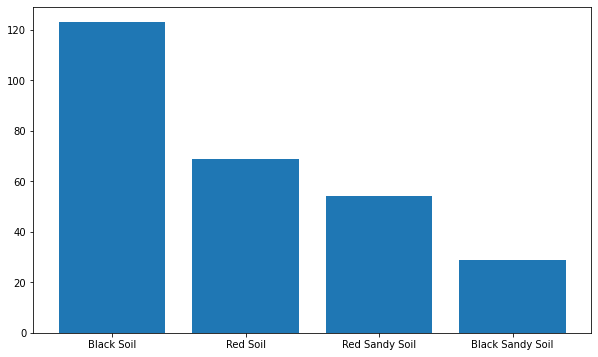

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Sugarcane ', 'Paddy/ Sugarcane', 'Paddy', 'Sugarcane',
       'suger cane ', 'paddy', 'SUGER CANE ', 'Ragi/Niger',
       'Maize/Paddy/Rajma', 'Maize/Rajma', 'Rajma/Maize',
       'Paddy/Maize/G.N', 'Maize', 'Groundnut', 'Turmeric', 'Ragi',
       'Paddy/Maize'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/ Sugarcane     81
Paddy/Maize/G.N      33
Sugarcane            24
Maize/Paddy/Rajma    20
Paddy                20
suger cane           18
Paddy/Maize          16
Ragi/Niger           15
Rajma/Maize          14
Maize/Rajma          10
SUGER CANE            8
paddy                 7
Sugarcane             5
Ragi                  1
Turmeric              1
Groundnut             1
Maize                 1
Name: Crop, dtype: int64

Paddy + SugarCane    163
Paddy + Maize         70
Maize + Rajma         24
Ragi                  16
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

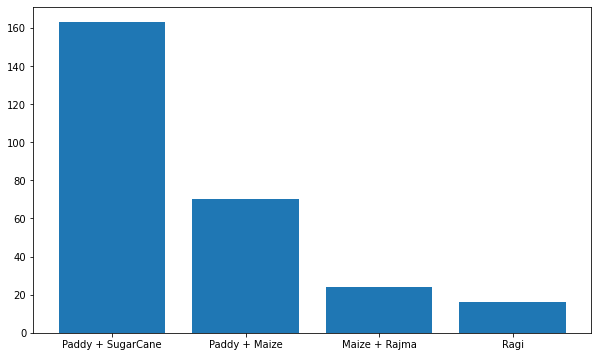

In [15]:
df['Crop'] = df['Crop'].replace(['Sugarcane ', 'Sugarcane', 'suger cane ', 'SUGER CANE '], 'SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy/ Sugarcane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy', 'paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Maize/Rajma', 'Rajma/Maize'], 'Maize + Rajma')
df['Crop'] = df['Crop'].replace(['Maize/Paddy/Rajma', 'Paddy/Maize/G.N', 'Maize', 'Paddy/Maize'], 'Paddy + Maize')
df['Crop'] = df['Crop'].replace(['Paddy + SugarCane', 'Paddy', 'SugarCane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace('Ragi/Niger', 'Ragi')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Turmeric')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.480688,-0.333383,0.212552,0.120609,0.635819,0.665875,0.375249,-0.112625,0.564074,-0.461003,-0.302912,-0.632308,-0.384088
EC,0.480688,1.000000,-0.113811,0.189278,0.579347,0.304698,0.353923,0.905148,0.032202,0.542661,-0.160148,-0.055957,-0.275806,-0.200957
OC,-0.333383,-0.113811,1.000000,-0.003450,0.216241,0.027773,-0.158163,-0.107069,0.541595,-0.030128,0.351817,0.446556,0.573010,0.357031
P,0.212552,0.189278,-0.003450,1.000000,0.172696,0.205397,0.283987,0.143692,0.492402,0.210786,0.100140,0.104467,-0.227438,-0.033806
K,0.120609,0.579347,0.216241,0.172696,1.000000,0.062876,0.058264,0.468951,0.245236,0.173017,-0.063486,0.017689,0.071308,-0.033832
Ca,0.635819,0.304698,0.027773,0.205397,0.062876,1.000000,0.806148,0.252167,0.005950,0.509460,-0.149374,0.107125,-0.313804,-0.175495
Mg,0.665875,0.353923,-0.158163,0.283987,0.058264,0.806148,1.000000,0.270701,-0.056657,0.590767,-0.130534,0.116103,-0.424087,-0.228474
S,0.375249,0.905148,-0.107069,0.143692,0.468951,0.252167,0.270701,1.000000,-0.007399,0.531710,-0.096959,0.005405,-0.218240,-0.155935
Zn,-0.112625,0.032202,0.541595,0.492402,0.245236,0.005950,-0.056657,-0.007399,1.000000,-0.009086,0.416219,0.408112,0.287436,0.193997
B,0.564074,0.542661,-0.030128,0.210786,0.173017,0.509460,0.590767,0.531710,-0.009086,1.000000,-0.149671,0.054915,-0.319448,-0.242287


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe       EVI  Black Sandy Soil  Black Soil  \
3469  8.32  0.39  0.71  8.15  3.44  0.389956                 0           1   

      Red Sandy Soil  Red Soil  
3469               0         0  
3469    Paddy + SugarCane
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:6] = sc1.fit_transform(X[:, 0:6])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8260869565217391


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 80.45 %
Standard Deviation: 8.44 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.855072463768116


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.43 %
Standard Deviation: 8.01 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9130434782608695


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 89.76 %
Standard Deviation: 5.05 %


In [36]:
pickle.dump(clf3, open('Visakhapatnam_model.pkl', 'wb'))
pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8985507246376812


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.36 %
Standard Deviation: 6.07 %


In [42]:
# pickle.dump(clf4, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9068627450980392
Testing Accuracy:  0.8840579710144928


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.31 %
Standard Deviation: 7.50 %


# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.6499020	total: 140ms	remaining: 13.9s
1:	learn: 0.5550468	total: 141ms	remaining: 6.89s
2:	learn: 0.5201035	total: 141ms	remaining: 4.56s
3:	learn: 0.4324255	total: 142ms	remaining: 3.4s
4:	learn: 0.3870467	total: 142ms	remaining: 2.7s
5:	learn: 0.3243466	total: 143ms	remaining: 2.23s
6:	learn: 0.3001907	total: 143ms	remaining: 1.9s
7:	learn: 0.2942067	total: 144ms	remaining: 1.65s
8:	learn: 0.2774138	total: 144ms	remaining: 1.46s
9:	learn: 0.2623461	total: 145ms	remaining: 1.3s
10:	learn: 0.2537522	total: 145ms	remaining: 1.17s
11:	learn: 0.2430318	total: 146ms	remaining: 1.07s
12:	learn: 0.2346983	total: 146ms	remaining: 978ms
13:	learn: 0.2273043	total: 147ms	remaining: 900ms
14:	learn: 0.2168594	total: 147ms	remaining: 833ms
15:	learn: 0.2128809	total: 148ms	remaining: 775ms
16:	learn: 0.2025397	total: 148ms	remaining: 723ms
17:	learn: 0.1989556	total: 148ms	remaining: 676ms
18:	learn: 0.1926737	total: 149ms	remaining: 635ms
19:	learn: 0.1906716	total: 150ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5169070824
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5570184762
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5282464939
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4691806682
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5434433563
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3404165	test: 1.3530726	best: 1.3530726 (0)	total: 1.11ms	remaining: 1.11s
1:	learn: 1.2972029	test: 1.3213449	best: 1.3213449 (1)	total: 2.13ms	remaining: 1.06s
2:	learn: 1.2551462	test: 1.2923148	best: 1.2923148 (2)	total: 2.98ms	remaining: 989ms
3:	learn: 1.2201801	test: 1.2641041	best: 1.2641041 (3)	total: 3.85ms	remaining: 958ms
4:	learn: 1.1882110	test: 1.2422565	best: 1.2422565 (4)	total: 4.73ms	remaining: 941ms
5:	learn: 1.1505263	test: 1.2185965	best: 1.2185965 (5)	total: 5.57ms	remaining: 922ms
6:	learn: 1.1178223	test: 1.1942571	best: 1.1942571 (6)	total: 6.4ms	remaining: 908ms
7:	learn: 1.0859156	test: 1.1719853	best: 1.1719853 (7)	total: 7.39ms	remaining: 916ms
8:	learn: 1.0590168	test: 1.1493999	best: 1.1493999 (8)	total: 8.51ms	remaining: 937ms
9:	learn: 1.0311121	test: 1.1303994	best: 1.1303994 (9)	total: 9.39ms	remaining: 930ms
10:	learn: 1.0083761	test: 1.1166069	best: 1.1166069 (10)	total: 10.3ms	remaining: 922ms
11:	learn: 0.9856035	test: 1.1002502	best:

159:	learn: 0.2199948	test: 0.7926919	best: 0.7872654 (149)	total: 162ms	remaining: 849ms
160:	learn: 0.2182904	test: 0.7927288	best: 0.7872654 (149)	total: 163ms	remaining: 848ms
161:	learn: 0.2168659	test: 0.7930398	best: 0.7872654 (149)	total: 164ms	remaining: 848ms
162:	learn: 0.2152107	test: 0.7932184	best: 0.7872654 (149)	total: 165ms	remaining: 847ms
163:	learn: 0.2142460	test: 0.7934414	best: 0.7872654 (149)	total: 166ms	remaining: 846ms
164:	learn: 0.2130973	test: 0.7939693	best: 0.7872654 (149)	total: 167ms	remaining: 845ms
165:	learn: 0.2116183	test: 0.7955738	best: 0.7872654 (149)	total: 168ms	remaining: 844ms
166:	learn: 0.2106325	test: 0.7964510	best: 0.7872654 (149)	total: 169ms	remaining: 842ms
167:	learn: 0.2097984	test: 0.7967755	best: 0.7872654 (149)	total: 170ms	remaining: 841ms
168:	learn: 0.2085670	test: 0.7981419	best: 0.7872654 (149)	total: 171ms	remaining: 840ms
169:	learn: 0.2076189	test: 0.7991408	best: 0.7872654 (149)	total: 172ms	remaining: 839ms
170:	learn

329:	learn: 0.1068554	test: 0.8569420	best: 0.7872654 (149)	total: 331ms	remaining: 672ms
330:	learn: 0.1065669	test: 0.8575100	best: 0.7872654 (149)	total: 332ms	remaining: 671ms
331:	learn: 0.1060233	test: 0.8580579	best: 0.7872654 (149)	total: 333ms	remaining: 670ms
332:	learn: 0.1055495	test: 0.8585468	best: 0.7872654 (149)	total: 334ms	remaining: 669ms
333:	learn: 0.1050553	test: 0.8593857	best: 0.7872654 (149)	total: 335ms	remaining: 668ms
334:	learn: 0.1045348	test: 0.8593836	best: 0.7872654 (149)	total: 336ms	remaining: 667ms
335:	learn: 0.1044295	test: 0.8595041	best: 0.7872654 (149)	total: 337ms	remaining: 666ms
336:	learn: 0.1041643	test: 0.8597506	best: 0.7872654 (149)	total: 338ms	remaining: 665ms
337:	learn: 0.1039571	test: 0.8602088	best: 0.7872654 (149)	total: 339ms	remaining: 664ms
338:	learn: 0.1035123	test: 0.8608621	best: 0.7872654 (149)	total: 340ms	remaining: 663ms
339:	learn: 0.1032204	test: 0.8614428	best: 0.7872654 (149)	total: 341ms	remaining: 662ms
340:	learn

488:	learn: 0.0684269	test: 0.9011479	best: 0.7872654 (149)	total: 501ms	remaining: 523ms
489:	learn: 0.0682437	test: 0.9015753	best: 0.7872654 (149)	total: 502ms	remaining: 523ms
490:	learn: 0.0681100	test: 0.9015736	best: 0.7872654 (149)	total: 503ms	remaining: 522ms
491:	learn: 0.0679488	test: 0.9018866	best: 0.7872654 (149)	total: 504ms	remaining: 521ms
492:	learn: 0.0677940	test: 0.9025054	best: 0.7872654 (149)	total: 506ms	remaining: 520ms
493:	learn: 0.0676375	test: 0.9024987	best: 0.7872654 (149)	total: 507ms	remaining: 519ms
494:	learn: 0.0674894	test: 0.9027286	best: 0.7872654 (149)	total: 508ms	remaining: 518ms
495:	learn: 0.0673203	test: 0.9030084	best: 0.7872654 (149)	total: 509ms	remaining: 517ms
496:	learn: 0.0672223	test: 0.9028413	best: 0.7872654 (149)	total: 510ms	remaining: 516ms
497:	learn: 0.0671851	test: 0.9029327	best: 0.7872654 (149)	total: 511ms	remaining: 515ms
498:	learn: 0.0670255	test: 0.9032527	best: 0.7872654 (149)	total: 512ms	remaining: 514ms
499:	learn

638:	learn: 0.0504279	test: 0.9273144	best: 0.7872654 (149)	total: 673ms	remaining: 380ms
639:	learn: 0.0503766	test: 0.9276435	best: 0.7872654 (149)	total: 674ms	remaining: 379ms
640:	learn: 0.0503079	test: 0.9278849	best: 0.7872654 (149)	total: 675ms	remaining: 378ms
641:	learn: 0.0502071	test: 0.9283779	best: 0.7872654 (149)	total: 677ms	remaining: 377ms
642:	learn: 0.0500955	test: 0.9294287	best: 0.7872654 (149)	total: 678ms	remaining: 376ms
643:	learn: 0.0500238	test: 0.9292435	best: 0.7872654 (149)	total: 679ms	remaining: 375ms
644:	learn: 0.0499306	test: 0.9293886	best: 0.7872654 (149)	total: 680ms	remaining: 374ms
645:	learn: 0.0498224	test: 0.9300494	best: 0.7872654 (149)	total: 682ms	remaining: 373ms
646:	learn: 0.0497424	test: 0.9302256	best: 0.7872654 (149)	total: 683ms	remaining: 373ms
647:	learn: 0.0496466	test: 0.9308284	best: 0.7872654 (149)	total: 684ms	remaining: 371ms
648:	learn: 0.0495720	test: 0.9308431	best: 0.7872654 (149)	total: 685ms	remaining: 370ms
649:	learn

783:	learn: 0.0393376	test: 0.9613230	best: 0.7872654 (149)	total: 843ms	remaining: 232ms
784:	learn: 0.0393110	test: 0.9614479	best: 0.7872654 (149)	total: 845ms	remaining: 231ms
785:	learn: 0.0392879	test: 0.9614332	best: 0.7872654 (149)	total: 846ms	remaining: 230ms
786:	learn: 0.0392347	test: 0.9617269	best: 0.7872654 (149)	total: 847ms	remaining: 229ms
787:	learn: 0.0391379	test: 0.9619211	best: 0.7872654 (149)	total: 848ms	remaining: 228ms
788:	learn: 0.0390959	test: 0.9619572	best: 0.7872654 (149)	total: 849ms	remaining: 227ms
789:	learn: 0.0389846	test: 0.9620178	best: 0.7872654 (149)	total: 851ms	remaining: 226ms
790:	learn: 0.0389148	test: 0.9620899	best: 0.7872654 (149)	total: 852ms	remaining: 225ms
791:	learn: 0.0388433	test: 0.9622634	best: 0.7872654 (149)	total: 853ms	remaining: 224ms
792:	learn: 0.0388263	test: 0.9625180	best: 0.7872654 (149)	total: 854ms	remaining: 223ms
793:	learn: 0.0387487	test: 0.9633290	best: 0.7872654 (149)	total: 855ms	remaining: 222ms
794:	learn

931:	learn: 0.0320736	test: 0.9905332	best: 0.7872654 (149)	total: 1.01s	remaining: 74ms
932:	learn: 0.0320242	test: 0.9908965	best: 0.7872654 (149)	total: 1.01s	remaining: 73ms
933:	learn: 0.0319909	test: 0.9908737	best: 0.7872654 (149)	total: 1.02s	remaining: 71.9ms
934:	learn: 0.0319518	test: 0.9908754	best: 0.7872654 (149)	total: 1.02s	remaining: 70.8ms
935:	learn: 0.0319122	test: 0.9909854	best: 0.7872654 (149)	total: 1.02s	remaining: 69.7ms
936:	learn: 0.0318628	test: 0.9907537	best: 0.7872654 (149)	total: 1.02s	remaining: 68.6ms
937:	learn: 0.0318392	test: 0.9909194	best: 0.7872654 (149)	total: 1.02s	remaining: 67.5ms
938:	learn: 0.0318127	test: 0.9912036	best: 0.7872654 (149)	total: 1.02s	remaining: 66.4ms
939:	learn: 0.0317697	test: 0.9913508	best: 0.7872654 (149)	total: 1.02s	remaining: 65.3ms
940:	learn: 0.0317375	test: 0.9914028	best: 0.7872654 (149)	total: 1.02s	remaining: 64.2ms
941:	learn: 0.0317177	test: 0.9915568	best: 0.7872654 (149)	total: 1.02s	remaining: 63.1ms
942

91:	learn: 0.1180512	test: 0.8687138	best: 0.7906710 (34)	total: 99.8ms	remaining: 985ms
92:	learn: 0.1172371	test: 0.8684100	best: 0.7906710 (34)	total: 101ms	remaining: 984ms
93:	learn: 0.1159564	test: 0.8663547	best: 0.7906710 (34)	total: 102ms	remaining: 984ms
94:	learn: 0.1141211	test: 0.8690755	best: 0.7906710 (34)	total: 103ms	remaining: 985ms
95:	learn: 0.1122822	test: 0.8685576	best: 0.7906710 (34)	total: 104ms	remaining: 984ms
96:	learn: 0.1107660	test: 0.8679122	best: 0.7906710 (34)	total: 106ms	remaining: 982ms
97:	learn: 0.1097411	test: 0.8671307	best: 0.7906710 (34)	total: 107ms	remaining: 981ms
98:	learn: 0.1088207	test: 0.8673652	best: 0.7906710 (34)	total: 108ms	remaining: 980ms
99:	learn: 0.1076261	test: 0.8681286	best: 0.7906710 (34)	total: 109ms	remaining: 978ms
100:	learn: 0.1070795	test: 0.8682262	best: 0.7906710 (34)	total: 110ms	remaining: 976ms
101:	learn: 0.1062138	test: 0.8690576	best: 0.7906710 (34)	total: 111ms	remaining: 975ms
102:	learn: 0.1051499	test: 0

257:	learn: 0.0363057	test: 0.9788657	best: 0.7906710 (34)	total: 271ms	remaining: 780ms
258:	learn: 0.0361698	test: 0.9796732	best: 0.7906710 (34)	total: 272ms	remaining: 779ms
259:	learn: 0.0360761	test: 0.9798341	best: 0.7906710 (34)	total: 273ms	remaining: 778ms
260:	learn: 0.0359683	test: 0.9799930	best: 0.7906710 (34)	total: 274ms	remaining: 777ms
261:	learn: 0.0357881	test: 0.9808095	best: 0.7906710 (34)	total: 275ms	remaining: 775ms
262:	learn: 0.0356510	test: 0.9811375	best: 0.7906710 (34)	total: 276ms	remaining: 774ms
263:	learn: 0.0353707	test: 0.9822753	best: 0.7906710 (34)	total: 277ms	remaining: 773ms
264:	learn: 0.0351353	test: 0.9826953	best: 0.7906710 (34)	total: 278ms	remaining: 771ms
265:	learn: 0.0350172	test: 0.9818326	best: 0.7906710 (34)	total: 279ms	remaining: 770ms
266:	learn: 0.0348193	test: 0.9816045	best: 0.7906710 (34)	total: 280ms	remaining: 769ms
267:	learn: 0.0346886	test: 0.9811849	best: 0.7906710 (34)	total: 281ms	remaining: 767ms
268:	learn: 0.0345034

429:	learn: 0.0195245	test: 1.0733680	best: 0.7906710 (34)	total: 442ms	remaining: 586ms
430:	learn: 0.0194970	test: 1.0731898	best: 0.7906710 (34)	total: 443ms	remaining: 585ms
431:	learn: 0.0194491	test: 1.0733471	best: 0.7906710 (34)	total: 444ms	remaining: 584ms
432:	learn: 0.0194229	test: 1.0733685	best: 0.7906710 (34)	total: 445ms	remaining: 583ms
433:	learn: 0.0193461	test: 1.0742782	best: 0.7906710 (34)	total: 446ms	remaining: 582ms
434:	learn: 0.0192922	test: 1.0748785	best: 0.7906710 (34)	total: 447ms	remaining: 581ms
435:	learn: 0.0192424	test: 1.0754469	best: 0.7906710 (34)	total: 448ms	remaining: 580ms
436:	learn: 0.0192075	test: 1.0760787	best: 0.7906710 (34)	total: 449ms	remaining: 579ms
437:	learn: 0.0191496	test: 1.0763510	best: 0.7906710 (34)	total: 450ms	remaining: 577ms
438:	learn: 0.0191282	test: 1.0763523	best: 0.7906710 (34)	total: 451ms	remaining: 576ms
439:	learn: 0.0190719	test: 1.0770265	best: 0.7906710 (34)	total: 452ms	remaining: 575ms
440:	learn: 0.0190488

621:	learn: 0.0127929	test: 1.1335369	best: 0.7906710 (34)	total: 623ms	remaining: 379ms
622:	learn: 0.0127784	test: 1.1339849	best: 0.7906710 (34)	total: 624ms	remaining: 378ms
623:	learn: 0.0127618	test: 1.1338739	best: 0.7906710 (34)	total: 625ms	remaining: 377ms
624:	learn: 0.0127256	test: 1.1344375	best: 0.7906710 (34)	total: 626ms	remaining: 376ms
625:	learn: 0.0127049	test: 1.1342988	best: 0.7906710 (34)	total: 627ms	remaining: 375ms
626:	learn: 0.0126741	test: 1.1351450	best: 0.7906710 (34)	total: 628ms	remaining: 374ms
627:	learn: 0.0126455	test: 1.1354378	best: 0.7906710 (34)	total: 629ms	remaining: 373ms
628:	learn: 0.0126151	test: 1.1357057	best: 0.7906710 (34)	total: 630ms	remaining: 372ms
629:	learn: 0.0126019	test: 1.1359354	best: 0.7906710 (34)	total: 631ms	remaining: 371ms
630:	learn: 0.0125842	test: 1.1367817	best: 0.7906710 (34)	total: 632ms	remaining: 370ms
631:	learn: 0.0125734	test: 1.1369575	best: 0.7906710 (34)	total: 633ms	remaining: 369ms
632:	learn: 0.0125532

771:	learn: 0.0098788	test: 1.1712477	best: 0.7906710 (34)	total: 785ms	remaining: 232ms
772:	learn: 0.0098748	test: 1.1714932	best: 0.7906710 (34)	total: 786ms	remaining: 231ms
773:	learn: 0.0098711	test: 1.1716226	best: 0.7906710 (34)	total: 787ms	remaining: 230ms
774:	learn: 0.0098539	test: 1.1720289	best: 0.7906710 (34)	total: 788ms	remaining: 229ms
775:	learn: 0.0098272	test: 1.1726895	best: 0.7906710 (34)	total: 789ms	remaining: 228ms
776:	learn: 0.0098180	test: 1.1726444	best: 0.7906710 (34)	total: 790ms	remaining: 227ms
777:	learn: 0.0097995	test: 1.1737633	best: 0.7906710 (34)	total: 791ms	remaining: 226ms
778:	learn: 0.0097881	test: 1.1738585	best: 0.7906710 (34)	total: 792ms	remaining: 225ms
779:	learn: 0.0097768	test: 1.1741686	best: 0.7906710 (34)	total: 793ms	remaining: 224ms
780:	learn: 0.0097630	test: 1.1743417	best: 0.7906710 (34)	total: 794ms	remaining: 223ms
781:	learn: 0.0097457	test: 1.1744100	best: 0.7906710 (34)	total: 795ms	remaining: 222ms
782:	learn: 0.0097343

960:	learn: 0.0076233	test: 1.2104311	best: 0.7906710 (34)	total: 965ms	remaining: 39.1ms
961:	learn: 0.0076076	test: 1.2114415	best: 0.7906710 (34)	total: 966ms	remaining: 38.2ms
962:	learn: 0.0076048	test: 1.2114944	best: 0.7906710 (34)	total: 967ms	remaining: 37.1ms
963:	learn: 0.0075895	test: 1.2116021	best: 0.7906710 (34)	total: 968ms	remaining: 36.1ms
964:	learn: 0.0075684	test: 1.2117684	best: 0.7906710 (34)	total: 969ms	remaining: 35.2ms
965:	learn: 0.0075574	test: 1.2117074	best: 0.7906710 (34)	total: 971ms	remaining: 34.2ms
966:	learn: 0.0075456	test: 1.2121341	best: 0.7906710 (34)	total: 972ms	remaining: 33.2ms
967:	learn: 0.0075331	test: 1.2124786	best: 0.7906710 (34)	total: 973ms	remaining: 32.2ms
968:	learn: 0.0075187	test: 1.2124154	best: 0.7906710 (34)	total: 974ms	remaining: 31.1ms
969:	learn: 0.0075121	test: 1.2124742	best: 0.7906710 (34)	total: 975ms	remaining: 30.1ms
970:	learn: 0.0074950	test: 1.2129239	best: 0.7906710 (34)	total: 976ms	remaining: 29.1ms
971:	learn

57:	learn: 0.4889086	test: 0.8139647	best: 0.8139647 (57)	total: 130ms	remaining: 2.11s
58:	learn: 0.4825605	test: 0.8117934	best: 0.8117934 (58)	total: 133ms	remaining: 2.13s
59:	learn: 0.4758418	test: 0.8094072	best: 0.8094072 (59)	total: 136ms	remaining: 2.13s
60:	learn: 0.4699131	test: 0.8063154	best: 0.8063154 (60)	total: 138ms	remaining: 2.12s
61:	learn: 0.4650206	test: 0.8057765	best: 0.8057765 (61)	total: 140ms	remaining: 2.12s
62:	learn: 0.4587144	test: 0.8040072	best: 0.8040072 (62)	total: 142ms	remaining: 2.12s
63:	learn: 0.4548299	test: 0.8009977	best: 0.8009977 (63)	total: 145ms	remaining: 2.12s
64:	learn: 0.4498709	test: 0.7982324	best: 0.7982324 (64)	total: 148ms	remaining: 2.13s
65:	learn: 0.4452237	test: 0.7963998	best: 0.7963998 (65)	total: 151ms	remaining: 2.13s
66:	learn: 0.4398050	test: 0.7954966	best: 0.7954966 (66)	total: 153ms	remaining: 2.13s
67:	learn: 0.4343661	test: 0.7949160	best: 0.7949160 (67)	total: 155ms	remaining: 2.13s
68:	learn: 0.4300425	test: 0.792

210:	learn: 0.1476664	test: 0.7819140	best: 0.7549191 (109)	total: 491ms	remaining: 1.83s
211:	learn: 0.1467950	test: 0.7824930	best: 0.7549191 (109)	total: 493ms	remaining: 1.83s
212:	learn: 0.1458925	test: 0.7826775	best: 0.7549191 (109)	total: 496ms	remaining: 1.83s
213:	learn: 0.1450669	test: 0.7826794	best: 0.7549191 (109)	total: 498ms	remaining: 1.83s
214:	learn: 0.1442943	test: 0.7840117	best: 0.7549191 (109)	total: 500ms	remaining: 1.83s
215:	learn: 0.1435002	test: 0.7845493	best: 0.7549191 (109)	total: 503ms	remaining: 1.82s
216:	learn: 0.1428162	test: 0.7849811	best: 0.7549191 (109)	total: 505ms	remaining: 1.82s
217:	learn: 0.1420450	test: 0.7851448	best: 0.7549191 (109)	total: 508ms	remaining: 1.82s
218:	learn: 0.1412535	test: 0.7853234	best: 0.7549191 (109)	total: 511ms	remaining: 1.82s
219:	learn: 0.1405543	test: 0.7859034	best: 0.7549191 (109)	total: 514ms	remaining: 1.82s
220:	learn: 0.1397898	test: 0.7860292	best: 0.7549191 (109)	total: 517ms	remaining: 1.82s
221:	learn

360:	learn: 0.0749011	test: 0.8581599	best: 0.7549191 (109)	total: 842ms	remaining: 1.49s
361:	learn: 0.0746895	test: 0.8586489	best: 0.7549191 (109)	total: 845ms	remaining: 1.49s
362:	learn: 0.0744168	test: 0.8589720	best: 0.7549191 (109)	total: 848ms	remaining: 1.49s
363:	learn: 0.0742663	test: 0.8596620	best: 0.7549191 (109)	total: 850ms	remaining: 1.49s
364:	learn: 0.0739535	test: 0.8602185	best: 0.7549191 (109)	total: 853ms	remaining: 1.48s
365:	learn: 0.0736697	test: 0.8607475	best: 0.7549191 (109)	total: 855ms	remaining: 1.48s
366:	learn: 0.0734419	test: 0.8611867	best: 0.7549191 (109)	total: 858ms	remaining: 1.48s
367:	learn: 0.0732409	test: 0.8615419	best: 0.7549191 (109)	total: 860ms	remaining: 1.48s
368:	learn: 0.0730561	test: 0.8622422	best: 0.7549191 (109)	total: 864ms	remaining: 1.48s
369:	learn: 0.0728022	test: 0.8630550	best: 0.7549191 (109)	total: 866ms	remaining: 1.47s
370:	learn: 0.0726700	test: 0.8631648	best: 0.7549191 (109)	total: 868ms	remaining: 1.47s
371:	learn

510:	learn: 0.0490633	test: 0.9164477	best: 0.7549191 (109)	total: 1.21s	remaining: 1.16s
511:	learn: 0.0489596	test: 0.9167764	best: 0.7549191 (109)	total: 1.21s	remaining: 1.16s
512:	learn: 0.0488850	test: 0.9170907	best: 0.7549191 (109)	total: 1.22s	remaining: 1.15s
513:	learn: 0.0487611	test: 0.9172637	best: 0.7549191 (109)	total: 1.22s	remaining: 1.15s
514:	learn: 0.0486332	test: 0.9175179	best: 0.7549191 (109)	total: 1.22s	remaining: 1.15s
515:	learn: 0.0484822	test: 0.9176234	best: 0.7549191 (109)	total: 1.22s	remaining: 1.15s
516:	learn: 0.0483079	test: 0.9180494	best: 0.7549191 (109)	total: 1.23s	remaining: 1.15s
517:	learn: 0.0481913	test: 0.9184850	best: 0.7549191 (109)	total: 1.23s	remaining: 1.14s
518:	learn: 0.0480495	test: 0.9188235	best: 0.7549191 (109)	total: 1.23s	remaining: 1.14s
519:	learn: 0.0479241	test: 0.9193856	best: 0.7549191 (109)	total: 1.23s	remaining: 1.14s
520:	learn: 0.0478331	test: 0.9197459	best: 0.7549191 (109)	total: 1.24s	remaining: 1.14s
521:	learn

661:	learn: 0.0353833	test: 0.9576007	best: 0.7549191 (109)	total: 1.56s	remaining: 796ms
662:	learn: 0.0353233	test: 0.9577660	best: 0.7549191 (109)	total: 1.56s	remaining: 794ms
663:	learn: 0.0352507	test: 0.9580127	best: 0.7549191 (109)	total: 1.56s	remaining: 792ms
664:	learn: 0.0351912	test: 0.9580516	best: 0.7549191 (109)	total: 1.57s	remaining: 789ms
665:	learn: 0.0351406	test: 0.9580213	best: 0.7549191 (109)	total: 1.57s	remaining: 787ms
666:	learn: 0.0351084	test: 0.9582123	best: 0.7549191 (109)	total: 1.57s	remaining: 785ms
667:	learn: 0.0350481	test: 0.9580835	best: 0.7549191 (109)	total: 1.57s	remaining: 782ms
668:	learn: 0.0350054	test: 0.9583865	best: 0.7549191 (109)	total: 1.58s	remaining: 780ms
669:	learn: 0.0349326	test: 0.9587260	best: 0.7549191 (109)	total: 1.58s	remaining: 778ms
670:	learn: 0.0348647	test: 0.9590424	best: 0.7549191 (109)	total: 1.58s	remaining: 776ms
671:	learn: 0.0348098	test: 0.9597495	best: 0.7549191 (109)	total: 1.58s	remaining: 773ms
672:	learn

818:	learn: 0.0270284	test: 0.9930152	best: 0.7549191 (109)	total: 1.93s	remaining: 426ms
819:	learn: 0.0269850	test: 0.9935005	best: 0.7549191 (109)	total: 1.93s	remaining: 424ms
820:	learn: 0.0269537	test: 0.9937645	best: 0.7549191 (109)	total: 1.93s	remaining: 421ms
821:	learn: 0.0269209	test: 0.9938024	best: 0.7549191 (109)	total: 1.93s	remaining: 419ms
822:	learn: 0.0268867	test: 0.9938903	best: 0.7549191 (109)	total: 1.94s	remaining: 417ms
823:	learn: 0.0268565	test: 0.9942298	best: 0.7549191 (109)	total: 1.94s	remaining: 414ms
824:	learn: 0.0268334	test: 0.9943298	best: 0.7549191 (109)	total: 1.94s	remaining: 412ms
825:	learn: 0.0267829	test: 0.9945273	best: 0.7549191 (109)	total: 1.95s	remaining: 410ms
826:	learn: 0.0267424	test: 0.9947761	best: 0.7549191 (109)	total: 1.95s	remaining: 408ms
827:	learn: 0.0267022	test: 0.9951456	best: 0.7549191 (109)	total: 1.95s	remaining: 405ms
828:	learn: 0.0266690	test: 0.9953497	best: 0.7549191 (109)	total: 1.95s	remaining: 403ms
829:	learn

968:	learn: 0.0218832	test: 1.0210119	best: 0.7549191 (109)	total: 2.27s	remaining: 72.8ms
969:	learn: 0.0218564	test: 1.0210900	best: 0.7549191 (109)	total: 2.28s	remaining: 70.4ms
970:	learn: 0.0218249	test: 1.0212742	best: 0.7549191 (109)	total: 2.28s	remaining: 68.1ms
971:	learn: 0.0218007	test: 1.0213033	best: 0.7549191 (109)	total: 2.28s	remaining: 65.7ms
972:	learn: 0.0217738	test: 1.0218443	best: 0.7549191 (109)	total: 2.28s	remaining: 63.4ms
973:	learn: 0.0217513	test: 1.0222940	best: 0.7549191 (109)	total: 2.29s	remaining: 61ms
974:	learn: 0.0217229	test: 1.0223377	best: 0.7549191 (109)	total: 2.29s	remaining: 58.7ms
975:	learn: 0.0216948	test: 1.0226238	best: 0.7549191 (109)	total: 2.29s	remaining: 56.4ms
976:	learn: 0.0216550	test: 1.0230877	best: 0.7549191 (109)	total: 2.29s	remaining: 54ms
977:	learn: 0.0216178	test: 1.0233669	best: 0.7549191 (109)	total: 2.3s	remaining: 51.7ms
978:	learn: 0.0216011	test: 1.0233112	best: 0.7549191 (109)	total: 2.3s	remaining: 49.3ms
979:	

123:	learn: 0.0646365	test: 0.8934012	best: 0.7569918 (35)	total: 288ms	remaining: 2.03s
124:	learn: 0.0639321	test: 0.8962102	best: 0.7569918 (35)	total: 291ms	remaining: 2.04s
125:	learn: 0.0631927	test: 0.8968261	best: 0.7569918 (35)	total: 293ms	remaining: 2.03s
126:	learn: 0.0624437	test: 0.8982628	best: 0.7569918 (35)	total: 296ms	remaining: 2.03s
127:	learn: 0.0615369	test: 0.9011388	best: 0.7569918 (35)	total: 298ms	remaining: 2.03s
128:	learn: 0.0609022	test: 0.9016343	best: 0.7569918 (35)	total: 300ms	remaining: 2.03s
129:	learn: 0.0604204	test: 0.9013016	best: 0.7569918 (35)	total: 303ms	remaining: 2.03s
130:	learn: 0.0596497	test: 0.9033168	best: 0.7569918 (35)	total: 305ms	remaining: 2.02s
131:	learn: 0.0590374	test: 0.9039499	best: 0.7569918 (35)	total: 308ms	remaining: 2.03s
132:	learn: 0.0584234	test: 0.9042625	best: 0.7569918 (35)	total: 311ms	remaining: 2.03s
133:	learn: 0.0579516	test: 0.9051726	best: 0.7569918 (35)	total: 314ms	remaining: 2.03s
134:	learn: 0.0574365

272:	learn: 0.0235264	test: 1.0280643	best: 0.7569918 (35)	total: 638ms	remaining: 1.7s
273:	learn: 0.0234021	test: 1.0282500	best: 0.7569918 (35)	total: 641ms	remaining: 1.7s
274:	learn: 0.0232965	test: 1.0286196	best: 0.7569918 (35)	total: 644ms	remaining: 1.7s
275:	learn: 0.0231453	test: 1.0304748	best: 0.7569918 (35)	total: 646ms	remaining: 1.69s
276:	learn: 0.0230689	test: 1.0306030	best: 0.7569918 (35)	total: 648ms	remaining: 1.69s
277:	learn: 0.0229744	test: 1.0308966	best: 0.7569918 (35)	total: 651ms	remaining: 1.69s
278:	learn: 0.0229018	test: 1.0306484	best: 0.7569918 (35)	total: 653ms	remaining: 1.69s
279:	learn: 0.0228043	test: 1.0312109	best: 0.7569918 (35)	total: 656ms	remaining: 1.69s
280:	learn: 0.0227437	test: 1.0315880	best: 0.7569918 (35)	total: 659ms	remaining: 1.69s
281:	learn: 0.0226279	test: 1.0326518	best: 0.7569918 (35)	total: 661ms	remaining: 1.68s
282:	learn: 0.0225127	test: 1.0340401	best: 0.7569918 (35)	total: 664ms	remaining: 1.68s
283:	learn: 0.0223935	te

427:	learn: 0.0137028	test: 1.1043078	best: 0.7569918 (35)	total: 1s	remaining: 1.34s
428:	learn: 0.0136671	test: 1.1047980	best: 0.7569918 (35)	total: 1.01s	remaining: 1.34s
429:	learn: 0.0136187	test: 1.1052336	best: 0.7569918 (35)	total: 1.01s	remaining: 1.34s
430:	learn: 0.0135827	test: 1.1054557	best: 0.7569918 (35)	total: 1.01s	remaining: 1.33s
431:	learn: 0.0135409	test: 1.1056912	best: 0.7569918 (35)	total: 1.01s	remaining: 1.33s
432:	learn: 0.0135079	test: 1.1060086	best: 0.7569918 (35)	total: 1.01s	remaining: 1.33s
433:	learn: 0.0134619	test: 1.1065718	best: 0.7569918 (35)	total: 1.02s	remaining: 1.33s
434:	learn: 0.0134216	test: 1.1072832	best: 0.7569918 (35)	total: 1.02s	remaining: 1.32s
435:	learn: 0.0133873	test: 1.1072668	best: 0.7569918 (35)	total: 1.02s	remaining: 1.32s
436:	learn: 0.0133502	test: 1.1079208	best: 0.7569918 (35)	total: 1.02s	remaining: 1.32s
437:	learn: 0.0133206	test: 1.1078370	best: 0.7569918 (35)	total: 1.03s	remaining: 1.32s
438:	learn: 0.0132927	te

578:	learn: 0.0096652	test: 1.1519368	best: 0.7569918 (35)	total: 1.35s	remaining: 985ms
579:	learn: 0.0096484	test: 1.1521332	best: 0.7569918 (35)	total: 1.36s	remaining: 983ms
580:	learn: 0.0096249	test: 1.1524673	best: 0.7569918 (35)	total: 1.36s	remaining: 981ms
581:	learn: 0.0096057	test: 1.1525119	best: 0.7569918 (35)	total: 1.36s	remaining: 979ms
582:	learn: 0.0095875	test: 1.1526591	best: 0.7569918 (35)	total: 1.37s	remaining: 977ms
583:	learn: 0.0095638	test: 1.1529679	best: 0.7569918 (35)	total: 1.37s	remaining: 975ms
584:	learn: 0.0095490	test: 1.1533778	best: 0.7569918 (35)	total: 1.37s	remaining: 973ms
585:	learn: 0.0095290	test: 1.1535136	best: 0.7569918 (35)	total: 1.37s	remaining: 971ms
586:	learn: 0.0095137	test: 1.1538232	best: 0.7569918 (35)	total: 1.38s	remaining: 969ms
587:	learn: 0.0094922	test: 1.1541970	best: 0.7569918 (35)	total: 1.38s	remaining: 967ms
588:	learn: 0.0094778	test: 1.1545915	best: 0.7569918 (35)	total: 1.38s	remaining: 965ms
589:	learn: 0.0094636

727:	learn: 0.0074810	test: 1.1883315	best: 0.7569918 (35)	total: 1.72s	remaining: 641ms
728:	learn: 0.0074724	test: 1.1883329	best: 0.7569918 (35)	total: 1.72s	remaining: 639ms
729:	learn: 0.0074618	test: 1.1887269	best: 0.7569918 (35)	total: 1.72s	remaining: 637ms
730:	learn: 0.0074460	test: 1.1891097	best: 0.7569918 (35)	total: 1.73s	remaining: 635ms
731:	learn: 0.0074342	test: 1.1892084	best: 0.7569918 (35)	total: 1.73s	remaining: 633ms
732:	learn: 0.0074236	test: 1.1893932	best: 0.7569918 (35)	total: 1.73s	remaining: 631ms
733:	learn: 0.0074107	test: 1.1896351	best: 0.7569918 (35)	total: 1.73s	remaining: 628ms
734:	learn: 0.0073968	test: 1.1902549	best: 0.7569918 (35)	total: 1.74s	remaining: 626ms
735:	learn: 0.0073819	test: 1.1903341	best: 0.7569918 (35)	total: 1.74s	remaining: 624ms
736:	learn: 0.0073625	test: 1.1906152	best: 0.7569918 (35)	total: 1.74s	remaining: 622ms
737:	learn: 0.0073519	test: 1.1908866	best: 0.7569918 (35)	total: 1.75s	remaining: 620ms
738:	learn: 0.0073399

884:	learn: 0.0060030	test: 1.2228958	best: 0.7569918 (35)	total: 2.08s	remaining: 271ms
885:	learn: 0.0059970	test: 1.2230034	best: 0.7569918 (35)	total: 2.09s	remaining: 269ms
886:	learn: 0.0059911	test: 1.2231347	best: 0.7569918 (35)	total: 2.09s	remaining: 266ms
887:	learn: 0.0059825	test: 1.2234301	best: 0.7569918 (35)	total: 2.09s	remaining: 264ms
888:	learn: 0.0059763	test: 1.2236139	best: 0.7569918 (35)	total: 2.09s	remaining: 261ms
889:	learn: 0.0059677	test: 1.2237534	best: 0.7569918 (35)	total: 2.1s	remaining: 259ms
890:	learn: 0.0059601	test: 1.2240990	best: 0.7569918 (35)	total: 2.1s	remaining: 257ms
891:	learn: 0.0059532	test: 1.2242373	best: 0.7569918 (35)	total: 2.1s	remaining: 254ms
892:	learn: 0.0059462	test: 1.2245486	best: 0.7569918 (35)	total: 2.1s	remaining: 252ms
893:	learn: 0.0059398	test: 1.2247128	best: 0.7569918 (35)	total: 2.11s	remaining: 250ms
894:	learn: 0.0059304	test: 1.2249734	best: 0.7569918 (35)	total: 2.11s	remaining: 247ms
895:	learn: 0.0059224	tes

2:	learn: 1.2991745	test: 1.3255867	best: 1.3255867 (2)	total: 130ms	remaining: 43.1s
3:	learn: 1.2733105	test: 1.3062536	best: 1.3062536 (3)	total: 174ms	remaining: 43.3s
4:	learn: 1.2560748	test: 1.2965021	best: 1.2965021 (4)	total: 218ms	remaining: 43.5s
5:	learn: 1.2328540	test: 1.2779815	best: 1.2779815 (5)	total: 264ms	remaining: 43.7s
6:	learn: 1.2095921	test: 1.2594475	best: 1.2594475 (6)	total: 312ms	remaining: 44.2s
7:	learn: 1.1909891	test: 1.2484926	best: 1.2484926 (7)	total: 361ms	remaining: 44.7s
8:	learn: 1.1738927	test: 1.2381413	best: 1.2381413 (8)	total: 409ms	remaining: 45s
9:	learn: 1.1450294	test: 1.2170575	best: 1.2170575 (9)	total: 432ms	remaining: 42.7s
10:	learn: 1.1282297	test: 1.2045447	best: 1.2045447 (10)	total: 477ms	remaining: 42.8s
11:	learn: 1.1112326	test: 1.1945202	best: 1.1945202 (11)	total: 522ms	remaining: 42.9s
12:	learn: 1.0924218	test: 1.1836996	best: 1.1836996 (12)	total: 573ms	remaining: 43.5s
13:	learn: 1.0705149	test: 1.1668456	best: 1.16684

98:	learn: 0.4016087	test: 0.7814539	best: 0.7814539 (98)	total: 4.22s	remaining: 38.5s
99:	learn: 0.3982858	test: 0.7799072	best: 0.7799072 (99)	total: 4.28s	remaining: 38.5s
100:	learn: 0.3944566	test: 0.7779247	best: 0.7779247 (100)	total: 4.33s	remaining: 38.5s
101:	learn: 0.3910753	test: 0.7766694	best: 0.7766694 (101)	total: 4.38s	remaining: 38.6s
102:	learn: 0.3877380	test: 0.7755692	best: 0.7755692 (102)	total: 4.43s	remaining: 38.6s
103:	learn: 0.3849980	test: 0.7740540	best: 0.7740540 (103)	total: 4.48s	remaining: 38.6s
104:	learn: 0.3815565	test: 0.7725556	best: 0.7725556 (104)	total: 4.52s	remaining: 38.6s
105:	learn: 0.3783294	test: 0.7712175	best: 0.7712175 (105)	total: 4.58s	remaining: 38.6s
106:	learn: 0.3757206	test: 0.7698852	best: 0.7698852 (106)	total: 4.62s	remaining: 38.6s
107:	learn: 0.3725711	test: 0.7682701	best: 0.7682701 (107)	total: 4.67s	remaining: 38.5s
108:	learn: 0.3700554	test: 0.7672771	best: 0.7672771 (108)	total: 4.71s	remaining: 38.5s
109:	learn: 0.

193:	learn: 0.2050702	test: 0.7199603	best: 0.7199603 (193)	total: 8.36s	remaining: 34.7s
194:	learn: 0.2041995	test: 0.7197354	best: 0.7197354 (194)	total: 8.41s	remaining: 34.7s
195:	learn: 0.2032591	test: 0.7195377	best: 0.7195377 (195)	total: 8.45s	remaining: 34.7s
196:	learn: 0.2021550	test: 0.7195656	best: 0.7195377 (195)	total: 8.5s	remaining: 34.7s
197:	learn: 0.2011465	test: 0.7192384	best: 0.7192384 (197)	total: 8.55s	remaining: 34.6s
198:	learn: 0.2002555	test: 0.7191360	best: 0.7191360 (198)	total: 8.61s	remaining: 34.6s
199:	learn: 0.1991658	test: 0.7192038	best: 0.7191360 (198)	total: 8.65s	remaining: 34.6s
200:	learn: 0.1979360	test: 0.7190488	best: 0.7190488 (200)	total: 8.69s	remaining: 34.5s
201:	learn: 0.1966352	test: 0.7192765	best: 0.7190488 (200)	total: 8.73s	remaining: 34.5s
202:	learn: 0.1957490	test: 0.7193121	best: 0.7190488 (200)	total: 8.78s	remaining: 34.5s
203:	learn: 0.1945299	test: 0.7190343	best: 0.7190343 (203)	total: 8.83s	remaining: 34.4s
204:	learn:

287:	learn: 0.1275232	test: 0.7260211	best: 0.7182631 (230)	total: 12.6s	remaining: 31.1s
288:	learn: 0.1265248	test: 0.7265574	best: 0.7182631 (230)	total: 12.6s	remaining: 30.9s
289:	learn: 0.1260563	test: 0.7263578	best: 0.7182631 (230)	total: 12.6s	remaining: 30.9s
290:	learn: 0.1255732	test: 0.7267044	best: 0.7182631 (230)	total: 12.7s	remaining: 30.9s
291:	learn: 0.1250158	test: 0.7268120	best: 0.7182631 (230)	total: 12.7s	remaining: 30.8s
292:	learn: 0.1243681	test: 0.7265387	best: 0.7182631 (230)	total: 12.7s	remaining: 30.7s
293:	learn: 0.1238195	test: 0.7270248	best: 0.7182631 (230)	total: 12.8s	remaining: 30.7s
294:	learn: 0.1233487	test: 0.7269616	best: 0.7182631 (230)	total: 12.8s	remaining: 30.7s
295:	learn: 0.1226969	test: 0.7274590	best: 0.7182631 (230)	total: 12.9s	remaining: 30.6s
296:	learn: 0.1222612	test: 0.7275514	best: 0.7182631 (230)	total: 12.9s	remaining: 30.6s
297:	learn: 0.1218303	test: 0.7278145	best: 0.7182631 (230)	total: 13s	remaining: 30.6s
298:	learn: 

381:	learn: 0.0879768	test: 0.7486933	best: 0.7182631 (230)	total: 16.7s	remaining: 27s
382:	learn: 0.0876679	test: 0.7488621	best: 0.7182631 (230)	total: 16.7s	remaining: 27s
383:	learn: 0.0874296	test: 0.7488261	best: 0.7182631 (230)	total: 16.8s	remaining: 26.9s
384:	learn: 0.0871990	test: 0.7489160	best: 0.7182631 (230)	total: 16.8s	remaining: 26.9s
385:	learn: 0.0869929	test: 0.7490671	best: 0.7182631 (230)	total: 16.9s	remaining: 26.9s
386:	learn: 0.0867438	test: 0.7490329	best: 0.7182631 (230)	total: 16.9s	remaining: 26.8s
387:	learn: 0.0863962	test: 0.7492022	best: 0.7182631 (230)	total: 17s	remaining: 26.8s
388:	learn: 0.0861559	test: 0.7492716	best: 0.7182631 (230)	total: 17s	remaining: 26.7s
389:	learn: 0.0858816	test: 0.7495601	best: 0.7182631 (230)	total: 17.1s	remaining: 26.7s
390:	learn: 0.0856214	test: 0.7496758	best: 0.7182631 (230)	total: 17.1s	remaining: 26.7s
391:	learn: 0.0853581	test: 0.7498914	best: 0.7182631 (230)	total: 17.2s	remaining: 26.6s
392:	learn: 0.0851

473:	learn: 0.0671830	test: 0.7647339	best: 0.7182631 (230)	total: 20.9s	remaining: 23.2s
474:	learn: 0.0669534	test: 0.7652237	best: 0.7182631 (230)	total: 21s	remaining: 23.2s
475:	learn: 0.0667717	test: 0.7653542	best: 0.7182631 (230)	total: 21s	remaining: 23.2s
476:	learn: 0.0666152	test: 0.7654336	best: 0.7182631 (230)	total: 21.1s	remaining: 23.1s
477:	learn: 0.0664433	test: 0.7656709	best: 0.7182631 (230)	total: 21.1s	remaining: 23.1s
478:	learn: 0.0662894	test: 0.7657401	best: 0.7182631 (230)	total: 21.2s	remaining: 23s
479:	learn: 0.0661456	test: 0.7658200	best: 0.7182631 (230)	total: 21.2s	remaining: 23s
480:	learn: 0.0659565	test: 0.7660540	best: 0.7182631 (230)	total: 21.3s	remaining: 23s
481:	learn: 0.0657742	test: 0.7662861	best: 0.7182631 (230)	total: 21.3s	remaining: 22.9s
482:	learn: 0.0655939	test: 0.7663268	best: 0.7182631 (230)	total: 21.4s	remaining: 22.9s
483:	learn: 0.0654153	test: 0.7666176	best: 0.7182631 (230)	total: 21.4s	remaining: 22.8s
484:	learn: 0.065244

568:	learn: 0.0535777	test: 0.7835428	best: 0.7182631 (230)	total: 25.4s	remaining: 19.2s
569:	learn: 0.0534717	test: 0.7836968	best: 0.7182631 (230)	total: 25.4s	remaining: 19.2s
570:	learn: 0.0533756	test: 0.7837740	best: 0.7182631 (230)	total: 25.5s	remaining: 19.1s
571:	learn: 0.0532789	test: 0.7839773	best: 0.7182631 (230)	total: 25.5s	remaining: 19.1s
572:	learn: 0.0531519	test: 0.7841310	best: 0.7182631 (230)	total: 25.6s	remaining: 19s
573:	learn: 0.0530492	test: 0.7841939	best: 0.7182631 (230)	total: 25.6s	remaining: 19s
574:	learn: 0.0529437	test: 0.7844446	best: 0.7182631 (230)	total: 25.7s	remaining: 19s
575:	learn: 0.0528481	test: 0.7845342	best: 0.7182631 (230)	total: 25.7s	remaining: 18.9s
576:	learn: 0.0527419	test: 0.7847141	best: 0.7182631 (230)	total: 25.8s	remaining: 18.9s
577:	learn: 0.0526428	test: 0.7848874	best: 0.7182631 (230)	total: 25.8s	remaining: 18.8s
578:	learn: 0.0525204	test: 0.7852334	best: 0.7182631 (230)	total: 25.9s	remaining: 18.8s
579:	learn: 0.05

660:	learn: 0.0447410	test: 0.7973583	best: 0.7182631 (230)	total: 29.6s	remaining: 15.2s
661:	learn: 0.0446676	test: 0.7975355	best: 0.7182631 (230)	total: 29.7s	remaining: 15.1s
662:	learn: 0.0445937	test: 0.7977389	best: 0.7182631 (230)	total: 29.7s	remaining: 15.1s
663:	learn: 0.0445115	test: 0.7979890	best: 0.7182631 (230)	total: 29.8s	remaining: 15.1s
664:	learn: 0.0444397	test: 0.7981074	best: 0.7182631 (230)	total: 29.8s	remaining: 15s
665:	learn: 0.0443748	test: 0.7980890	best: 0.7182631 (230)	total: 29.9s	remaining: 15s
666:	learn: 0.0443011	test: 0.7982014	best: 0.7182631 (230)	total: 29.9s	remaining: 14.9s
667:	learn: 0.0442235	test: 0.7984386	best: 0.7182631 (230)	total: 29.9s	remaining: 14.9s
668:	learn: 0.0441444	test: 0.7985618	best: 0.7182631 (230)	total: 30s	remaining: 14.8s
669:	learn: 0.0440698	test: 0.7986272	best: 0.7182631 (230)	total: 30s	remaining: 14.8s
670:	learn: 0.0439863	test: 0.7987784	best: 0.7182631 (230)	total: 30.1s	remaining: 14.8s
671:	learn: 0.0439

752:	learn: 0.0379901	test: 0.8119585	best: 0.7182631 (230)	total: 33.8s	remaining: 11.1s
753:	learn: 0.0379229	test: 0.8119169	best: 0.7182631 (230)	total: 33.8s	remaining: 11s
754:	learn: 0.0378735	test: 0.8119864	best: 0.7182631 (230)	total: 33.9s	remaining: 11s
755:	learn: 0.0377323	test: 0.8126586	best: 0.7182631 (230)	total: 33.9s	remaining: 10.9s
756:	learn: 0.0376898	test: 0.8127267	best: 0.7182631 (230)	total: 33.9s	remaining: 10.9s
757:	learn: 0.0376154	test: 0.8128714	best: 0.7182631 (230)	total: 34s	remaining: 10.8s
758:	learn: 0.0375603	test: 0.8128437	best: 0.7182631 (230)	total: 34s	remaining: 10.8s
759:	learn: 0.0374903	test: 0.8130658	best: 0.7182631 (230)	total: 34s	remaining: 10.8s
760:	learn: 0.0374450	test: 0.8131608	best: 0.7182631 (230)	total: 34.1s	remaining: 10.7s
761:	learn: 0.0373652	test: 0.8133205	best: 0.7182631 (230)	total: 34.1s	remaining: 10.7s
762:	learn: 0.0373125	test: 0.8134463	best: 0.7182631 (230)	total: 34.2s	remaining: 10.6s
763:	learn: 0.037251

844:	learn: 0.0329589	test: 0.8261719	best: 0.7182631 (230)	total: 37.9s	remaining: 6.96s
845:	learn: 0.0329166	test: 0.8263172	best: 0.7182631 (230)	total: 38s	remaining: 6.92s
846:	learn: 0.0328490	test: 0.8265714	best: 0.7182631 (230)	total: 38s	remaining: 6.86s
847:	learn: 0.0327836	test: 0.8268880	best: 0.7182631 (230)	total: 38.1s	remaining: 6.82s
848:	learn: 0.0327373	test: 0.8270327	best: 0.7182631 (230)	total: 38.1s	remaining: 6.78s
849:	learn: 0.0326773	test: 0.8270982	best: 0.7182631 (230)	total: 38.2s	remaining: 6.73s
850:	learn: 0.0326267	test: 0.8271284	best: 0.7182631 (230)	total: 38.2s	remaining: 6.69s
851:	learn: 0.0325683	test: 0.8272529	best: 0.7182631 (230)	total: 38.2s	remaining: 6.64s
852:	learn: 0.0325197	test: 0.8274648	best: 0.7182631 (230)	total: 38.3s	remaining: 6.6s
853:	learn: 0.0324704	test: 0.8276010	best: 0.7182631 (230)	total: 38.3s	remaining: 6.55s
854:	learn: 0.0324318	test: 0.8277426	best: 0.7182631 (230)	total: 38.4s	remaining: 6.51s
855:	learn: 0.0

939:	learn: 0.0290767	test: 0.8376779	best: 0.7182631 (230)	total: 42.4s	remaining: 2.7s
940:	learn: 0.0290465	test: 0.8376796	best: 0.7182631 (230)	total: 42.4s	remaining: 2.66s
941:	learn: 0.0290091	test: 0.8378403	best: 0.7182631 (230)	total: 42.5s	remaining: 2.61s
942:	learn: 0.0289832	test: 0.8378916	best: 0.7182631 (230)	total: 42.5s	remaining: 2.57s
943:	learn: 0.0289482	test: 0.8379606	best: 0.7182631 (230)	total: 42.5s	remaining: 2.52s
944:	learn: 0.0289198	test: 0.8379831	best: 0.7182631 (230)	total: 42.6s	remaining: 2.48s
945:	learn: 0.0288688	test: 0.8383131	best: 0.7182631 (230)	total: 42.6s	remaining: 2.43s
946:	learn: 0.0288260	test: 0.8385062	best: 0.7182631 (230)	total: 42.7s	remaining: 2.39s
947:	learn: 0.0287970	test: 0.8385291	best: 0.7182631 (230)	total: 42.7s	remaining: 2.34s
948:	learn: 0.0287631	test: 0.8386666	best: 0.7182631 (230)	total: 42.8s	remaining: 2.3s
949:	learn: 0.0287303	test: 0.8387652	best: 0.7182631 (230)	total: 42.8s	remaining: 2.25s
950:	learn: 

30:	learn: 0.3853413	test: 0.7786734	best: 0.7786734 (30)	total: 1.38s	remaining: 43.1s
31:	learn: 0.3736216	test: 0.7760741	best: 0.7760741 (31)	total: 1.42s	remaining: 43s
32:	learn: 0.3619647	test: 0.7699859	best: 0.7699859 (32)	total: 1.47s	remaining: 43s
33:	learn: 0.3541067	test: 0.7669452	best: 0.7669452 (33)	total: 1.51s	remaining: 43s
34:	learn: 0.3458235	test: 0.7631717	best: 0.7631717 (34)	total: 1.56s	remaining: 43s
35:	learn: 0.3384582	test: 0.7607715	best: 0.7607715 (35)	total: 1.61s	remaining: 43.1s
36:	learn: 0.3314344	test: 0.7590730	best: 0.7590730 (36)	total: 1.66s	remaining: 43.1s
37:	learn: 0.3223013	test: 0.7564066	best: 0.7564066 (37)	total: 1.7s	remaining: 43.1s
38:	learn: 0.3134839	test: 0.7523130	best: 0.7523130 (38)	total: 1.75s	remaining: 43.1s
39:	learn: 0.3077708	test: 0.7514298	best: 0.7514298 (39)	total: 1.8s	remaining: 43.1s
40:	learn: 0.3013819	test: 0.7484267	best: 0.7484267 (40)	total: 1.85s	remaining: 43.2s
41:	learn: 0.2946360	test: 0.7457752	best:

125:	learn: 0.0804823	test: 0.7468677	best: 0.7158855 (65)	total: 5.82s	remaining: 40.4s
126:	learn: 0.0796187	test: 0.7470211	best: 0.7158855 (65)	total: 5.87s	remaining: 40.3s
127:	learn: 0.0786007	test: 0.7474786	best: 0.7158855 (65)	total: 5.92s	remaining: 40.3s
128:	learn: 0.0778173	test: 0.7481186	best: 0.7158855 (65)	total: 5.96s	remaining: 40.3s
129:	learn: 0.0767631	test: 0.7501132	best: 0.7158855 (65)	total: 5.97s	remaining: 39.9s
130:	learn: 0.0758547	test: 0.7512696	best: 0.7158855 (65)	total: 6.01s	remaining: 39.9s
131:	learn: 0.0748668	test: 0.7533930	best: 0.7158855 (65)	total: 6.07s	remaining: 39.9s
132:	learn: 0.0741106	test: 0.7539598	best: 0.7158855 (65)	total: 6.11s	remaining: 39.8s
133:	learn: 0.0733124	test: 0.7545392	best: 0.7158855 (65)	total: 6.13s	remaining: 39.6s
134:	learn: 0.0727118	test: 0.7553866	best: 0.7158855 (65)	total: 6.18s	remaining: 39.6s
135:	learn: 0.0721340	test: 0.7554249	best: 0.7158855 (65)	total: 6.23s	remaining: 39.6s
136:	learn: 0.0713376

222:	learn: 0.0389274	test: 0.8063076	best: 0.7158855 (65)	total: 10.2s	remaining: 35.6s
223:	learn: 0.0387360	test: 0.8068423	best: 0.7158855 (65)	total: 10.3s	remaining: 35.6s
224:	learn: 0.0385522	test: 0.8073354	best: 0.7158855 (65)	total: 10.3s	remaining: 35.6s
225:	learn: 0.0383409	test: 0.8080807	best: 0.7158855 (65)	total: 10.4s	remaining: 35.5s
226:	learn: 0.0381638	test: 0.8083011	best: 0.7158855 (65)	total: 10.4s	remaining: 35.4s
227:	learn: 0.0379780	test: 0.8087621	best: 0.7158855 (65)	total: 10.5s	remaining: 35.4s
228:	learn: 0.0377880	test: 0.8090683	best: 0.7158855 (65)	total: 10.5s	remaining: 35.4s
229:	learn: 0.0375797	test: 0.8092219	best: 0.7158855 (65)	total: 10.6s	remaining: 35.3s
230:	learn: 0.0374122	test: 0.8095758	best: 0.7158855 (65)	total: 10.6s	remaining: 35.3s
231:	learn: 0.0372459	test: 0.8096345	best: 0.7158855 (65)	total: 10.7s	remaining: 35.3s
232:	learn: 0.0370575	test: 0.8096308	best: 0.7158855 (65)	total: 10.7s	remaining: 35.2s
233:	learn: 0.0368744

316:	learn: 0.0257118	test: 0.8448059	best: 0.7158855 (65)	total: 14.6s	remaining: 31.4s
317:	learn: 0.0256423	test: 0.8448889	best: 0.7158855 (65)	total: 14.6s	remaining: 31.4s
318:	learn: 0.0255734	test: 0.8450764	best: 0.7158855 (65)	total: 14.7s	remaining: 31.3s
319:	learn: 0.0254921	test: 0.8453000	best: 0.7158855 (65)	total: 14.7s	remaining: 31.3s
320:	learn: 0.0254120	test: 0.8455289	best: 0.7158855 (65)	total: 14.8s	remaining: 31.2s
321:	learn: 0.0253179	test: 0.8458769	best: 0.7158855 (65)	total: 14.8s	remaining: 31.2s
322:	learn: 0.0252397	test: 0.8461078	best: 0.7158855 (65)	total: 14.9s	remaining: 31.2s
323:	learn: 0.0251365	test: 0.8464464	best: 0.7158855 (65)	total: 14.9s	remaining: 31.1s
324:	learn: 0.0250280	test: 0.8471741	best: 0.7158855 (65)	total: 15s	remaining: 31.1s
325:	learn: 0.0249449	test: 0.8472502	best: 0.7158855 (65)	total: 15s	remaining: 31s
326:	learn: 0.0248589	test: 0.8476190	best: 0.7158855 (65)	total: 15.1s	remaining: 31s
327:	learn: 0.0247813	test: 0

410:	learn: 0.0190089	test: 0.8759493	best: 0.7158855 (65)	total: 19s	remaining: 27.2s
411:	learn: 0.0189667	test: 0.8760541	best: 0.7158855 (65)	total: 19s	remaining: 27.2s
412:	learn: 0.0188773	test: 0.8768508	best: 0.7158855 (65)	total: 19s	remaining: 27.1s
413:	learn: 0.0188328	test: 0.8770413	best: 0.7158855 (65)	total: 19.1s	remaining: 27s
414:	learn: 0.0187802	test: 0.8773690	best: 0.7158855 (65)	total: 19.1s	remaining: 27s
415:	learn: 0.0187048	test: 0.8778825	best: 0.7158855 (65)	total: 19.2s	remaining: 26.9s
416:	learn: 0.0186518	test: 0.8783285	best: 0.7158855 (65)	total: 19.2s	remaining: 26.9s
417:	learn: 0.0185962	test: 0.8785300	best: 0.7158855 (65)	total: 19.3s	remaining: 26.8s
418:	learn: 0.0185527	test: 0.8785731	best: 0.7158855 (65)	total: 19.3s	remaining: 26.8s
419:	learn: 0.0184852	test: 0.8788265	best: 0.7158855 (65)	total: 19.3s	remaining: 26.7s
420:	learn: 0.0184367	test: 0.8793646	best: 0.7158855 (65)	total: 19.4s	remaining: 26.7s
421:	learn: 0.0183912	test: 0.8

504:	learn: 0.0149979	test: 0.9011438	best: 0.7158855 (65)	total: 23.3s	remaining: 22.8s
505:	learn: 0.0149685	test: 0.9013776	best: 0.7158855 (65)	total: 23.4s	remaining: 22.8s
506:	learn: 0.0149368	test: 0.9016056	best: 0.7158855 (65)	total: 23.4s	remaining: 22.8s
507:	learn: 0.0149030	test: 0.9017620	best: 0.7158855 (65)	total: 23.4s	remaining: 22.7s
508:	learn: 0.0148680	test: 0.9019949	best: 0.7158855 (65)	total: 23.5s	remaining: 22.7s
509:	learn: 0.0148339	test: 0.9022263	best: 0.7158855 (65)	total: 23.5s	remaining: 22.6s
510:	learn: 0.0148057	test: 0.9023086	best: 0.7158855 (65)	total: 23.6s	remaining: 22.6s
511:	learn: 0.0147737	test: 0.9024818	best: 0.7158855 (65)	total: 23.6s	remaining: 22.5s
512:	learn: 0.0147444	test: 0.9027027	best: 0.7158855 (65)	total: 23.7s	remaining: 22.5s
513:	learn: 0.0147186	test: 0.9029148	best: 0.7158855 (65)	total: 23.7s	remaining: 22.4s
514:	learn: 0.0146942	test: 0.9030679	best: 0.7158855 (65)	total: 23.8s	remaining: 22.4s
515:	learn: 0.0146608

597:	learn: 0.0124797	test: 0.9211301	best: 0.7158855 (65)	total: 27.7s	remaining: 18.6s
598:	learn: 0.0124599	test: 0.9212631	best: 0.7158855 (65)	total: 27.7s	remaining: 18.6s
599:	learn: 0.0124316	test: 0.9215025	best: 0.7158855 (65)	total: 27.8s	remaining: 18.5s
600:	learn: 0.0124075	test: 0.9216378	best: 0.7158855 (65)	total: 27.8s	remaining: 18.5s
601:	learn: 0.0123795	test: 0.9218044	best: 0.7158855 (65)	total: 27.9s	remaining: 18.4s
602:	learn: 0.0123575	test: 0.9218575	best: 0.7158855 (65)	total: 27.9s	remaining: 18.4s
603:	learn: 0.0123392	test: 0.9219360	best: 0.7158855 (65)	total: 28s	remaining: 18.3s
604:	learn: 0.0123173	test: 0.9220029	best: 0.7158855 (65)	total: 28s	remaining: 18.3s
605:	learn: 0.0122938	test: 0.9222637	best: 0.7158855 (65)	total: 28.1s	remaining: 18.2s
606:	learn: 0.0122740	test: 0.9223215	best: 0.7158855 (65)	total: 28.1s	remaining: 18.2s
607:	learn: 0.0122551	test: 0.9224370	best: 0.7158855 (65)	total: 28.2s	remaining: 18.2s
608:	learn: 0.0122350	tes

693:	learn: 0.0105875	test: 0.9392480	best: 0.7158855 (65)	total: 32.1s	remaining: 14.1s
694:	learn: 0.0105710	test: 0.9394424	best: 0.7158855 (65)	total: 32.1s	remaining: 14.1s
695:	learn: 0.0105530	test: 0.9395837	best: 0.7158855 (65)	total: 32.2s	remaining: 14.1s
696:	learn: 0.0105391	test: 0.9396819	best: 0.7158855 (65)	total: 32.2s	remaining: 14s
697:	learn: 0.0105234	test: 0.9398279	best: 0.7158855 (65)	total: 32.3s	remaining: 14s
698:	learn: 0.0105108	test: 0.9399018	best: 0.7158855 (65)	total: 32.3s	remaining: 13.9s
699:	learn: 0.0104949	test: 0.9400598	best: 0.7158855 (65)	total: 32.4s	remaining: 13.9s
700:	learn: 0.0104812	test: 0.9400529	best: 0.7158855 (65)	total: 32.4s	remaining: 13.8s
701:	learn: 0.0104657	test: 0.9402055	best: 0.7158855 (65)	total: 32.5s	remaining: 13.8s
702:	learn: 0.0104486	test: 0.9405009	best: 0.7158855 (65)	total: 32.5s	remaining: 13.7s
703:	learn: 0.0104334	test: 0.9406283	best: 0.7158855 (65)	total: 32.5s	remaining: 13.7s
704:	learn: 0.0104131	tes

787:	learn: 0.0091709	test: 0.9561594	best: 0.7158855 (65)	total: 36.3s	remaining: 9.77s
788:	learn: 0.0091579	test: 0.9562633	best: 0.7158855 (65)	total: 36.4s	remaining: 9.72s
789:	learn: 0.0091484	test: 0.9563576	best: 0.7158855 (65)	total: 36.4s	remaining: 9.68s
790:	learn: 0.0091381	test: 0.9565732	best: 0.7158855 (65)	total: 36.5s	remaining: 9.63s
791:	learn: 0.0091273	test: 0.9567118	best: 0.7158855 (65)	total: 36.5s	remaining: 9.59s
792:	learn: 0.0091167	test: 0.9568485	best: 0.7158855 (65)	total: 36.6s	remaining: 9.54s
793:	learn: 0.0091040	test: 0.9569718	best: 0.7158855 (65)	total: 36.6s	remaining: 9.5s
794:	learn: 0.0090885	test: 0.9571595	best: 0.7158855 (65)	total: 36.6s	remaining: 9.44s
795:	learn: 0.0090769	test: 0.9572886	best: 0.7158855 (65)	total: 36.7s	remaining: 9.4s
796:	learn: 0.0090628	test: 0.9574759	best: 0.7158855 (65)	total: 36.7s	remaining: 9.35s
797:	learn: 0.0090502	test: 0.9576899	best: 0.7158855 (65)	total: 36.8s	remaining: 9.31s
798:	learn: 0.0090365	t

884:	learn: 0.0080666	test: 0.9711499	best: 0.7158855 (65)	total: 40.7s	remaining: 5.29s
885:	learn: 0.0080584	test: 0.9712368	best: 0.7158855 (65)	total: 40.8s	remaining: 5.24s
886:	learn: 0.0080478	test: 0.9713088	best: 0.7158855 (65)	total: 40.8s	remaining: 5.2s
887:	learn: 0.0080398	test: 0.9713154	best: 0.7158855 (65)	total: 40.9s	remaining: 5.15s
888:	learn: 0.0080317	test: 0.9714417	best: 0.7158855 (65)	total: 40.9s	remaining: 5.11s
889:	learn: 0.0080206	test: 0.9716718	best: 0.7158855 (65)	total: 41s	remaining: 5.06s
890:	learn: 0.0080119	test: 0.9718796	best: 0.7158855 (65)	total: 41s	remaining: 5.01s
891:	learn: 0.0080033	test: 0.9720719	best: 0.7158855 (65)	total: 41s	remaining: 4.97s
892:	learn: 0.0079927	test: 0.9723620	best: 0.7158855 (65)	total: 41.1s	remaining: 4.92s
893:	learn: 0.0079852	test: 0.9724370	best: 0.7158855 (65)	total: 41.1s	remaining: 4.88s
894:	learn: 0.0079722	test: 0.9726745	best: 0.7158855 (65)	total: 41.2s	remaining: 4.83s
895:	learn: 0.0079624	test: 

979:	learn: 0.0071959	test: 0.9860599	best: 0.7158855 (65)	total: 45.1s	remaining: 921ms
980:	learn: 0.0071869	test: 0.9862984	best: 0.7158855 (65)	total: 45.2s	remaining: 875ms
981:	learn: 0.0071806	test: 0.9863451	best: 0.7158855 (65)	total: 45.2s	remaining: 829ms
982:	learn: 0.0071727	test: 0.9864465	best: 0.7158855 (65)	total: 45.3s	remaining: 783ms
983:	learn: 0.0071633	test: 0.9865753	best: 0.7158855 (65)	total: 45.3s	remaining: 737ms
984:	learn: 0.0071567	test: 0.9866443	best: 0.7158855 (65)	total: 45.4s	remaining: 691ms
985:	learn: 0.0071435	test: 0.9869723	best: 0.7158855 (65)	total: 45.4s	remaining: 644ms
986:	learn: 0.0071358	test: 0.9871470	best: 0.7158855 (65)	total: 45.4s	remaining: 598ms
987:	learn: 0.0071290	test: 0.9872904	best: 0.7158855 (65)	total: 45.5s	remaining: 552ms
988:	learn: 0.0071219	test: 0.9874595	best: 0.7158855 (65)	total: 45.5s	remaining: 506ms
989:	learn: 0.0071128	test: 0.9876442	best: 0.7158855 (65)	total: 45.6s	remaining: 460ms
990:	learn: 0.0071053

72:	learn: 0.2051571	test: 0.4805936	best: 0.4805936 (72)	total: 2.16s	remaining: 27.4s
73:	learn: 0.2022474	test: 0.4785341	best: 0.4785341 (73)	total: 2.19s	remaining: 27.4s
74:	learn: 0.1995249	test: 0.4768526	best: 0.4768526 (74)	total: 2.22s	remaining: 27.4s
75:	learn: 0.1967712	test: 0.4744840	best: 0.4744840 (75)	total: 2.26s	remaining: 27.4s
76:	learn: 0.1940824	test: 0.4720383	best: 0.4720383 (76)	total: 2.29s	remaining: 27.5s
77:	learn: 0.1908975	test: 0.4706811	best: 0.4706811 (77)	total: 2.33s	remaining: 27.6s
78:	learn: 0.1880202	test: 0.4685815	best: 0.4685815 (78)	total: 2.37s	remaining: 27.6s
79:	learn: 0.1856449	test: 0.4672781	best: 0.4672781 (79)	total: 2.4s	remaining: 27.7s
80:	learn: 0.1832479	test: 0.4656558	best: 0.4656558 (80)	total: 2.44s	remaining: 27.7s
81:	learn: 0.1804259	test: 0.4633952	best: 0.4633952 (81)	total: 2.49s	remaining: 27.8s
82:	learn: 0.1784005	test: 0.4621403	best: 0.4621403 (82)	total: 2.52s	remaining: 27.8s
83:	learn: 0.1759837	test: 0.4604

166:	learn: 0.0732611	test: 0.3829772	best: 0.3829772 (166)	total: 5.15s	remaining: 25.7s
167:	learn: 0.0727147	test: 0.3828390	best: 0.3828390 (167)	total: 5.18s	remaining: 25.6s
168:	learn: 0.0721332	test: 0.3822788	best: 0.3822788 (168)	total: 5.21s	remaining: 25.6s
169:	learn: 0.0715631	test: 0.3814524	best: 0.3814524 (169)	total: 5.25s	remaining: 25.6s
170:	learn: 0.0710482	test: 0.3811757	best: 0.3811757 (170)	total: 5.28s	remaining: 25.6s
171:	learn: 0.0704992	test: 0.3807952	best: 0.3807952 (171)	total: 5.31s	remaining: 25.6s
172:	learn: 0.0701217	test: 0.3804760	best: 0.3804760 (172)	total: 5.34s	remaining: 25.5s
173:	learn: 0.0695771	test: 0.3802403	best: 0.3802403 (173)	total: 5.38s	remaining: 25.5s
174:	learn: 0.0690391	test: 0.3797547	best: 0.3797547 (174)	total: 5.41s	remaining: 25.5s
175:	learn: 0.0686259	test: 0.3794741	best: 0.3794741 (175)	total: 5.44s	remaining: 25.5s
176:	learn: 0.0682314	test: 0.3787521	best: 0.3787521 (176)	total: 5.47s	remaining: 25.5s
177:	learn

259:	learn: 0.0425989	test: 0.3534765	best: 0.3534765 (259)	total: 8.17s	remaining: 23.3s
260:	learn: 0.0424143	test: 0.3532872	best: 0.3532872 (260)	total: 8.21s	remaining: 23.2s
261:	learn: 0.0422292	test: 0.3531615	best: 0.3531615 (261)	total: 8.24s	remaining: 23.2s
262:	learn: 0.0420454	test: 0.3527774	best: 0.3527774 (262)	total: 8.27s	remaining: 23.2s
263:	learn: 0.0418407	test: 0.3525632	best: 0.3525632 (263)	total: 8.3s	remaining: 23.1s
264:	learn: 0.0416603	test: 0.3523150	best: 0.3523150 (264)	total: 8.34s	remaining: 23.1s
265:	learn: 0.0414954	test: 0.3519693	best: 0.3519693 (265)	total: 8.37s	remaining: 23.1s
266:	learn: 0.0413378	test: 0.3519164	best: 0.3519164 (266)	total: 8.4s	remaining: 23.1s
267:	learn: 0.0411413	test: 0.3518672	best: 0.3518672 (267)	total: 8.44s	remaining: 23s
268:	learn: 0.0409822	test: 0.3518011	best: 0.3518011 (268)	total: 8.47s	remaining: 23s
269:	learn: 0.0407990	test: 0.3516085	best: 0.3516085 (269)	total: 8.5s	remaining: 23s
270:	learn: 0.04061

351:	learn: 0.0294567	test: 0.3370424	best: 0.3370424 (351)	total: 11.1s	remaining: 20.4s
352:	learn: 0.0293492	test: 0.3368115	best: 0.3368115 (352)	total: 11.1s	remaining: 20.4s
353:	learn: 0.0292475	test: 0.3366890	best: 0.3366890 (353)	total: 11.2s	remaining: 20.4s
354:	learn: 0.0291620	test: 0.3363329	best: 0.3363329 (354)	total: 11.2s	remaining: 20.3s
355:	learn: 0.0290398	test: 0.3359182	best: 0.3359182 (355)	total: 11.2s	remaining: 20.3s
356:	learn: 0.0289357	test: 0.3357201	best: 0.3357201 (356)	total: 11.3s	remaining: 20.3s
357:	learn: 0.0288120	test: 0.3352715	best: 0.3352715 (357)	total: 11.3s	remaining: 20.2s
358:	learn: 0.0286912	test: 0.3350095	best: 0.3350095 (358)	total: 11.3s	remaining: 20.2s
359:	learn: 0.0285824	test: 0.3348931	best: 0.3348931 (359)	total: 11.4s	remaining: 20.2s
360:	learn: 0.0284856	test: 0.3347190	best: 0.3347190 (360)	total: 11.4s	remaining: 20.2s
361:	learn: 0.0283905	test: 0.3347389	best: 0.3347190 (360)	total: 11.4s	remaining: 20.2s
362:	learn

445:	learn: 0.0221477	test: 0.3255677	best: 0.3255677 (445)	total: 14.1s	remaining: 17.6s
446:	learn: 0.0220409	test: 0.3246804	best: 0.3246804 (446)	total: 14.2s	remaining: 17.5s
447:	learn: 0.0219862	test: 0.3245740	best: 0.3245740 (447)	total: 14.2s	remaining: 17.5s
448:	learn: 0.0219328	test: 0.3244818	best: 0.3244818 (448)	total: 14.2s	remaining: 17.5s
449:	learn: 0.0218746	test: 0.3244225	best: 0.3244225 (449)	total: 14.3s	remaining: 17.4s
450:	learn: 0.0218239	test: 0.3243827	best: 0.3243827 (450)	total: 14.3s	remaining: 17.4s
451:	learn: 0.0217696	test: 0.3242597	best: 0.3242597 (451)	total: 14.3s	remaining: 17.4s
452:	learn: 0.0217227	test: 0.3242081	best: 0.3242081 (452)	total: 14.4s	remaining: 17.3s
453:	learn: 0.0216737	test: 0.3241191	best: 0.3241191 (453)	total: 14.4s	remaining: 17.3s
454:	learn: 0.0216150	test: 0.3239466	best: 0.3239466 (454)	total: 14.4s	remaining: 17.3s
455:	learn: 0.0215538	test: 0.3237170	best: 0.3237170 (455)	total: 14.5s	remaining: 17.2s
456:	learn

543:	learn: 0.0176564	test: 0.3183548	best: 0.3183548 (543)	total: 17.3s	remaining: 14.5s
544:	learn: 0.0176232	test: 0.3182858	best: 0.3182858 (544)	total: 17.3s	remaining: 14.5s
545:	learn: 0.0175884	test: 0.3182064	best: 0.3182064 (545)	total: 17.4s	remaining: 14.4s
546:	learn: 0.0175447	test: 0.3181124	best: 0.3181124 (546)	total: 17.4s	remaining: 14.4s
547:	learn: 0.0175125	test: 0.3181221	best: 0.3181124 (546)	total: 17.4s	remaining: 14.4s
548:	learn: 0.0174761	test: 0.3180811	best: 0.3180811 (548)	total: 17.5s	remaining: 14.4s
549:	learn: 0.0174434	test: 0.3179995	best: 0.3179995 (549)	total: 17.5s	remaining: 14.3s
550:	learn: 0.0174077	test: 0.3179271	best: 0.3179271 (550)	total: 17.5s	remaining: 14.3s
551:	learn: 0.0173706	test: 0.3177931	best: 0.3177931 (551)	total: 17.6s	remaining: 14.3s
552:	learn: 0.0173332	test: 0.3177428	best: 0.3177428 (552)	total: 17.6s	remaining: 14.2s
553:	learn: 0.0172878	test: 0.3174605	best: 0.3174605 (553)	total: 17.6s	remaining: 14.2s
554:	learn

637:	learn: 0.0147362	test: 0.3127676	best: 0.3127676 (637)	total: 20.4s	remaining: 11.5s
638:	learn: 0.0147090	test: 0.3127300	best: 0.3127300 (638)	total: 20.4s	remaining: 11.5s
639:	learn: 0.0146803	test: 0.3127052	best: 0.3127052 (639)	total: 20.4s	remaining: 11.5s
640:	learn: 0.0146487	test: 0.3126508	best: 0.3126508 (640)	total: 20.4s	remaining: 11.5s
641:	learn: 0.0146210	test: 0.3126631	best: 0.3126508 (640)	total: 20.5s	remaining: 11.4s
642:	learn: 0.0145991	test: 0.3126289	best: 0.3126289 (642)	total: 20.5s	remaining: 11.4s
643:	learn: 0.0145767	test: 0.3126154	best: 0.3126154 (643)	total: 20.6s	remaining: 11.4s
644:	learn: 0.0145549	test: 0.3125717	best: 0.3125717 (644)	total: 20.6s	remaining: 11.3s
645:	learn: 0.0145335	test: 0.3125426	best: 0.3125426 (645)	total: 20.6s	remaining: 11.3s
646:	learn: 0.0145052	test: 0.3125228	best: 0.3125228 (646)	total: 20.7s	remaining: 11.3s
647:	learn: 0.0144823	test: 0.3125080	best: 0.3125080 (647)	total: 20.7s	remaining: 11.2s
648:	learn

732:	learn: 0.0126086	test: 0.3086913	best: 0.3086913 (732)	total: 23.5s	remaining: 8.54s
733:	learn: 0.0125880	test: 0.3086627	best: 0.3086627 (733)	total: 23.5s	remaining: 8.51s
734:	learn: 0.0125681	test: 0.3086580	best: 0.3086580 (734)	total: 23.5s	remaining: 8.48s
735:	learn: 0.0125517	test: 0.3086299	best: 0.3086299 (735)	total: 23.6s	remaining: 8.45s
736:	learn: 0.0125366	test: 0.3085567	best: 0.3085567 (736)	total: 23.6s	remaining: 8.42s
737:	learn: 0.0125191	test: 0.3085005	best: 0.3085005 (737)	total: 23.6s	remaining: 8.38s
738:	learn: 0.0125039	test: 0.3084654	best: 0.3084654 (738)	total: 23.7s	remaining: 8.35s
739:	learn: 0.0124846	test: 0.3083908	best: 0.3083908 (739)	total: 23.7s	remaining: 8.32s
740:	learn: 0.0124699	test: 0.3083306	best: 0.3083306 (740)	total: 23.7s	remaining: 8.29s
741:	learn: 0.0124507	test: 0.3083916	best: 0.3083306 (740)	total: 23.8s	remaining: 8.26s
742:	learn: 0.0124337	test: 0.3083336	best: 0.3083306 (740)	total: 23.8s	remaining: 8.23s
743:	learn

828:	learn: 0.0110218	test: 0.3059982	best: 0.3059982 (828)	total: 26.5s	remaining: 5.47s
829:	learn: 0.0110057	test: 0.3059492	best: 0.3059492 (829)	total: 26.5s	remaining: 5.44s
830:	learn: 0.0109911	test: 0.3059027	best: 0.3059027 (830)	total: 26.6s	remaining: 5.41s
831:	learn: 0.0109783	test: 0.3058703	best: 0.3058703 (831)	total: 26.6s	remaining: 5.37s
832:	learn: 0.0109662	test: 0.3058775	best: 0.3058703 (831)	total: 26.6s	remaining: 5.34s
833:	learn: 0.0109544	test: 0.3058445	best: 0.3058445 (833)	total: 26.7s	remaining: 5.31s
834:	learn: 0.0109398	test: 0.3058630	best: 0.3058445 (833)	total: 26.7s	remaining: 5.28s
835:	learn: 0.0109270	test: 0.3058555	best: 0.3058445 (833)	total: 26.7s	remaining: 5.25s
836:	learn: 0.0109129	test: 0.3057926	best: 0.3057926 (836)	total: 26.8s	remaining: 5.21s
837:	learn: 0.0109018	test: 0.3057791	best: 0.3057791 (837)	total: 26.8s	remaining: 5.18s
838:	learn: 0.0108903	test: 0.3057688	best: 0.3057688 (838)	total: 26.8s	remaining: 5.15s
839:	learn

924:	learn: 0.0097520	test: 0.3033652	best: 0.3033652 (924)	total: 29.6s	remaining: 2.4s
925:	learn: 0.0097411	test: 0.3033677	best: 0.3033652 (924)	total: 29.6s	remaining: 2.37s
926:	learn: 0.0097267	test: 0.3033063	best: 0.3033063 (926)	total: 29.7s	remaining: 2.33s
927:	learn: 0.0097160	test: 0.3032940	best: 0.3032940 (927)	total: 29.7s	remaining: 2.3s
928:	learn: 0.0097060	test: 0.3032893	best: 0.3032893 (928)	total: 29.7s	remaining: 2.27s
929:	learn: 0.0096958	test: 0.3032592	best: 0.3032592 (929)	total: 29.8s	remaining: 2.24s
930:	learn: 0.0096862	test: 0.3032268	best: 0.3032268 (930)	total: 29.8s	remaining: 2.21s
931:	learn: 0.0096733	test: 0.3031146	best: 0.3031146 (931)	total: 29.8s	remaining: 2.18s
932:	learn: 0.0096620	test: 0.3031329	best: 0.3031146 (931)	total: 29.9s	remaining: 2.15s
933:	learn: 0.0096517	test: 0.3031118	best: 0.3031118 (933)	total: 29.9s	remaining: 2.11s
934:	learn: 0.0096400	test: 0.3031132	best: 0.3031118 (933)	total: 29.9s	remaining: 2.08s
935:	learn: 

20:	learn: 0.6015974	test: 0.7616790	best: 0.7616790 (20)	total: 589ms	remaining: 27.5s
21:	learn: 0.5832277	test: 0.7468381	best: 0.7468381 (21)	total: 625ms	remaining: 27.8s
22:	learn: 0.5701233	test: 0.7396607	best: 0.7396607 (22)	total: 659ms	remaining: 28s
23:	learn: 0.5577392	test: 0.7331349	best: 0.7331349 (23)	total: 693ms	remaining: 28.2s
24:	learn: 0.5423846	test: 0.7213987	best: 0.7213987 (24)	total: 726ms	remaining: 28.3s
25:	learn: 0.5299822	test: 0.7140488	best: 0.7140488 (25)	total: 758ms	remaining: 28.4s
26:	learn: 0.5152521	test: 0.7038617	best: 0.7038617 (26)	total: 789ms	remaining: 28.4s
27:	learn: 0.5051862	test: 0.6945733	best: 0.6945733 (27)	total: 835ms	remaining: 29s
28:	learn: 0.4942917	test: 0.6880682	best: 0.6880682 (28)	total: 872ms	remaining: 29.2s
29:	learn: 0.4841773	test: 0.6839793	best: 0.6839793 (29)	total: 907ms	remaining: 29.3s
30:	learn: 0.4719758	test: 0.6741547	best: 0.6741547 (30)	total: 937ms	remaining: 29.3s
31:	learn: 0.4609390	test: 0.6644052

115:	learn: 0.1172815	test: 0.4248429	best: 0.4248429 (115)	total: 3.7s	remaining: 28.2s
116:	learn: 0.1160925	test: 0.4237794	best: 0.4237794 (116)	total: 3.73s	remaining: 28.2s
117:	learn: 0.1147968	test: 0.4225196	best: 0.4225196 (117)	total: 3.77s	remaining: 28.2s
118:	learn: 0.1135520	test: 0.4220800	best: 0.4220800 (118)	total: 3.8s	remaining: 28.1s
119:	learn: 0.1125639	test: 0.4219660	best: 0.4219660 (119)	total: 3.84s	remaining: 28.1s
120:	learn: 0.1114109	test: 0.4214106	best: 0.4214106 (120)	total: 3.87s	remaining: 28.1s
121:	learn: 0.1103935	test: 0.4207403	best: 0.4207403 (121)	total: 3.9s	remaining: 28.1s
122:	learn: 0.1092209	test: 0.4200280	best: 0.4200280 (122)	total: 3.93s	remaining: 28s
123:	learn: 0.1082666	test: 0.4185260	best: 0.4185260 (123)	total: 3.96s	remaining: 28s
124:	learn: 0.1073471	test: 0.4179112	best: 0.4179112 (124)	total: 3.99s	remaining: 27.9s
125:	learn: 0.1062160	test: 0.4171866	best: 0.4171866 (125)	total: 4.02s	remaining: 27.9s
126:	learn: 0.105

207:	learn: 0.0567440	test: 0.3801023	best: 0.3801023 (207)	total: 6.73s	remaining: 25.6s
208:	learn: 0.0563546	test: 0.3799043	best: 0.3799043 (208)	total: 6.76s	remaining: 25.6s
209:	learn: 0.0560332	test: 0.3795748	best: 0.3795748 (209)	total: 6.79s	remaining: 25.6s
210:	learn: 0.0557034	test: 0.3793836	best: 0.3793836 (210)	total: 6.83s	remaining: 25.5s
211:	learn: 0.0554037	test: 0.3792082	best: 0.3792082 (211)	total: 6.87s	remaining: 25.5s
212:	learn: 0.0550926	test: 0.3787396	best: 0.3787396 (212)	total: 6.9s	remaining: 25.5s
213:	learn: 0.0547906	test: 0.3781506	best: 0.3781506 (213)	total: 6.93s	remaining: 25.4s
214:	learn: 0.0544488	test: 0.3776559	best: 0.3776559 (214)	total: 6.96s	remaining: 25.4s
215:	learn: 0.0541891	test: 0.3774204	best: 0.3774204 (215)	total: 6.99s	remaining: 25.4s
216:	learn: 0.0538638	test: 0.3772476	best: 0.3772476 (216)	total: 7.02s	remaining: 25.3s
217:	learn: 0.0535685	test: 0.3771867	best: 0.3771867 (217)	total: 7.05s	remaining: 25.3s
218:	learn:

304:	learn: 0.0353529	test: 0.3609547	best: 0.3609547 (304)	total: 9.86s	remaining: 22.5s
305:	learn: 0.0352343	test: 0.3608973	best: 0.3608973 (305)	total: 9.89s	remaining: 22.4s
306:	learn: 0.0351191	test: 0.3607990	best: 0.3607990 (306)	total: 9.92s	remaining: 22.4s
307:	learn: 0.0349519	test: 0.3607044	best: 0.3607044 (307)	total: 9.95s	remaining: 22.4s
308:	learn: 0.0348384	test: 0.3606338	best: 0.3606338 (308)	total: 9.99s	remaining: 22.3s
309:	learn: 0.0347235	test: 0.3605741	best: 0.3605741 (309)	total: 10s	remaining: 22.3s
310:	learn: 0.0345475	test: 0.3602831	best: 0.3602831 (310)	total: 10.1s	remaining: 22.3s
311:	learn: 0.0344243	test: 0.3602355	best: 0.3602355 (311)	total: 10.1s	remaining: 22.3s
312:	learn: 0.0342993	test: 0.3600753	best: 0.3600753 (312)	total: 10.1s	remaining: 22.2s
313:	learn: 0.0341708	test: 0.3600104	best: 0.3600104 (313)	total: 10.2s	remaining: 22.2s
314:	learn: 0.0340608	test: 0.3600046	best: 0.3600046 (314)	total: 10.2s	remaining: 22.2s
315:	learn: 

396:	learn: 0.0259724	test: 0.3518936	best: 0.3518936 (396)	total: 12.9s	remaining: 19.6s
397:	learn: 0.0259003	test: 0.3518063	best: 0.3518063 (397)	total: 12.9s	remaining: 19.6s
398:	learn: 0.0258282	test: 0.3518262	best: 0.3518063 (397)	total: 13s	remaining: 19.6s
399:	learn: 0.0257227	test: 0.3516873	best: 0.3516873 (399)	total: 13s	remaining: 19.5s
400:	learn: 0.0256571	test: 0.3516935	best: 0.3516873 (399)	total: 13s	remaining: 19.5s
401:	learn: 0.0255734	test: 0.3516153	best: 0.3516153 (401)	total: 13.1s	remaining: 19.5s
402:	learn: 0.0254968	test: 0.3516165	best: 0.3516153 (401)	total: 13.1s	remaining: 19.4s
403:	learn: 0.0254338	test: 0.3514951	best: 0.3514951 (403)	total: 13.1s	remaining: 19.4s
404:	learn: 0.0253664	test: 0.3514218	best: 0.3514218 (404)	total: 13.2s	remaining: 19.4s
405:	learn: 0.0252840	test: 0.3513636	best: 0.3513636 (405)	total: 13.2s	remaining: 19.3s
406:	learn: 0.0251945	test: 0.3510653	best: 0.3510653 (406)	total: 13.2s	remaining: 19.3s
407:	learn: 0.02

494:	learn: 0.0201254	test: 0.3460296	best: 0.3460296 (494)	total: 16.2s	remaining: 16.5s
495:	learn: 0.0200823	test: 0.3459650	best: 0.3459650 (495)	total: 16.2s	remaining: 16.5s
496:	learn: 0.0200323	test: 0.3459052	best: 0.3459052 (496)	total: 16.3s	remaining: 16.5s
497:	learn: 0.0199812	test: 0.3458636	best: 0.3458636 (497)	total: 16.3s	remaining: 16.4s
498:	learn: 0.0199362	test: 0.3457345	best: 0.3457345 (498)	total: 16.3s	remaining: 16.4s
499:	learn: 0.0198970	test: 0.3457457	best: 0.3457345 (498)	total: 16.4s	remaining: 16.4s
500:	learn: 0.0198422	test: 0.3456179	best: 0.3456179 (500)	total: 16.4s	remaining: 16.3s
501:	learn: 0.0197997	test: 0.3455005	best: 0.3455005 (501)	total: 16.4s	remaining: 16.3s
502:	learn: 0.0197561	test: 0.3454964	best: 0.3454964 (502)	total: 16.5s	remaining: 16.3s
503:	learn: 0.0197066	test: 0.3454517	best: 0.3454517 (503)	total: 16.5s	remaining: 16.3s
504:	learn: 0.0196631	test: 0.3453328	best: 0.3453328 (504)	total: 16.5s	remaining: 16.2s
505:	learn

589:	learn: 0.0165762	test: 0.3422615	best: 0.3422615 (589)	total: 19.4s	remaining: 13.4s
590:	learn: 0.0165452	test: 0.3422050	best: 0.3422050 (590)	total: 19.4s	remaining: 13.4s
591:	learn: 0.0165066	test: 0.3421887	best: 0.3421887 (591)	total: 19.4s	remaining: 13.4s
592:	learn: 0.0164745	test: 0.3421180	best: 0.3421180 (592)	total: 19.5s	remaining: 13.4s
593:	learn: 0.0164386	test: 0.3420091	best: 0.3420091 (593)	total: 19.5s	remaining: 13.3s
594:	learn: 0.0164146	test: 0.3420295	best: 0.3420091 (593)	total: 19.5s	remaining: 13.3s
595:	learn: 0.0163742	test: 0.3419241	best: 0.3419241 (595)	total: 19.6s	remaining: 13.3s
596:	learn: 0.0163409	test: 0.3417595	best: 0.3417595 (596)	total: 19.6s	remaining: 13.2s
597:	learn: 0.0163096	test: 0.3417332	best: 0.3417332 (597)	total: 19.7s	remaining: 13.2s
598:	learn: 0.0162761	test: 0.3416919	best: 0.3416919 (598)	total: 19.7s	remaining: 13.2s
599:	learn: 0.0162429	test: 0.3416719	best: 0.3416719 (599)	total: 19.7s	remaining: 13.1s
600:	learn

685:	learn: 0.0140403	test: 0.3387582	best: 0.3387582 (685)	total: 22.6s	remaining: 10.4s
686:	learn: 0.0140025	test: 0.3385943	best: 0.3385943 (686)	total: 22.7s	remaining: 10.3s
687:	learn: 0.0139827	test: 0.3385682	best: 0.3385682 (687)	total: 22.7s	remaining: 10.3s
688:	learn: 0.0139598	test: 0.3385010	best: 0.3385010 (688)	total: 22.7s	remaining: 10.3s
689:	learn: 0.0139407	test: 0.3384753	best: 0.3384753 (689)	total: 22.8s	remaining: 10.2s
690:	learn: 0.0139172	test: 0.3384442	best: 0.3384442 (690)	total: 22.8s	remaining: 10.2s
691:	learn: 0.0138955	test: 0.3383712	best: 0.3383712 (691)	total: 22.8s	remaining: 10.2s
692:	learn: 0.0138696	test: 0.3383025	best: 0.3383025 (692)	total: 22.9s	remaining: 10.1s
693:	learn: 0.0138494	test: 0.3382674	best: 0.3382674 (693)	total: 22.9s	remaining: 10.1s
694:	learn: 0.0138292	test: 0.3382453	best: 0.3382453 (694)	total: 22.9s	remaining: 10.1s
695:	learn: 0.0138066	test: 0.3381777	best: 0.3381777 (695)	total: 23s	remaining: 10s
696:	learn: 0.

777:	learn: 0.0122210	test: 0.3363574	best: 0.3363520 (771)	total: 25.7s	remaining: 7.34s
778:	learn: 0.0122029	test: 0.3363035	best: 0.3363035 (778)	total: 25.8s	remaining: 7.31s
779:	learn: 0.0121844	test: 0.3362331	best: 0.3362331 (779)	total: 25.8s	remaining: 7.27s
780:	learn: 0.0121680	test: 0.3362661	best: 0.3362331 (779)	total: 25.8s	remaining: 7.24s
781:	learn: 0.0121520	test: 0.3362453	best: 0.3362331 (779)	total: 25.9s	remaining: 7.21s
782:	learn: 0.0121350	test: 0.3362654	best: 0.3362331 (779)	total: 25.9s	remaining: 7.17s
783:	learn: 0.0121184	test: 0.3362668	best: 0.3362331 (779)	total: 25.9s	remaining: 7.14s
784:	learn: 0.0121033	test: 0.3362682	best: 0.3362331 (779)	total: 26s	remaining: 7.11s
785:	learn: 0.0120867	test: 0.3362200	best: 0.3362200 (785)	total: 26s	remaining: 7.08s
786:	learn: 0.0120653	test: 0.3361829	best: 0.3361829 (786)	total: 26s	remaining: 7.04s
787:	learn: 0.0120496	test: 0.3361247	best: 0.3361247 (787)	total: 26.1s	remaining: 7.01s
788:	learn: 0.01

872:	learn: 0.0107555	test: 0.3345024	best: 0.3344986 (871)	total: 28.9s	remaining: 4.2s
873:	learn: 0.0107444	test: 0.3344863	best: 0.3344863 (873)	total: 28.9s	remaining: 4.17s
874:	learn: 0.0107332	test: 0.3344754	best: 0.3344754 (874)	total: 29s	remaining: 4.14s
875:	learn: 0.0107171	test: 0.3344293	best: 0.3344293 (875)	total: 29s	remaining: 4.1s
876:	learn: 0.0107031	test: 0.3344257	best: 0.3344257 (876)	total: 29s	remaining: 4.07s
877:	learn: 0.0106917	test: 0.3344062	best: 0.3344062 (877)	total: 29.1s	remaining: 4.04s
878:	learn: 0.0106781	test: 0.3343813	best: 0.3343813 (878)	total: 29.1s	remaining: 4s
879:	learn: 0.0106623	test: 0.3343359	best: 0.3343359 (879)	total: 29.1s	remaining: 3.97s
880:	learn: 0.0106491	test: 0.3343775	best: 0.3343359 (879)	total: 29.2s	remaining: 3.94s
881:	learn: 0.0106324	test: 0.3343328	best: 0.3343328 (881)	total: 29.2s	remaining: 3.9s
882:	learn: 0.0106204	test: 0.3343047	best: 0.3343047 (882)	total: 29.2s	remaining: 3.87s
883:	learn: 0.0106048	

967:	learn: 0.0096225	test: 0.3332216	best: 0.3331895 (961)	total: 32s	remaining: 1.06s
968:	learn: 0.0096113	test: 0.3331914	best: 0.3331895 (961)	total: 32.1s	remaining: 1.03s
969:	learn: 0.0096010	test: 0.3331744	best: 0.3331744 (969)	total: 32.1s	remaining: 993ms
970:	learn: 0.0095888	test: 0.3331544	best: 0.3331544 (970)	total: 32.1s	remaining: 960ms
971:	learn: 0.0095790	test: 0.3331493	best: 0.3331493 (971)	total: 32.2s	remaining: 927ms
972:	learn: 0.0095679	test: 0.3331692	best: 0.3331493 (971)	total: 32.2s	remaining: 894ms
973:	learn: 0.0095546	test: 0.3331141	best: 0.3331141 (973)	total: 32.2s	remaining: 861ms
974:	learn: 0.0095429	test: 0.3330732	best: 0.3330732 (974)	total: 32.3s	remaining: 828ms
975:	learn: 0.0095339	test: 0.3330471	best: 0.3330471 (975)	total: 32.3s	remaining: 795ms
976:	learn: 0.0095237	test: 0.3330554	best: 0.3330471 (975)	total: 32.3s	remaining: 762ms
977:	learn: 0.0095143	test: 0.3330274	best: 0.3330274 (977)	total: 32.4s	remaining: 728ms
978:	learn: 

65:	learn: 0.2150063	test: 0.4933691	best: 0.4933691 (65)	total: 2.11s	remaining: 29.9s
66:	learn: 0.2111218	test: 0.4918042	best: 0.4918042 (66)	total: 2.15s	remaining: 30s
67:	learn: 0.2078985	test: 0.4902454	best: 0.4902454 (67)	total: 2.19s	remaining: 30s
68:	learn: 0.2039859	test: 0.4905661	best: 0.4902454 (67)	total: 2.22s	remaining: 29.9s
69:	learn: 0.2006113	test: 0.4877997	best: 0.4877997 (69)	total: 2.25s	remaining: 29.9s
70:	learn: 0.1967923	test: 0.4874807	best: 0.4874807 (70)	total: 2.27s	remaining: 29.7s
71:	learn: 0.1939845	test: 0.4870319	best: 0.4870319 (71)	total: 2.3s	remaining: 29.7s
72:	learn: 0.1909910	test: 0.4851621	best: 0.4851621 (72)	total: 2.34s	remaining: 29.7s
73:	learn: 0.1876389	test: 0.4831777	best: 0.4831777 (73)	total: 2.37s	remaining: 29.7s
74:	learn: 0.1842508	test: 0.4798109	best: 0.4798109 (74)	total: 2.41s	remaining: 29.7s
75:	learn: 0.1817728	test: 0.4789591	best: 0.4789591 (75)	total: 2.46s	remaining: 29.8s
76:	learn: 0.1790830	test: 0.4777782	

162:	learn: 0.0693665	test: 0.4494354	best: 0.4483299 (153)	total: 5.38s	remaining: 27.6s
163:	learn: 0.0686675	test: 0.4495931	best: 0.4483299 (153)	total: 5.42s	remaining: 27.6s
164:	learn: 0.0682390	test: 0.4496417	best: 0.4483299 (153)	total: 5.45s	remaining: 27.6s
165:	learn: 0.0676416	test: 0.4494979	best: 0.4483299 (153)	total: 5.49s	remaining: 27.6s
166:	learn: 0.0671119	test: 0.4496339	best: 0.4483299 (153)	total: 5.52s	remaining: 27.5s
167:	learn: 0.0665161	test: 0.4495188	best: 0.4483299 (153)	total: 5.56s	remaining: 27.5s
168:	learn: 0.0660234	test: 0.4491421	best: 0.4483299 (153)	total: 5.59s	remaining: 27.5s
169:	learn: 0.0654709	test: 0.4493060	best: 0.4483299 (153)	total: 5.61s	remaining: 27.4s
170:	learn: 0.0649396	test: 0.4492572	best: 0.4483299 (153)	total: 5.64s	remaining: 27.4s
171:	learn: 0.0644737	test: 0.4491777	best: 0.4483299 (153)	total: 5.67s	remaining: 27.3s
172:	learn: 0.0639928	test: 0.4494472	best: 0.4483299 (153)	total: 5.7s	remaining: 27.3s
173:	learn:

256:	learn: 0.0390770	test: 0.4571334	best: 0.4483299 (153)	total: 8.54s	remaining: 24.7s
257:	learn: 0.0389121	test: 0.4572189	best: 0.4483299 (153)	total: 8.58s	remaining: 24.7s
258:	learn: 0.0386923	test: 0.4574031	best: 0.4483299 (153)	total: 8.61s	remaining: 24.6s
259:	learn: 0.0385212	test: 0.4574816	best: 0.4483299 (153)	total: 8.65s	remaining: 24.6s
260:	learn: 0.0383297	test: 0.4575939	best: 0.4483299 (153)	total: 8.68s	remaining: 24.6s
261:	learn: 0.0381642	test: 0.4578495	best: 0.4483299 (153)	total: 8.71s	remaining: 24.6s
262:	learn: 0.0379557	test: 0.4581354	best: 0.4483299 (153)	total: 8.75s	remaining: 24.5s
263:	learn: 0.0377665	test: 0.4581788	best: 0.4483299 (153)	total: 8.78s	remaining: 24.5s
264:	learn: 0.0376171	test: 0.4582810	best: 0.4483299 (153)	total: 8.82s	remaining: 24.5s
265:	learn: 0.0373381	test: 0.4586227	best: 0.4483299 (153)	total: 8.82s	remaining: 24.3s
266:	learn: 0.0371720	test: 0.4586558	best: 0.4483299 (153)	total: 8.85s	remaining: 24.3s
267:	learn

349:	learn: 0.0267548	test: 0.4663971	best: 0.4483299 (153)	total: 11.7s	remaining: 21.8s
350:	learn: 0.0266654	test: 0.4663967	best: 0.4483299 (153)	total: 11.8s	remaining: 21.8s
351:	learn: 0.0265852	test: 0.4663425	best: 0.4483299 (153)	total: 11.8s	remaining: 21.7s
352:	learn: 0.0265059	test: 0.4665779	best: 0.4483299 (153)	total: 11.8s	remaining: 21.7s
353:	learn: 0.0264332	test: 0.4665338	best: 0.4483299 (153)	total: 11.9s	remaining: 21.7s
354:	learn: 0.0263293	test: 0.4666097	best: 0.4483299 (153)	total: 11.9s	remaining: 21.6s
355:	learn: 0.0262596	test: 0.4667343	best: 0.4483299 (153)	total: 11.9s	remaining: 21.6s
356:	learn: 0.0261519	test: 0.4668494	best: 0.4483299 (153)	total: 11.9s	remaining: 21.5s
357:	learn: 0.0260672	test: 0.4670233	best: 0.4483299 (153)	total: 12s	remaining: 21.5s
358:	learn: 0.0259820	test: 0.4669333	best: 0.4483299 (153)	total: 12s	remaining: 21.5s
359:	learn: 0.0259011	test: 0.4670959	best: 0.4483299 (153)	total: 12.1s	remaining: 21.4s
360:	learn: 0.

445:	learn: 0.0201951	test: 0.4749005	best: 0.4483299 (153)	total: 14.9s	remaining: 18.6s
446:	learn: 0.0201468	test: 0.4750000	best: 0.4483299 (153)	total: 15s	remaining: 18.5s
447:	learn: 0.0200884	test: 0.4751418	best: 0.4483299 (153)	total: 15s	remaining: 18.5s
448:	learn: 0.0200431	test: 0.4752764	best: 0.4483299 (153)	total: 15.1s	remaining: 18.5s
449:	learn: 0.0199863	test: 0.4753383	best: 0.4483299 (153)	total: 15.1s	remaining: 18.4s
450:	learn: 0.0199330	test: 0.4754475	best: 0.4483299 (153)	total: 15.1s	remaining: 18.4s
451:	learn: 0.0198944	test: 0.4754288	best: 0.4483299 (153)	total: 15.2s	remaining: 18.4s
452:	learn: 0.0198493	test: 0.4754625	best: 0.4483299 (153)	total: 15.2s	remaining: 18.3s
453:	learn: 0.0198023	test: 0.4754724	best: 0.4483299 (153)	total: 15.2s	remaining: 18.3s
454:	learn: 0.0197504	test: 0.4754435	best: 0.4483299 (153)	total: 15.3s	remaining: 18.3s
455:	learn: 0.0196300	test: 0.4759963	best: 0.4483299 (153)	total: 15.3s	remaining: 18.2s
456:	learn: 0.

537:	learn: 0.0162519	test: 0.4847496	best: 0.4483299 (153)	total: 18s	remaining: 15.5s
538:	learn: 0.0162046	test: 0.4847668	best: 0.4483299 (153)	total: 18s	remaining: 15.4s
539:	learn: 0.0161772	test: 0.4848778	best: 0.4483299 (153)	total: 18.1s	remaining: 15.4s
540:	learn: 0.0161447	test: 0.4850911	best: 0.4483299 (153)	total: 18.1s	remaining: 15.4s
541:	learn: 0.0161094	test: 0.4852066	best: 0.4483299 (153)	total: 18.1s	remaining: 15.3s
542:	learn: 0.0160824	test: 0.4852715	best: 0.4483299 (153)	total: 18.2s	remaining: 15.3s
543:	learn: 0.0160489	test: 0.4853001	best: 0.4483299 (153)	total: 18.2s	remaining: 15.3s
544:	learn: 0.0160157	test: 0.4853934	best: 0.4483299 (153)	total: 18.2s	remaining: 15.2s
545:	learn: 0.0159879	test: 0.4854473	best: 0.4483299 (153)	total: 18.3s	remaining: 15.2s
546:	learn: 0.0159323	test: 0.4857695	best: 0.4483299 (153)	total: 18.3s	remaining: 15.1s
547:	learn: 0.0158845	test: 0.4860765	best: 0.4483299 (153)	total: 18.3s	remaining: 15.1s
548:	learn: 0.

634:	learn: 0.0134824	test: 0.4932387	best: 0.4483299 (153)	total: 21.3s	remaining: 12.2s
635:	learn: 0.0134601	test: 0.4932797	best: 0.4483299 (153)	total: 21.3s	remaining: 12.2s
636:	learn: 0.0134352	test: 0.4932320	best: 0.4483299 (153)	total: 21.3s	remaining: 12.2s
637:	learn: 0.0134145	test: 0.4933181	best: 0.4483299 (153)	total: 21.4s	remaining: 12.1s
638:	learn: 0.0133911	test: 0.4933993	best: 0.4483299 (153)	total: 21.4s	remaining: 12.1s
639:	learn: 0.0133687	test: 0.4934925	best: 0.4483299 (153)	total: 21.4s	remaining: 12.1s
640:	learn: 0.0133511	test: 0.4934914	best: 0.4483299 (153)	total: 21.5s	remaining: 12s
641:	learn: 0.0133267	test: 0.4935837	best: 0.4483299 (153)	total: 21.5s	remaining: 12s
642:	learn: 0.0133037	test: 0.4937148	best: 0.4483299 (153)	total: 21.6s	remaining: 12s
643:	learn: 0.0132778	test: 0.4938922	best: 0.4483299 (153)	total: 21.6s	remaining: 11.9s
644:	learn: 0.0132561	test: 0.4939037	best: 0.4483299 (153)	total: 21.6s	remaining: 11.9s
645:	learn: 0.01

728:	learn: 0.0115951	test: 0.5000293	best: 0.4483299 (153)	total: 24.5s	remaining: 9.11s
729:	learn: 0.0115733	test: 0.5001499	best: 0.4483299 (153)	total: 24.5s	remaining: 9.07s
730:	learn: 0.0115540	test: 0.5001972	best: 0.4483299 (153)	total: 24.6s	remaining: 9.04s
731:	learn: 0.0115370	test: 0.5002549	best: 0.4483299 (153)	total: 24.6s	remaining: 9s
732:	learn: 0.0115216	test: 0.5002787	best: 0.4483299 (153)	total: 24.6s	remaining: 8.97s
733:	learn: 0.0115077	test: 0.5003415	best: 0.4483299 (153)	total: 24.6s	remaining: 8.93s
734:	learn: 0.0114942	test: 0.5003244	best: 0.4483299 (153)	total: 24.7s	remaining: 8.9s
735:	learn: 0.0114752	test: 0.5003323	best: 0.4483299 (153)	total: 24.7s	remaining: 8.87s
736:	learn: 0.0114605	test: 0.5004031	best: 0.4483299 (153)	total: 24.8s	remaining: 8.83s
737:	learn: 0.0114457	test: 0.5004249	best: 0.4483299 (153)	total: 24.8s	remaining: 8.8s
738:	learn: 0.0114300	test: 0.5004489	best: 0.4483299 (153)	total: 24.8s	remaining: 8.77s
739:	learn: 0.0

822:	learn: 0.0101246	test: 0.5062814	best: 0.4483299 (153)	total: 27.7s	remaining: 5.95s
823:	learn: 0.0101068	test: 0.5063695	best: 0.4483299 (153)	total: 27.7s	remaining: 5.91s
824:	learn: 0.0100921	test: 0.5064953	best: 0.4483299 (153)	total: 27.7s	remaining: 5.88s
825:	learn: 0.0100805	test: 0.5065657	best: 0.4483299 (153)	total: 27.7s	remaining: 5.84s
826:	learn: 0.0100650	test: 0.5067099	best: 0.4483299 (153)	total: 27.8s	remaining: 5.81s
827:	learn: 0.0100524	test: 0.5067940	best: 0.4483299 (153)	total: 27.8s	remaining: 5.78s
828:	learn: 0.0100379	test: 0.5068534	best: 0.4483299 (153)	total: 27.8s	remaining: 5.74s
829:	learn: 0.0100250	test: 0.5069161	best: 0.4483299 (153)	total: 27.9s	remaining: 5.71s
830:	learn: 0.0100094	test: 0.5069608	best: 0.4483299 (153)	total: 27.9s	remaining: 5.68s
831:	learn: 0.0099963	test: 0.5070471	best: 0.4483299 (153)	total: 28s	remaining: 5.64s
832:	learn: 0.0099846	test: 0.5070835	best: 0.4483299 (153)	total: 28s	remaining: 5.61s
833:	learn: 0.

918:	learn: 0.0089633	test: 0.5122382	best: 0.4483299 (153)	total: 30.9s	remaining: 2.73s
919:	learn: 0.0089532	test: 0.5123406	best: 0.4483299 (153)	total: 31s	remaining: 2.69s
920:	learn: 0.0089373	test: 0.5125388	best: 0.4483299 (153)	total: 31s	remaining: 2.66s
921:	learn: 0.0089276	test: 0.5126172	best: 0.4483299 (153)	total: 31s	remaining: 2.63s
922:	learn: 0.0089172	test: 0.5126589	best: 0.4483299 (153)	total: 31.1s	remaining: 2.59s
923:	learn: 0.0089024	test: 0.5127594	best: 0.4483299 (153)	total: 31.1s	remaining: 2.56s
924:	learn: 0.0088903	test: 0.5128607	best: 0.4483299 (153)	total: 31.1s	remaining: 2.52s
925:	learn: 0.0088777	test: 0.5129302	best: 0.4483299 (153)	total: 31.2s	remaining: 2.49s
926:	learn: 0.0088681	test: 0.5129638	best: 0.4483299 (153)	total: 31.2s	remaining: 2.46s
927:	learn: 0.0088578	test: 0.5130204	best: 0.4483299 (153)	total: 31.2s	remaining: 2.42s
928:	learn: 0.0088484	test: 0.5130522	best: 0.4483299 (153)	total: 31.3s	remaining: 2.39s
929:	learn: 0.00

16:	learn: 0.6227545	total: 696ms	remaining: 40.2s
17:	learn: 0.5939741	total: 701ms	remaining: 38.2s
18:	learn: 0.5738999	total: 747ms	remaining: 38.6s
19:	learn: 0.5527182	total: 790ms	remaining: 38.7s
20:	learn: 0.5361007	total: 833ms	remaining: 38.8s
21:	learn: 0.5139995	total: 834ms	remaining: 37.1s
22:	learn: 0.5025629	total: 877ms	remaining: 37.2s
23:	learn: 0.4913827	total: 920ms	remaining: 37.4s
24:	learn: 0.4768403	total: 963ms	remaining: 37.6s
25:	learn: 0.4632520	total: 1.01s	remaining: 37.7s
26:	learn: 0.4509954	total: 1.05s	remaining: 37.8s
27:	learn: 0.4387721	total: 1.09s	remaining: 37.8s
28:	learn: 0.4277454	total: 1.13s	remaining: 37.9s
29:	learn: 0.4173640	total: 1.18s	remaining: 38.2s
30:	learn: 0.4075983	total: 1.22s	remaining: 38.2s
31:	learn: 0.3982325	total: 1.26s	remaining: 38.2s
32:	learn: 0.3886343	total: 1.31s	remaining: 38.3s
33:	learn: 0.3800722	total: 1.35s	remaining: 38.3s
34:	learn: 0.3727212	total: 1.39s	remaining: 38.4s
35:	learn: 0.3659969	total: 1.4

176:	learn: 0.0620481	total: 7.48s	remaining: 34.8s
177:	learn: 0.0616611	total: 7.52s	remaining: 34.7s
178:	learn: 0.0612741	total: 7.57s	remaining: 34.7s
179:	learn: 0.0608552	total: 7.61s	remaining: 34.7s
180:	learn: 0.0604268	total: 7.65s	remaining: 34.6s
181:	learn: 0.0599601	total: 7.7s	remaining: 34.6s
182:	learn: 0.0595447	total: 7.75s	remaining: 34.6s
183:	learn: 0.0591664	total: 7.79s	remaining: 34.5s
184:	learn: 0.0587935	total: 7.83s	remaining: 34.5s
185:	learn: 0.0584352	total: 7.88s	remaining: 34.5s
186:	learn: 0.0580548	total: 7.92s	remaining: 34.4s
187:	learn: 0.0576787	total: 7.96s	remaining: 34.4s
188:	learn: 0.0573148	total: 8.01s	remaining: 34.4s
189:	learn: 0.0569195	total: 8.05s	remaining: 34.3s
190:	learn: 0.0566142	total: 8.1s	remaining: 34.3s
191:	learn: 0.0562874	total: 8.14s	remaining: 34.3s
192:	learn: 0.0559479	total: 8.19s	remaining: 34.2s
193:	learn: 0.0554554	total: 8.23s	remaining: 34.2s
194:	learn: 0.0551419	total: 8.27s	remaining: 34.1s
195:	learn: 0.

337:	learn: 0.0281464	total: 14.7s	remaining: 28.8s
338:	learn: 0.0280511	total: 14.8s	remaining: 28.8s
339:	learn: 0.0279371	total: 14.8s	remaining: 28.7s
340:	learn: 0.0278510	total: 14.9s	remaining: 28.7s
341:	learn: 0.0277658	total: 14.9s	remaining: 28.7s
342:	learn: 0.0276765	total: 14.9s	remaining: 28.6s
343:	learn: 0.0275673	total: 15s	remaining: 28.6s
344:	learn: 0.0274843	total: 15s	remaining: 28.5s
345:	learn: 0.0273885	total: 15.1s	remaining: 28.4s
346:	learn: 0.0272795	total: 15.1s	remaining: 28.4s
347:	learn: 0.0271949	total: 15.1s	remaining: 28.4s
348:	learn: 0.0271112	total: 15.2s	remaining: 28.3s
349:	learn: 0.0270153	total: 15.2s	remaining: 28.3s
350:	learn: 0.0269259	total: 15.3s	remaining: 28.3s
351:	learn: 0.0268523	total: 15.3s	remaining: 28.2s
352:	learn: 0.0267660	total: 15.4s	remaining: 28.2s
353:	learn: 0.0266812	total: 15.4s	remaining: 28.1s
354:	learn: 0.0265233	total: 15.4s	remaining: 28.1s
355:	learn: 0.0264451	total: 15.5s	remaining: 28s
356:	learn: 0.0263

499:	learn: 0.0176790	total: 21.8s	remaining: 21.8s
500:	learn: 0.0176433	total: 21.8s	remaining: 21.8s
501:	learn: 0.0176000	total: 21.9s	remaining: 21.7s
502:	learn: 0.0175628	total: 21.9s	remaining: 21.7s
503:	learn: 0.0175293	total: 22s	remaining: 21.6s
504:	learn: 0.0174896	total: 22s	remaining: 21.6s
505:	learn: 0.0174438	total: 22.1s	remaining: 21.5s
506:	learn: 0.0174126	total: 22.1s	remaining: 21.5s
507:	learn: 0.0173757	total: 22.2s	remaining: 21.5s
508:	learn: 0.0173398	total: 22.2s	remaining: 21.4s
509:	learn: 0.0173005	total: 22.2s	remaining: 21.4s
510:	learn: 0.0172681	total: 22.3s	remaining: 21.3s
511:	learn: 0.0172343	total: 22.3s	remaining: 21.3s
512:	learn: 0.0171928	total: 22.4s	remaining: 21.2s
513:	learn: 0.0171586	total: 22.4s	remaining: 21.2s
514:	learn: 0.0171264	total: 22.5s	remaining: 21.2s
515:	learn: 0.0170885	total: 22.5s	remaining: 21.1s
516:	learn: 0.0170483	total: 22.5s	remaining: 21.1s
517:	learn: 0.0170012	total: 22.6s	remaining: 21s
518:	learn: 0.0169

661:	learn: 0.0129748	total: 28.9s	remaining: 14.7s
662:	learn: 0.0129547	total: 28.9s	remaining: 14.7s
663:	learn: 0.0129367	total: 28.9s	remaining: 14.6s
664:	learn: 0.0129159	total: 29s	remaining: 14.6s
665:	learn: 0.0128945	total: 29s	remaining: 14.6s
666:	learn: 0.0128756	total: 29.1s	remaining: 14.5s
667:	learn: 0.0128536	total: 29.1s	remaining: 14.5s
668:	learn: 0.0128272	total: 29.2s	remaining: 14.4s
669:	learn: 0.0128090	total: 29.2s	remaining: 14.4s
670:	learn: 0.0127864	total: 29.3s	remaining: 14.3s
671:	learn: 0.0127694	total: 29.3s	remaining: 14.3s
672:	learn: 0.0127486	total: 29.3s	remaining: 14.3s
673:	learn: 0.0127196	total: 29.4s	remaining: 14.2s
674:	learn: 0.0126965	total: 29.4s	remaining: 14.2s
675:	learn: 0.0126752	total: 29.5s	remaining: 14.1s
676:	learn: 0.0126536	total: 29.5s	remaining: 14.1s
677:	learn: 0.0126249	total: 29.5s	remaining: 14s
678:	learn: 0.0126046	total: 29.6s	remaining: 14s
679:	learn: 0.0125848	total: 29.6s	remaining: 13.9s
680:	learn: 0.012566

822:	learn: 0.0101939	total: 35.9s	remaining: 7.72s
823:	learn: 0.0101815	total: 35.9s	remaining: 7.68s
824:	learn: 0.0101634	total: 36s	remaining: 7.63s
825:	learn: 0.0101506	total: 36s	remaining: 7.59s
826:	learn: 0.0101377	total: 36.1s	remaining: 7.54s
827:	learn: 0.0101247	total: 36.1s	remaining: 7.5s
828:	learn: 0.0101104	total: 36.2s	remaining: 7.46s
829:	learn: 0.0100959	total: 36.2s	remaining: 7.42s
830:	learn: 0.0100846	total: 36.3s	remaining: 7.37s
831:	learn: 0.0100702	total: 36.3s	remaining: 7.33s
832:	learn: 0.0100579	total: 36.3s	remaining: 7.28s
833:	learn: 0.0100438	total: 36.4s	remaining: 7.24s
834:	learn: 0.0100318	total: 36.4s	remaining: 7.2s
835:	learn: 0.0100197	total: 36.5s	remaining: 7.15s
836:	learn: 0.0100080	total: 36.5s	remaining: 7.11s
837:	learn: 0.0099967	total: 36.6s	remaining: 7.07s
838:	learn: 0.0099847	total: 36.6s	remaining: 7.02s
839:	learn: 0.0099741	total: 36.7s	remaining: 6.98s
840:	learn: 0.0099618	total: 36.7s	remaining: 6.94s
841:	learn: 0.0099

984:	learn: 0.0083870	total: 43s	remaining: 655ms
985:	learn: 0.0083776	total: 43.1s	remaining: 611ms
986:	learn: 0.0083680	total: 43.1s	remaining: 568ms
987:	learn: 0.0083592	total: 43.1s	remaining: 524ms
988:	learn: 0.0083500	total: 43.2s	remaining: 480ms
989:	learn: 0.0083372	total: 43.2s	remaining: 437ms
990:	learn: 0.0083262	total: 43.3s	remaining: 393ms
991:	learn: 0.0083172	total: 43.3s	remaining: 349ms
992:	learn: 0.0083089	total: 43.4s	remaining: 306ms
993:	learn: 0.0083007	total: 43.4s	remaining: 262ms
994:	learn: 0.0082888	total: 43.4s	remaining: 218ms
995:	learn: 0.0082798	total: 43.5s	remaining: 175ms
996:	learn: 0.0082711	total: 43.5s	remaining: 131ms
997:	learn: 0.0082617	total: 43.6s	remaining: 87.3ms
998:	learn: 0.0082519	total: 43.6s	remaining: 43.7ms
999:	learn: 0.0082413	total: 43.7s	remaining: 0us
0:	learn: 1.2918305	total: 40.8ms	remaining: 40.7s
1:	learn: 1.2292534	total: 81.8ms	remaining: 40.8s
2:	learn: 1.1529058	total: 122ms	remaining: 40.5s
3:	learn: 1.086595

145:	learn: 0.0817004	total: 6.15s	remaining: 36s
146:	learn: 0.0809293	total: 6.2s	remaining: 36s
147:	learn: 0.0802117	total: 6.24s	remaining: 35.9s
148:	learn: 0.0793904	total: 6.28s	remaining: 35.9s
149:	learn: 0.0785534	total: 6.32s	remaining: 35.8s
150:	learn: 0.0778389	total: 6.37s	remaining: 35.8s
151:	learn: 0.0771233	total: 6.41s	remaining: 35.8s
152:	learn: 0.0764543	total: 6.45s	remaining: 35.7s
153:	learn: 0.0759476	total: 6.49s	remaining: 35.7s
154:	learn: 0.0753778	total: 6.53s	remaining: 35.6s
155:	learn: 0.0747761	total: 6.58s	remaining: 35.6s
156:	learn: 0.0742372	total: 6.62s	remaining: 35.6s
157:	learn: 0.0736042	total: 6.66s	remaining: 35.5s
158:	learn: 0.0731184	total: 6.71s	remaining: 35.5s
159:	learn: 0.0725151	total: 6.75s	remaining: 35.4s
160:	learn: 0.0720276	total: 6.79s	remaining: 35.4s
161:	learn: 0.0713601	total: 6.84s	remaining: 35.4s
162:	learn: 0.0708230	total: 6.88s	remaining: 35.3s
163:	learn: 0.0703792	total: 6.92s	remaining: 35.3s
164:	learn: 0.069

306:	learn: 0.0325665	total: 13s	remaining: 29.5s
307:	learn: 0.0324582	total: 13.1s	remaining: 29.4s
308:	learn: 0.0323358	total: 13.1s	remaining: 29.4s
309:	learn: 0.0322014	total: 13.2s	remaining: 29.3s
310:	learn: 0.0321055	total: 13.2s	remaining: 29.3s
311:	learn: 0.0319673	total: 13.3s	remaining: 29.2s
312:	learn: 0.0318601	total: 13.3s	remaining: 29.2s
313:	learn: 0.0317579	total: 13.3s	remaining: 29.1s
314:	learn: 0.0316419	total: 13.4s	remaining: 29.1s
315:	learn: 0.0315152	total: 13.4s	remaining: 29.1s
316:	learn: 0.0314126	total: 13.5s	remaining: 29s
317:	learn: 0.0313093	total: 13.5s	remaining: 29s
318:	learn: 0.0311956	total: 13.6s	remaining: 28.9s
319:	learn: 0.0310790	total: 13.6s	remaining: 28.9s
320:	learn: 0.0309528	total: 13.6s	remaining: 28.8s
321:	learn: 0.0308411	total: 13.7s	remaining: 28.8s
322:	learn: 0.0307178	total: 13.7s	remaining: 28.7s
323:	learn: 0.0306106	total: 13.7s	remaining: 28.7s
324:	learn: 0.0305071	total: 13.8s	remaining: 28.6s
325:	learn: 0.0303

465:	learn: 0.0200187	total: 19.9s	remaining: 22.8s
466:	learn: 0.0199671	total: 19.9s	remaining: 22.8s
467:	learn: 0.0199240	total: 20s	remaining: 22.7s
468:	learn: 0.0198777	total: 20s	remaining: 22.7s
469:	learn: 0.0198342	total: 20.1s	remaining: 22.6s
470:	learn: 0.0197753	total: 20.1s	remaining: 22.6s
471:	learn: 0.0197193	total: 20.2s	remaining: 22.5s
472:	learn: 0.0196800	total: 20.2s	remaining: 22.5s
473:	learn: 0.0196331	total: 20.2s	remaining: 22.5s
474:	learn: 0.0195913	total: 20.3s	remaining: 22.4s
475:	learn: 0.0195468	total: 20.3s	remaining: 22.4s
476:	learn: 0.0194944	total: 20.4s	remaining: 22.3s
477:	learn: 0.0194478	total: 20.4s	remaining: 22.3s
478:	learn: 0.0194023	total: 20.5s	remaining: 22.2s
479:	learn: 0.0193608	total: 20.5s	remaining: 22.2s
480:	learn: 0.0193210	total: 20.5s	remaining: 22.2s
481:	learn: 0.0192724	total: 20.6s	remaining: 22.1s
482:	learn: 0.0192307	total: 20.6s	remaining: 22.1s
483:	learn: 0.0191843	total: 20.7s	remaining: 22s
484:	learn: 0.0191

627:	learn: 0.0142862	total: 26.9s	remaining: 16s
628:	learn: 0.0142619	total: 27s	remaining: 15.9s
629:	learn: 0.0142344	total: 27s	remaining: 15.9s
630:	learn: 0.0142049	total: 27s	remaining: 15.8s
631:	learn: 0.0141840	total: 27.1s	remaining: 15.8s
632:	learn: 0.0141564	total: 27.1s	remaining: 15.7s
633:	learn: 0.0141277	total: 27.2s	remaining: 15.7s
634:	learn: 0.0141008	total: 27.2s	remaining: 15.6s
635:	learn: 0.0140791	total: 27.2s	remaining: 15.6s
636:	learn: 0.0140566	total: 27.3s	remaining: 15.5s
637:	learn: 0.0140327	total: 27.3s	remaining: 15.5s
638:	learn: 0.0140075	total: 27.4s	remaining: 15.5s
639:	learn: 0.0139860	total: 27.4s	remaining: 15.4s
640:	learn: 0.0139655	total: 27.5s	remaining: 15.4s
641:	learn: 0.0139419	total: 27.5s	remaining: 15.3s
642:	learn: 0.0139131	total: 27.5s	remaining: 15.3s
643:	learn: 0.0138878	total: 27.6s	remaining: 15.3s
644:	learn: 0.0138630	total: 27.6s	remaining: 15.2s
645:	learn: 0.0138434	total: 27.7s	remaining: 15.2s
646:	learn: 0.013819

790:	learn: 0.0110549	total: 33.9s	remaining: 8.96s
791:	learn: 0.0110376	total: 34s	remaining: 8.92s
792:	learn: 0.0110234	total: 34s	remaining: 8.88s
793:	learn: 0.0110048	total: 34.1s	remaining: 8.84s
794:	learn: 0.0109886	total: 34.1s	remaining: 8.79s
795:	learn: 0.0109741	total: 34.2s	remaining: 8.75s
796:	learn: 0.0109588	total: 34.2s	remaining: 8.71s
797:	learn: 0.0109453	total: 34.2s	remaining: 8.67s
798:	learn: 0.0109289	total: 34.3s	remaining: 8.63s
799:	learn: 0.0109169	total: 34.3s	remaining: 8.59s
800:	learn: 0.0109016	total: 34.4s	remaining: 8.55s
801:	learn: 0.0108876	total: 34.4s	remaining: 8.5s
802:	learn: 0.0108685	total: 34.5s	remaining: 8.46s
803:	learn: 0.0108548	total: 34.5s	remaining: 8.42s
804:	learn: 0.0108367	total: 34.6s	remaining: 8.37s
805:	learn: 0.0108206	total: 34.6s	remaining: 8.33s
806:	learn: 0.0108072	total: 34.7s	remaining: 8.29s
807:	learn: 0.0107885	total: 34.7s	remaining: 8.25s
808:	learn: 0.0107730	total: 34.8s	remaining: 8.2s
809:	learn: 0.0107

951:	learn: 0.0090000	total: 40.9s	remaining: 2.06s
952:	learn: 0.0089917	total: 41s	remaining: 2.02s
953:	learn: 0.0089776	total: 41s	remaining: 1.98s
954:	learn: 0.0089673	total: 41.1s	remaining: 1.94s
955:	learn: 0.0089570	total: 41.1s	remaining: 1.89s
956:	learn: 0.0089469	total: 41.2s	remaining: 1.85s
957:	learn: 0.0089388	total: 41.2s	remaining: 1.81s
958:	learn: 0.0089262	total: 41.3s	remaining: 1.76s
959:	learn: 0.0089184	total: 41.3s	remaining: 1.72s
960:	learn: 0.0089074	total: 41.3s	remaining: 1.68s
961:	learn: 0.0088985	total: 41.4s	remaining: 1.63s
962:	learn: 0.0088885	total: 41.4s	remaining: 1.59s
963:	learn: 0.0088773	total: 41.5s	remaining: 1.55s
964:	learn: 0.0088677	total: 41.5s	remaining: 1.5s
965:	learn: 0.0088577	total: 41.6s	remaining: 1.46s
966:	learn: 0.0088475	total: 41.6s	remaining: 1.42s
967:	learn: 0.0088372	total: 41.7s	remaining: 1.38s
968:	learn: 0.0088276	total: 41.7s	remaining: 1.33s
969:	learn: 0.0088185	total: 41.7s	remaining: 1.29s
970:	learn: 0.008

113:	learn: 0.1094963	total: 4.84s	remaining: 37.6s
114:	learn: 0.1081181	total: 4.86s	remaining: 37.4s
115:	learn: 0.1071616	total: 4.9s	remaining: 37.4s
116:	learn: 0.1059845	total: 4.95s	remaining: 37.3s
117:	learn: 0.1049820	total: 4.99s	remaining: 37.3s
118:	learn: 0.1039521	total: 5.03s	remaining: 37.3s
119:	learn: 0.1029198	total: 5.08s	remaining: 37.3s
120:	learn: 0.1016366	total: 5.12s	remaining: 37.2s
121:	learn: 0.1004537	total: 5.17s	remaining: 37.2s
122:	learn: 0.0993736	total: 5.19s	remaining: 37s
123:	learn: 0.0984462	total: 5.23s	remaining: 37s
124:	learn: 0.0975036	total: 5.28s	remaining: 36.9s
125:	learn: 0.0963545	total: 5.32s	remaining: 36.9s
126:	learn: 0.0954836	total: 5.38s	remaining: 37s
127:	learn: 0.0942126	total: 5.42s	remaining: 37s
128:	learn: 0.0933516	total: 5.46s	remaining: 36.9s
129:	learn: 0.0924990	total: 5.5s	remaining: 36.8s
130:	learn: 0.0916471	total: 5.55s	remaining: 36.8s
131:	learn: 0.0908012	total: 5.6s	remaining: 36.8s
132:	learn: 0.0898729	t

272:	learn: 0.0372290	total: 11.7s	remaining: 31.2s
273:	learn: 0.0370908	total: 11.8s	remaining: 31.2s
274:	learn: 0.0369491	total: 11.8s	remaining: 31.2s
275:	learn: 0.0368086	total: 11.9s	remaining: 31.1s
276:	learn: 0.0366661	total: 11.9s	remaining: 31.1s
277:	learn: 0.0364972	total: 11.9s	remaining: 31s
278:	learn: 0.0363281	total: 12s	remaining: 31s
279:	learn: 0.0361243	total: 12s	remaining: 31s
280:	learn: 0.0359806	total: 12.1s	remaining: 30.9s
281:	learn: 0.0357503	total: 12.1s	remaining: 30.9s
282:	learn: 0.0356130	total: 12.2s	remaining: 30.8s
283:	learn: 0.0354767	total: 12.2s	remaining: 30.8s
284:	learn: 0.0353461	total: 12.3s	remaining: 30.7s
285:	learn: 0.0352194	total: 12.3s	remaining: 30.7s
286:	learn: 0.0350871	total: 12.3s	remaining: 30.6s
287:	learn: 0.0349426	total: 12.4s	remaining: 30.6s
288:	learn: 0.0348118	total: 12.4s	remaining: 30.6s
289:	learn: 0.0346865	total: 12.5s	remaining: 30.5s
290:	learn: 0.0345397	total: 12.5s	remaining: 30.5s
291:	learn: 0.0344036	

435:	learn: 0.0214706	total: 18.8s	remaining: 24.3s
436:	learn: 0.0214238	total: 18.8s	remaining: 24.3s
437:	learn: 0.0213569	total: 18.9s	remaining: 24.2s
438:	learn: 0.0212995	total: 18.9s	remaining: 24.2s
439:	learn: 0.0212449	total: 19s	remaining: 24.1s
440:	learn: 0.0211765	total: 19s	remaining: 24.1s
441:	learn: 0.0211249	total: 19.1s	remaining: 24.1s
442:	learn: 0.0210707	total: 19.1s	remaining: 24s
443:	learn: 0.0210184	total: 19.1s	remaining: 24s
444:	learn: 0.0209613	total: 19.2s	remaining: 23.9s
445:	learn: 0.0209052	total: 19.2s	remaining: 23.9s
446:	learn: 0.0208446	total: 19.3s	remaining: 23.8s
447:	learn: 0.0207986	total: 19.3s	remaining: 23.8s
448:	learn: 0.0207483	total: 19.4s	remaining: 23.8s
449:	learn: 0.0206938	total: 19.4s	remaining: 23.7s
450:	learn: 0.0206389	total: 19.4s	remaining: 23.7s
451:	learn: 0.0205847	total: 19.5s	remaining: 23.6s
452:	learn: 0.0205282	total: 19.5s	remaining: 23.6s
453:	learn: 0.0204740	total: 19.6s	remaining: 23.5s
454:	learn: 0.020426

594:	learn: 0.0149880	total: 25.6s	remaining: 17.4s
595:	learn: 0.0149601	total: 25.6s	remaining: 17.4s
596:	learn: 0.0149265	total: 25.7s	remaining: 17.3s
597:	learn: 0.0148971	total: 25.7s	remaining: 17.3s
598:	learn: 0.0148687	total: 25.8s	remaining: 17.2s
599:	learn: 0.0148449	total: 25.8s	remaining: 17.2s
600:	learn: 0.0148179	total: 25.8s	remaining: 17.2s
601:	learn: 0.0147859	total: 25.9s	remaining: 17.1s
602:	learn: 0.0147571	total: 25.9s	remaining: 17.1s
603:	learn: 0.0147325	total: 26s	remaining: 17s
604:	learn: 0.0147079	total: 26s	remaining: 17s
605:	learn: 0.0146790	total: 26.1s	remaining: 16.9s
606:	learn: 0.0146505	total: 26.1s	remaining: 16.9s
607:	learn: 0.0146266	total: 26.1s	remaining: 16.9s
608:	learn: 0.0146017	total: 26.2s	remaining: 16.8s
609:	learn: 0.0145754	total: 26.2s	remaining: 16.8s
610:	learn: 0.0145400	total: 26.3s	remaining: 16.7s
611:	learn: 0.0145162	total: 26.3s	remaining: 16.7s
612:	learn: 0.0144910	total: 26.4s	remaining: 16.6s
613:	learn: 0.014467

753:	learn: 0.0115014	total: 32.3s	remaining: 10.6s
754:	learn: 0.0114831	total: 32.4s	remaining: 10.5s
755:	learn: 0.0114605	total: 32.4s	remaining: 10.5s
756:	learn: 0.0114467	total: 32.5s	remaining: 10.4s
757:	learn: 0.0114318	total: 32.5s	remaining: 10.4s
758:	learn: 0.0114170	total: 32.6s	remaining: 10.3s
759:	learn: 0.0114011	total: 32.6s	remaining: 10.3s
760:	learn: 0.0113861	total: 32.6s	remaining: 10.3s
761:	learn: 0.0113712	total: 32.7s	remaining: 10.2s
762:	learn: 0.0113558	total: 32.7s	remaining: 10.2s
763:	learn: 0.0113423	total: 32.8s	remaining: 10.1s
764:	learn: 0.0113245	total: 32.8s	remaining: 10.1s
765:	learn: 0.0113085	total: 32.9s	remaining: 10s
766:	learn: 0.0112847	total: 32.9s	remaining: 9.99s
767:	learn: 0.0112681	total: 32.9s	remaining: 9.95s
768:	learn: 0.0112541	total: 33s	remaining: 9.91s
769:	learn: 0.0112357	total: 33s	remaining: 9.87s
770:	learn: 0.0112188	total: 33.1s	remaining: 9.82s
771:	learn: 0.0112029	total: 33.1s	remaining: 9.78s
772:	learn: 0.0111

913:	learn: 0.0093250	total: 39.3s	remaining: 3.69s
914:	learn: 0.0093149	total: 39.3s	remaining: 3.65s
915:	learn: 0.0093035	total: 39.4s	remaining: 3.61s
916:	learn: 0.0092929	total: 39.4s	remaining: 3.56s
917:	learn: 0.0092825	total: 39.4s	remaining: 3.52s
918:	learn: 0.0092733	total: 39.5s	remaining: 3.48s
919:	learn: 0.0092624	total: 39.5s	remaining: 3.44s
920:	learn: 0.0092519	total: 39.6s	remaining: 3.39s
921:	learn: 0.0092419	total: 39.6s	remaining: 3.35s
922:	learn: 0.0092298	total: 39.7s	remaining: 3.31s
923:	learn: 0.0092172	total: 39.7s	remaining: 3.27s
924:	learn: 0.0092077	total: 39.8s	remaining: 3.22s
925:	learn: 0.0091955	total: 39.8s	remaining: 3.18s
926:	learn: 0.0091814	total: 39.8s	remaining: 3.14s
927:	learn: 0.0091714	total: 39.9s	remaining: 3.09s
928:	learn: 0.0091583	total: 39.9s	remaining: 3.05s
929:	learn: 0.0091463	total: 40s	remaining: 3.01s
930:	learn: 0.0091370	total: 40s	remaining: 2.97s
931:	learn: 0.0091283	total: 40.1s	remaining: 2.92s
932:	learn: 0.00

75:	learn: 0.1734744	total: 3.1s	remaining: 37.7s
76:	learn: 0.1705692	total: 3.14s	remaining: 37.7s
77:	learn: 0.1676393	total: 3.19s	remaining: 37.7s
78:	learn: 0.1647400	total: 3.23s	remaining: 37.7s
79:	learn: 0.1620002	total: 3.27s	remaining: 37.6s
80:	learn: 0.1596704	total: 3.31s	remaining: 37.6s
81:	learn: 0.1574209	total: 3.36s	remaining: 37.6s
82:	learn: 0.1550536	total: 3.4s	remaining: 37.6s
83:	learn: 0.1531432	total: 3.44s	remaining: 37.5s
84:	learn: 0.1507371	total: 3.48s	remaining: 37.5s
85:	learn: 0.1481331	total: 3.49s	remaining: 37.1s
86:	learn: 0.1459284	total: 3.53s	remaining: 37.1s
87:	learn: 0.1443437	total: 3.58s	remaining: 37.1s
88:	learn: 0.1420409	total: 3.62s	remaining: 37.1s
89:	learn: 0.1402261	total: 3.66s	remaining: 37s
90:	learn: 0.1382397	total: 3.71s	remaining: 37s
91:	learn: 0.1357414	total: 3.75s	remaining: 37s
92:	learn: 0.1341037	total: 3.81s	remaining: 37.1s
93:	learn: 0.1326624	total: 3.85s	remaining: 37.1s
94:	learn: 0.1309580	total: 3.89s	remai

236:	learn: 0.0422794	total: 10.1s	remaining: 32.6s
237:	learn: 0.0420860	total: 10.2s	remaining: 32.6s
238:	learn: 0.0418912	total: 10.2s	remaining: 32.6s
239:	learn: 0.0416034	total: 10.3s	remaining: 32.5s
240:	learn: 0.0413836	total: 10.3s	remaining: 32.5s
241:	learn: 0.0411570	total: 10.4s	remaining: 32.5s
242:	learn: 0.0409030	total: 10.4s	remaining: 32.4s
243:	learn: 0.0406908	total: 10.5s	remaining: 32.4s
244:	learn: 0.0404933	total: 10.5s	remaining: 32.3s
245:	learn: 0.0402943	total: 10.5s	remaining: 32.3s
246:	learn: 0.0401146	total: 10.6s	remaining: 32.3s
247:	learn: 0.0399523	total: 10.6s	remaining: 32.2s
248:	learn: 0.0397761	total: 10.7s	remaining: 32.2s
249:	learn: 0.0395824	total: 10.7s	remaining: 32.1s
250:	learn: 0.0393271	total: 10.8s	remaining: 32.1s
251:	learn: 0.0391527	total: 10.8s	remaining: 32.1s
252:	learn: 0.0389689	total: 10.8s	remaining: 32s
253:	learn: 0.0387985	total: 10.9s	remaining: 32s
254:	learn: 0.0386250	total: 10.9s	remaining: 31.9s
255:	learn: 0.03

399:	learn: 0.0222336	total: 17.3s	remaining: 26s
400:	learn: 0.0221788	total: 17.4s	remaining: 26s
401:	learn: 0.0221190	total: 17.4s	remaining: 25.9s
402:	learn: 0.0220505	total: 17.5s	remaining: 25.9s
403:	learn: 0.0219894	total: 17.5s	remaining: 25.8s
404:	learn: 0.0219077	total: 17.6s	remaining: 25.8s
405:	learn: 0.0218457	total: 17.6s	remaining: 25.7s
406:	learn: 0.0217760	total: 17.6s	remaining: 25.7s
407:	learn: 0.0217195	total: 17.7s	remaining: 25.7s
408:	learn: 0.0216541	total: 17.7s	remaining: 25.6s
409:	learn: 0.0215962	total: 17.8s	remaining: 25.6s
410:	learn: 0.0215415	total: 17.8s	remaining: 25.5s
411:	learn: 0.0214663	total: 17.9s	remaining: 25.5s
412:	learn: 0.0214070	total: 17.9s	remaining: 25.5s
413:	learn: 0.0213454	total: 18s	remaining: 25.4s
414:	learn: 0.0212789	total: 18s	remaining: 25.4s
415:	learn: 0.0212183	total: 18.1s	remaining: 25.3s
416:	learn: 0.0211699	total: 18.1s	remaining: 25.3s
417:	learn: 0.0211123	total: 18.1s	remaining: 25.3s
418:	learn: 0.021050

561:	learn: 0.0149521	total: 24.4s	remaining: 19s
562:	learn: 0.0149224	total: 24.4s	remaining: 19s
563:	learn: 0.0148933	total: 24.5s	remaining: 18.9s
564:	learn: 0.0148687	total: 24.5s	remaining: 18.9s
565:	learn: 0.0148443	total: 24.5s	remaining: 18.8s
566:	learn: 0.0148097	total: 24.6s	remaining: 18.8s
567:	learn: 0.0147830	total: 24.6s	remaining: 18.7s
568:	learn: 0.0147518	total: 24.7s	remaining: 18.7s
569:	learn: 0.0147200	total: 24.7s	remaining: 18.6s
570:	learn: 0.0146923	total: 24.7s	remaining: 18.6s
571:	learn: 0.0146679	total: 24.8s	remaining: 18.5s
572:	learn: 0.0146387	total: 24.8s	remaining: 18.5s
573:	learn: 0.0146095	total: 24.9s	remaining: 18.5s
574:	learn: 0.0145816	total: 24.9s	remaining: 18.4s
575:	learn: 0.0145548	total: 25s	remaining: 18.4s
576:	learn: 0.0145204	total: 25s	remaining: 18.3s
577:	learn: 0.0144918	total: 25s	remaining: 18.3s
578:	learn: 0.0144667	total: 25.1s	remaining: 18.2s
579:	learn: 0.0144371	total: 25.1s	remaining: 18.2s
580:	learn: 0.0144088	

722:	learn: 0.0112539	total: 31.4s	remaining: 12s
723:	learn: 0.0112396	total: 31.4s	remaining: 12s
724:	learn: 0.0112185	total: 31.5s	remaining: 11.9s
725:	learn: 0.0111994	total: 31.5s	remaining: 11.9s
726:	learn: 0.0111837	total: 31.6s	remaining: 11.8s
727:	learn: 0.0111654	total: 31.6s	remaining: 11.8s
728:	learn: 0.0111471	total: 31.6s	remaining: 11.8s
729:	learn: 0.0111276	total: 31.7s	remaining: 11.7s
730:	learn: 0.0111132	total: 31.7s	remaining: 11.7s
731:	learn: 0.0110920	total: 31.8s	remaining: 11.6s
732:	learn: 0.0110757	total: 31.8s	remaining: 11.6s
733:	learn: 0.0110586	total: 31.9s	remaining: 11.5s
734:	learn: 0.0110404	total: 31.9s	remaining: 11.5s
735:	learn: 0.0110271	total: 31.9s	remaining: 11.5s
736:	learn: 0.0110103	total: 32s	remaining: 11.4s
737:	learn: 0.0109950	total: 32s	remaining: 11.4s
738:	learn: 0.0109760	total: 32.1s	remaining: 11.3s
739:	learn: 0.0109589	total: 32.1s	remaining: 11.3s
740:	learn: 0.0109451	total: 32.2s	remaining: 11.2s
741:	learn: 0.010930

884:	learn: 0.0089946	total: 38.4s	remaining: 4.99s
885:	learn: 0.0089800	total: 38.5s	remaining: 4.95s
886:	learn: 0.0089705	total: 38.5s	remaining: 4.9s
887:	learn: 0.0089593	total: 38.5s	remaining: 4.86s
888:	learn: 0.0089479	total: 38.6s	remaining: 4.82s
889:	learn: 0.0089381	total: 38.6s	remaining: 4.77s
890:	learn: 0.0089279	total: 38.7s	remaining: 4.73s
891:	learn: 0.0089151	total: 38.7s	remaining: 4.69s
892:	learn: 0.0089047	total: 38.8s	remaining: 4.64s
893:	learn: 0.0088933	total: 38.8s	remaining: 4.6s
894:	learn: 0.0088798	total: 38.8s	remaining: 4.56s
895:	learn: 0.0088699	total: 38.9s	remaining: 4.51s
896:	learn: 0.0088597	total: 38.9s	remaining: 4.47s
897:	learn: 0.0088506	total: 39s	remaining: 4.43s
898:	learn: 0.0088411	total: 39s	remaining: 4.38s
899:	learn: 0.0088287	total: 39.1s	remaining: 4.34s
900:	learn: 0.0088183	total: 39.1s	remaining: 4.3s
901:	learn: 0.0088080	total: 39.1s	remaining: 4.25s
902:	learn: 0.0087964	total: 39.2s	remaining: 4.21s
903:	learn: 0.00878

46:	learn: 0.2918425	total: 1.82s	remaining: 37s
47:	learn: 0.2849946	total: 1.88s	remaining: 37.3s
48:	learn: 0.2788292	total: 1.92s	remaining: 37.3s
49:	learn: 0.2733448	total: 1.96s	remaining: 37.3s
50:	learn: 0.2687667	total: 2s	remaining: 37.3s
51:	learn: 0.2632526	total: 2.05s	remaining: 37.4s
52:	learn: 0.2595135	total: 2.09s	remaining: 37.4s
53:	learn: 0.2552123	total: 2.13s	remaining: 37.3s
54:	learn: 0.2505629	total: 2.17s	remaining: 37.3s
55:	learn: 0.2459995	total: 2.21s	remaining: 37.3s
56:	learn: 0.2413796	total: 2.26s	remaining: 37.3s
57:	learn: 0.2379266	total: 2.3s	remaining: 37.4s
58:	learn: 0.2335455	total: 2.36s	remaining: 37.6s
59:	learn: 0.2294221	total: 2.4s	remaining: 37.6s
60:	learn: 0.2252502	total: 2.44s	remaining: 37.6s
61:	learn: 0.2208062	total: 2.49s	remaining: 37.7s
62:	learn: 0.2168815	total: 2.54s	remaining: 37.7s
63:	learn: 0.2135528	total: 2.58s	remaining: 37.7s
64:	learn: 0.2089295	total: 2.62s	remaining: 37.7s
65:	learn: 0.2058169	total: 2.67s	rema

207:	learn: 0.0508160	total: 8.84s	remaining: 33.6s
208:	learn: 0.0505261	total: 8.88s	remaining: 33.6s
209:	learn: 0.0501464	total: 8.92s	remaining: 33.6s
210:	learn: 0.0498470	total: 8.97s	remaining: 33.5s
211:	learn: 0.0495573	total: 9.01s	remaining: 33.5s
212:	learn: 0.0492587	total: 9.05s	remaining: 33.4s
213:	learn: 0.0489796	total: 9.09s	remaining: 33.4s
214:	learn: 0.0486992	total: 9.13s	remaining: 33.3s
215:	learn: 0.0483980	total: 9.18s	remaining: 33.3s
216:	learn: 0.0481127	total: 9.22s	remaining: 33.3s
217:	learn: 0.0477954	total: 9.27s	remaining: 33.3s
218:	learn: 0.0475014	total: 9.32s	remaining: 33.2s
219:	learn: 0.0471914	total: 9.36s	remaining: 33.2s
220:	learn: 0.0469349	total: 9.4s	remaining: 33.1s
221:	learn: 0.0466702	total: 9.45s	remaining: 33.1s
222:	learn: 0.0464489	total: 9.49s	remaining: 33.1s
223:	learn: 0.0462315	total: 9.54s	remaining: 33s
224:	learn: 0.0458661	total: 9.58s	remaining: 33s
225:	learn: 0.0455832	total: 9.62s	remaining: 32.9s
226:	learn: 0.045

369:	learn: 0.0253115	total: 15.9s	remaining: 27.1s
370:	learn: 0.0252338	total: 16s	remaining: 27.1s
371:	learn: 0.0251521	total: 16s	remaining: 27s
372:	learn: 0.0250860	total: 16.1s	remaining: 27s
373:	learn: 0.0250148	total: 16.1s	remaining: 26.9s
374:	learn: 0.0249213	total: 16.1s	remaining: 26.9s
375:	learn: 0.0248259	total: 16.2s	remaining: 26.9s
376:	learn: 0.0247583	total: 16.2s	remaining: 26.8s
377:	learn: 0.0246778	total: 16.3s	remaining: 26.8s
378:	learn: 0.0246061	total: 16.3s	remaining: 26.7s
379:	learn: 0.0245327	total: 16.4s	remaining: 26.7s
380:	learn: 0.0244283	total: 16.4s	remaining: 26.6s
381:	learn: 0.0243655	total: 16.4s	remaining: 26.6s
382:	learn: 0.0242806	total: 16.5s	remaining: 26.5s
383:	learn: 0.0241952	total: 16.5s	remaining: 26.5s
384:	learn: 0.0241350	total: 16.6s	remaining: 26.4s
385:	learn: 0.0240631	total: 16.6s	remaining: 26.4s
386:	learn: 0.0239872	total: 16.6s	remaining: 26.4s
387:	learn: 0.0239155	total: 16.7s	remaining: 26.3s
388:	learn: 0.023850

531:	learn: 0.0165802	total: 23s	remaining: 20.3s
532:	learn: 0.0165499	total: 23.1s	remaining: 20.2s
533:	learn: 0.0165164	total: 23.1s	remaining: 20.2s
534:	learn: 0.0164854	total: 23.2s	remaining: 20.1s
535:	learn: 0.0164329	total: 23.2s	remaining: 20.1s
536:	learn: 0.0163613	total: 23.3s	remaining: 20.1s
537:	learn: 0.0163236	total: 23.3s	remaining: 20s
538:	learn: 0.0162930	total: 23.4s	remaining: 20s
539:	learn: 0.0162657	total: 23.4s	remaining: 19.9s
540:	learn: 0.0162273	total: 23.4s	remaining: 19.9s
541:	learn: 0.0161845	total: 23.5s	remaining: 19.8s
542:	learn: 0.0161532	total: 23.5s	remaining: 19.8s
543:	learn: 0.0161212	total: 23.6s	remaining: 19.8s
544:	learn: 0.0160867	total: 23.6s	remaining: 19.7s
545:	learn: 0.0160520	total: 23.7s	remaining: 19.7s
546:	learn: 0.0160194	total: 23.7s	remaining: 19.6s
547:	learn: 0.0159669	total: 23.7s	remaining: 19.6s
548:	learn: 0.0159379	total: 23.8s	remaining: 19.5s
549:	learn: 0.0159084	total: 23.8s	remaining: 19.5s
550:	learn: 0.0158

693:	learn: 0.0122508	total: 30.1s	remaining: 13.3s
694:	learn: 0.0122356	total: 30.2s	remaining: 13.2s
695:	learn: 0.0122152	total: 30.2s	remaining: 13.2s
696:	learn: 0.0121974	total: 30.3s	remaining: 13.2s
697:	learn: 0.0121783	total: 30.3s	remaining: 13.1s
698:	learn: 0.0121578	total: 30.3s	remaining: 13.1s
699:	learn: 0.0121401	total: 30.4s	remaining: 13s
700:	learn: 0.0121221	total: 30.4s	remaining: 13s
701:	learn: 0.0121048	total: 30.5s	remaining: 12.9s
702:	learn: 0.0120894	total: 30.5s	remaining: 12.9s
703:	learn: 0.0120728	total: 30.6s	remaining: 12.8s
704:	learn: 0.0120558	total: 30.6s	remaining: 12.8s
705:	learn: 0.0120385	total: 30.7s	remaining: 12.8s
706:	learn: 0.0120230	total: 30.7s	remaining: 12.7s
707:	learn: 0.0120023	total: 30.7s	remaining: 12.7s
708:	learn: 0.0119831	total: 30.8s	remaining: 12.6s
709:	learn: 0.0119666	total: 30.8s	remaining: 12.6s
710:	learn: 0.0119510	total: 30.9s	remaining: 12.6s
711:	learn: 0.0119314	total: 30.9s	remaining: 12.5s
712:	learn: 0.01

853:	learn: 0.0097866	total: 37.1s	remaining: 6.34s
854:	learn: 0.0097745	total: 37.1s	remaining: 6.3s
855:	learn: 0.0097621	total: 37.2s	remaining: 6.25s
856:	learn: 0.0097498	total: 37.2s	remaining: 6.21s
857:	learn: 0.0097390	total: 37.3s	remaining: 6.17s
858:	learn: 0.0097287	total: 37.3s	remaining: 6.12s
859:	learn: 0.0097160	total: 37.3s	remaining: 6.08s
860:	learn: 0.0097055	total: 37.4s	remaining: 6.04s
861:	learn: 0.0096931	total: 37.4s	remaining: 5.99s
862:	learn: 0.0096825	total: 37.5s	remaining: 5.95s
863:	learn: 0.0096688	total: 37.5s	remaining: 5.91s
864:	learn: 0.0096564	total: 37.6s	remaining: 5.86s
865:	learn: 0.0096441	total: 37.6s	remaining: 5.82s
866:	learn: 0.0096331	total: 37.7s	remaining: 5.78s
867:	learn: 0.0096211	total: 37.7s	remaining: 5.73s
868:	learn: 0.0096091	total: 37.7s	remaining: 5.69s
869:	learn: 0.0095973	total: 37.8s	remaining: 5.64s
870:	learn: 0.0095761	total: 37.8s	remaining: 5.6s
871:	learn: 0.0095622	total: 37.8s	remaining: 5.55s
872:	learn: 0.

12:	learn: 0.6976536	total: 474ms	remaining: 36s
13:	learn: 0.6748149	total: 521ms	remaining: 36.7s
14:	learn: 0.6529322	total: 563ms	remaining: 37s
15:	learn: 0.6309339	total: 606ms	remaining: 37.3s
16:	learn: 0.6049455	total: 648ms	remaining: 37.5s
17:	learn: 0.5889624	total: 692ms	remaining: 37.7s
18:	learn: 0.5719629	total: 739ms	remaining: 38.2s
19:	learn: 0.5542500	total: 782ms	remaining: 38.3s
20:	learn: 0.5334034	total: 788ms	remaining: 36.7s
21:	learn: 0.5166450	total: 829ms	remaining: 36.9s
22:	learn: 0.5033962	total: 872ms	remaining: 37s
23:	learn: 0.4905135	total: 919ms	remaining: 37.4s
24:	learn: 0.4723487	total: 963ms	remaining: 37.6s
25:	learn: 0.4609620	total: 1s	remaining: 37.5s
26:	learn: 0.4505298	total: 1.04s	remaining: 37.5s
27:	learn: 0.4367193	total: 1.08s	remaining: 37.6s
28:	learn: 0.4237037	total: 1.13s	remaining: 37.8s
29:	learn: 0.4122340	total: 1.15s	remaining: 37.2s
30:	learn: 0.4019252	total: 1.19s	remaining: 37.3s
31:	learn: 0.3920368	total: 1.24s	remain

174:	learn: 0.0617389	total: 7.45s	remaining: 35.1s
175:	learn: 0.0613598	total: 7.5s	remaining: 35.1s
176:	learn: 0.0609318	total: 7.55s	remaining: 35.1s
177:	learn: 0.0605041	total: 7.6s	remaining: 35.1s
178:	learn: 0.0600270	total: 7.64s	remaining: 35s
179:	learn: 0.0596589	total: 7.7s	remaining: 35.1s
180:	learn: 0.0593300	total: 7.74s	remaining: 35s
181:	learn: 0.0589415	total: 7.78s	remaining: 35s
182:	learn: 0.0585664	total: 7.83s	remaining: 34.9s
183:	learn: 0.0581593	total: 7.87s	remaining: 34.9s
184:	learn: 0.0577448	total: 7.91s	remaining: 34.9s
185:	learn: 0.0573940	total: 7.95s	remaining: 34.8s
186:	learn: 0.0570132	total: 8s	remaining: 34.8s
187:	learn: 0.0566147	total: 8.04s	remaining: 34.7s
188:	learn: 0.0562436	total: 8.08s	remaining: 34.7s
189:	learn: 0.0559243	total: 8.13s	remaining: 34.6s
190:	learn: 0.0555461	total: 8.17s	remaining: 34.6s
191:	learn: 0.0550958	total: 8.21s	remaining: 34.6s
192:	learn: 0.0547618	total: 8.26s	remaining: 34.5s
193:	learn: 0.0544571	to

336:	learn: 0.0276983	total: 14.5s	remaining: 28.4s
337:	learn: 0.0275902	total: 14.5s	remaining: 28.4s
338:	learn: 0.0274995	total: 14.5s	remaining: 28.4s
339:	learn: 0.0274094	total: 14.6s	remaining: 28.3s
340:	learn: 0.0273021	total: 14.6s	remaining: 28.3s
341:	learn: 0.0272022	total: 14.7s	remaining: 28.2s
342:	learn: 0.0271049	total: 14.7s	remaining: 28.2s
343:	learn: 0.0270030	total: 14.8s	remaining: 28.2s
344:	learn: 0.0269116	total: 14.8s	remaining: 28.1s
345:	learn: 0.0268131	total: 14.9s	remaining: 28.1s
346:	learn: 0.0267225	total: 14.9s	remaining: 28s
347:	learn: 0.0266480	total: 14.9s	remaining: 28s
348:	learn: 0.0265554	total: 15s	remaining: 27.9s
349:	learn: 0.0264609	total: 15s	remaining: 27.9s
350:	learn: 0.0263724	total: 15.1s	remaining: 27.9s
351:	learn: 0.0262919	total: 15.1s	remaining: 27.8s
352:	learn: 0.0261974	total: 15.2s	remaining: 27.8s
353:	learn: 0.0261213	total: 15.2s	remaining: 27.7s
354:	learn: 0.0260418	total: 15.2s	remaining: 27.7s
355:	learn: 0.025958

499:	learn: 0.0175367	total: 21.5s	remaining: 21.5s
500:	learn: 0.0175010	total: 21.5s	remaining: 21.4s
501:	learn: 0.0174571	total: 21.6s	remaining: 21.4s
502:	learn: 0.0174136	total: 21.6s	remaining: 21.3s
503:	learn: 0.0173699	total: 21.6s	remaining: 21.3s
504:	learn: 0.0173333	total: 21.7s	remaining: 21.2s
505:	learn: 0.0173006	total: 21.7s	remaining: 21.2s
506:	learn: 0.0172633	total: 21.8s	remaining: 21.2s
507:	learn: 0.0172195	total: 21.8s	remaining: 21.1s
508:	learn: 0.0171851	total: 21.8s	remaining: 21.1s
509:	learn: 0.0171454	total: 21.9s	remaining: 21s
510:	learn: 0.0171079	total: 21.9s	remaining: 21s
511:	learn: 0.0170687	total: 22s	remaining: 21s
512:	learn: 0.0170263	total: 22s	remaining: 20.9s
513:	learn: 0.0169836	total: 22.1s	remaining: 20.9s
514:	learn: 0.0169514	total: 22.1s	remaining: 20.8s
515:	learn: 0.0169068	total: 22.2s	remaining: 20.8s
516:	learn: 0.0168662	total: 22.2s	remaining: 20.7s
517:	learn: 0.0168334	total: 22.2s	remaining: 20.7s
518:	learn: 0.0167997	

662:	learn: 0.0126754	total: 28.5s	remaining: 14.5s
663:	learn: 0.0126537	total: 28.5s	remaining: 14.4s
664:	learn: 0.0126296	total: 28.6s	remaining: 14.4s
665:	learn: 0.0126075	total: 28.6s	remaining: 14.4s
666:	learn: 0.0125649	total: 28.6s	remaining: 14.3s
667:	learn: 0.0125412	total: 28.7s	remaining: 14.2s
668:	learn: 0.0125231	total: 28.7s	remaining: 14.2s
669:	learn: 0.0125003	total: 28.8s	remaining: 14.2s
670:	learn: 0.0124822	total: 28.8s	remaining: 14.1s
671:	learn: 0.0124620	total: 28.8s	remaining: 14.1s
672:	learn: 0.0124414	total: 28.9s	remaining: 14s
673:	learn: 0.0124181	total: 28.9s	remaining: 14s
674:	learn: 0.0123989	total: 29s	remaining: 13.9s
675:	learn: 0.0123801	total: 29s	remaining: 13.9s
676:	learn: 0.0123549	total: 29.1s	remaining: 13.9s
677:	learn: 0.0123316	total: 29.1s	remaining: 13.8s
678:	learn: 0.0123080	total: 29.1s	remaining: 13.8s
679:	learn: 0.0122819	total: 29.2s	remaining: 13.7s
680:	learn: 0.0122590	total: 29.2s	remaining: 13.7s
681:	learn: 0.012234

821:	learn: 0.0099751	total: 35.3s	remaining: 7.65s
822:	learn: 0.0099605	total: 35.4s	remaining: 7.61s
823:	learn: 0.0099433	total: 35.4s	remaining: 7.56s
824:	learn: 0.0099298	total: 35.5s	remaining: 7.52s
825:	learn: 0.0099159	total: 35.5s	remaining: 7.48s
826:	learn: 0.0098993	total: 35.5s	remaining: 7.43s
827:	learn: 0.0098868	total: 35.6s	remaining: 7.39s
828:	learn: 0.0098695	total: 35.6s	remaining: 7.35s
829:	learn: 0.0098498	total: 35.7s	remaining: 7.31s
830:	learn: 0.0098376	total: 35.7s	remaining: 7.26s
831:	learn: 0.0098260	total: 35.8s	remaining: 7.22s
832:	learn: 0.0098154	total: 35.8s	remaining: 7.18s
833:	learn: 0.0098013	total: 35.8s	remaining: 7.13s
834:	learn: 0.0097896	total: 35.9s	remaining: 7.09s
835:	learn: 0.0097736	total: 35.9s	remaining: 7.04s
836:	learn: 0.0097597	total: 35.9s	remaining: 7s
837:	learn: 0.0097487	total: 36s	remaining: 6.96s
838:	learn: 0.0097367	total: 36s	remaining: 6.92s
839:	learn: 0.0097268	total: 36.1s	remaining: 6.87s
840:	learn: 0.00971

983:	learn: 0.0081879	total: 42.3s	remaining: 689ms
984:	learn: 0.0081787	total: 42.4s	remaining: 646ms
985:	learn: 0.0081702	total: 42.4s	remaining: 603ms
986:	learn: 0.0081590	total: 42.5s	remaining: 559ms
987:	learn: 0.0081500	total: 42.5s	remaining: 516ms
988:	learn: 0.0081425	total: 42.6s	remaining: 473ms
989:	learn: 0.0081353	total: 42.6s	remaining: 430ms
990:	learn: 0.0081281	total: 42.6s	remaining: 387ms
991:	learn: 0.0081191	total: 42.7s	remaining: 344ms
992:	learn: 0.0081085	total: 42.7s	remaining: 301ms
993:	learn: 0.0080997	total: 42.8s	remaining: 258ms
994:	learn: 0.0080911	total: 42.8s	remaining: 215ms
995:	learn: 0.0080817	total: 42.9s	remaining: 172ms
996:	learn: 0.0080742	total: 42.9s	remaining: 129ms
997:	learn: 0.0080664	total: 42.9s	remaining: 86.1ms
998:	learn: 0.0080525	total: 43s	remaining: 43ms
999:	learn: 0.0080435	total: 43s	remaining: 0us
0:	learn: 1.2978298	total: 41.8ms	remaining: 41.8s
1:	learn: 1.1894229	total: 44.8ms	remaining: 22.4s
2:	learn: 1.1286424	

146:	learn: 0.0816791	total: 6.27s	remaining: 36.4s
147:	learn: 0.0809864	total: 6.32s	remaining: 36.4s
148:	learn: 0.0804292	total: 6.35s	remaining: 36.3s
149:	learn: 0.0797176	total: 6.39s	remaining: 36.2s
150:	learn: 0.0789471	total: 6.44s	remaining: 36.2s
151:	learn: 0.0783271	total: 6.48s	remaining: 36.2s
152:	learn: 0.0777552	total: 6.53s	remaining: 36.2s
153:	learn: 0.0771401	total: 6.57s	remaining: 36.1s
154:	learn: 0.0764919	total: 6.62s	remaining: 36.1s
155:	learn: 0.0759014	total: 6.66s	remaining: 36s
156:	learn: 0.0754491	total: 6.71s	remaining: 36s
157:	learn: 0.0747990	total: 6.75s	remaining: 36s
158:	learn: 0.0742300	total: 6.79s	remaining: 35.9s
159:	learn: 0.0734298	total: 6.83s	remaining: 35.9s
160:	learn: 0.0727878	total: 6.88s	remaining: 35.8s
161:	learn: 0.0722010	total: 6.92s	remaining: 35.8s
162:	learn: 0.0716542	total: 6.96s	remaining: 35.8s
163:	learn: 0.0711785	total: 7.01s	remaining: 35.7s
164:	learn: 0.0706200	total: 7.05s	remaining: 35.7s
165:	learn: 0.0700

307:	learn: 0.0327877	total: 13.4s	remaining: 30s
308:	learn: 0.0326747	total: 13.4s	remaining: 30s
309:	learn: 0.0325675	total: 13.5s	remaining: 29.9s
310:	learn: 0.0324551	total: 13.5s	remaining: 29.9s
311:	learn: 0.0323393	total: 13.5s	remaining: 29.9s
312:	learn: 0.0322136	total: 13.6s	remaining: 29.8s
313:	learn: 0.0320970	total: 13.6s	remaining: 29.8s
314:	learn: 0.0319600	total: 13.7s	remaining: 29.7s
315:	learn: 0.0318503	total: 13.7s	remaining: 29.7s
316:	learn: 0.0317122	total: 13.8s	remaining: 29.6s
317:	learn: 0.0315957	total: 13.8s	remaining: 29.6s
318:	learn: 0.0314632	total: 13.8s	remaining: 29.6s
319:	learn: 0.0313433	total: 13.9s	remaining: 29.5s
320:	learn: 0.0311954	total: 13.9s	remaining: 29.5s
321:	learn: 0.0311069	total: 14s	remaining: 29.4s
322:	learn: 0.0309868	total: 14s	remaining: 29.4s
323:	learn: 0.0308595	total: 14.1s	remaining: 29.4s
324:	learn: 0.0307596	total: 14.1s	remaining: 29.3s
325:	learn: 0.0306062	total: 14.2s	remaining: 29.3s
326:	learn: 0.030505

468:	learn: 0.0201023	total: 20.4s	remaining: 23.1s
469:	learn: 0.0200474	total: 20.5s	remaining: 23.1s
470:	learn: 0.0199967	total: 20.5s	remaining: 23.1s
471:	learn: 0.0199480	total: 20.6s	remaining: 23s
472:	learn: 0.0199024	total: 20.6s	remaining: 23s
473:	learn: 0.0198540	total: 20.6s	remaining: 22.9s
474:	learn: 0.0198029	total: 20.7s	remaining: 22.9s
475:	learn: 0.0197575	total: 20.7s	remaining: 22.8s
476:	learn: 0.0197146	total: 20.8s	remaining: 22.8s
477:	learn: 0.0196600	total: 20.8s	remaining: 22.7s
478:	learn: 0.0196087	total: 20.8s	remaining: 22.7s
479:	learn: 0.0195699	total: 20.9s	remaining: 22.6s
480:	learn: 0.0195286	total: 20.9s	remaining: 22.6s
481:	learn: 0.0194880	total: 21s	remaining: 22.5s
482:	learn: 0.0194513	total: 21s	remaining: 22.5s
483:	learn: 0.0194082	total: 21.1s	remaining: 22.5s
484:	learn: 0.0193657	total: 21.1s	remaining: 22.4s
485:	learn: 0.0193268	total: 21.2s	remaining: 22.4s
486:	learn: 0.0192729	total: 21.2s	remaining: 22.3s
487:	learn: 0.019227

628:	learn: 0.0144245	total: 27.5s	remaining: 16.2s
629:	learn: 0.0144007	total: 27.5s	remaining: 16.2s
630:	learn: 0.0143733	total: 27.6s	remaining: 16.1s
631:	learn: 0.0143268	total: 27.6s	remaining: 16.1s
632:	learn: 0.0142987	total: 27.6s	remaining: 16s
633:	learn: 0.0142711	total: 27.7s	remaining: 16s
634:	learn: 0.0142470	total: 27.7s	remaining: 15.9s
635:	learn: 0.0142243	total: 27.8s	remaining: 15.9s
636:	learn: 0.0141960	total: 27.8s	remaining: 15.9s
637:	learn: 0.0141683	total: 27.9s	remaining: 15.8s
638:	learn: 0.0141426	total: 27.9s	remaining: 15.8s
639:	learn: 0.0141127	total: 28s	remaining: 15.7s
640:	learn: 0.0140883	total: 28s	remaining: 15.7s
641:	learn: 0.0140636	total: 28s	remaining: 15.6s
642:	learn: 0.0140425	total: 28.1s	remaining: 15.6s
643:	learn: 0.0140191	total: 28.1s	remaining: 15.6s
644:	learn: 0.0139974	total: 28.2s	remaining: 15.5s
645:	learn: 0.0139750	total: 28.2s	remaining: 15.5s
646:	learn: 0.0139490	total: 28.3s	remaining: 15.4s
647:	learn: 0.0139289	

789:	learn: 0.0111203	total: 34.4s	remaining: 9.15s
790:	learn: 0.0111023	total: 34.5s	remaining: 9.11s
791:	learn: 0.0110854	total: 34.5s	remaining: 9.06s
792:	learn: 0.0110714	total: 34.6s	remaining: 9.02s
793:	learn: 0.0110561	total: 34.6s	remaining: 8.98s
794:	learn: 0.0110426	total: 34.6s	remaining: 8.94s
795:	learn: 0.0110252	total: 34.7s	remaining: 8.89s
796:	learn: 0.0110105	total: 34.7s	remaining: 8.85s
797:	learn: 0.0109962	total: 34.8s	remaining: 8.8s
798:	learn: 0.0109825	total: 34.8s	remaining: 8.76s
799:	learn: 0.0109692	total: 34.9s	remaining: 8.72s
800:	learn: 0.0109523	total: 34.9s	remaining: 8.67s
801:	learn: 0.0109399	total: 35s	remaining: 8.63s
802:	learn: 0.0109258	total: 35s	remaining: 8.59s
803:	learn: 0.0109094	total: 35.1s	remaining: 8.54s
804:	learn: 0.0108939	total: 35.1s	remaining: 8.5s
805:	learn: 0.0108790	total: 35.1s	remaining: 8.46s
806:	learn: 0.0108626	total: 35.2s	remaining: 8.42s
807:	learn: 0.0108478	total: 35.2s	remaining: 8.37s
808:	learn: 0.0108

948:	learn: 0.0091008	total: 41.4s	remaining: 2.22s
949:	learn: 0.0090895	total: 41.4s	remaining: 2.18s
950:	learn: 0.0090799	total: 41.5s	remaining: 2.14s
951:	learn: 0.0090691	total: 41.5s	remaining: 2.09s
952:	learn: 0.0090593	total: 41.6s	remaining: 2.05s
953:	learn: 0.0090502	total: 41.6s	remaining: 2.01s
954:	learn: 0.0090369	total: 41.7s	remaining: 1.96s
955:	learn: 0.0090262	total: 41.7s	remaining: 1.92s
956:	learn: 0.0090163	total: 41.8s	remaining: 1.88s
957:	learn: 0.0090071	total: 41.8s	remaining: 1.83s
958:	learn: 0.0089953	total: 41.8s	remaining: 1.79s
959:	learn: 0.0089872	total: 41.9s	remaining: 1.75s
960:	learn: 0.0089782	total: 41.9s	remaining: 1.7s
961:	learn: 0.0089663	total: 42s	remaining: 1.66s
962:	learn: 0.0089573	total: 42s	remaining: 1.61s
963:	learn: 0.0089470	total: 42.1s	remaining: 1.57s
964:	learn: 0.0089382	total: 42.1s	remaining: 1.53s
965:	learn: 0.0089284	total: 42.1s	remaining: 1.48s
966:	learn: 0.0089177	total: 42.2s	remaining: 1.44s
967:	learn: 0.008

113:	learn: 0.1131116	total: 4.86s	remaining: 37.8s
114:	learn: 0.1118743	total: 4.91s	remaining: 37.8s
115:	learn: 0.1105741	total: 4.96s	remaining: 37.8s
116:	learn: 0.1094338	total: 5s	remaining: 37.8s
117:	learn: 0.1081323	total: 5.05s	remaining: 37.7s
118:	learn: 0.1068242	total: 5.09s	remaining: 37.7s
119:	learn: 0.1057075	total: 5.14s	remaining: 37.7s
120:	learn: 0.1046149	total: 5.18s	remaining: 37.6s
121:	learn: 0.1035749	total: 5.22s	remaining: 37.6s
122:	learn: 0.1024428	total: 5.26s	remaining: 37.5s
123:	learn: 0.1010335	total: 5.31s	remaining: 37.5s
124:	learn: 0.1001017	total: 5.36s	remaining: 37.5s
125:	learn: 0.0991463	total: 5.4s	remaining: 37.4s
126:	learn: 0.0982092	total: 5.44s	remaining: 37.4s
127:	learn: 0.0971745	total: 5.48s	remaining: 37.4s
128:	learn: 0.0961904	total: 5.53s	remaining: 37.3s
129:	learn: 0.0952320	total: 5.57s	remaining: 37.3s
130:	learn: 0.0943329	total: 5.62s	remaining: 37.3s
131:	learn: 0.0935253	total: 5.66s	remaining: 37.2s
132:	learn: 0.09

275:	learn: 0.0369045	total: 11.9s	remaining: 31.3s
276:	learn: 0.0367577	total: 12s	remaining: 31.2s
277:	learn: 0.0365993	total: 12s	remaining: 31.2s
278:	learn: 0.0364406	total: 12s	remaining: 31.1s
279:	learn: 0.0362867	total: 12.1s	remaining: 31.1s
280:	learn: 0.0360875	total: 12.1s	remaining: 31s
281:	learn: 0.0358477	total: 12.1s	remaining: 30.9s
282:	learn: 0.0356666	total: 12.2s	remaining: 30.9s
283:	learn: 0.0355142	total: 12.2s	remaining: 30.8s
284:	learn: 0.0353839	total: 12.3s	remaining: 30.8s
285:	learn: 0.0352206	total: 12.3s	remaining: 30.7s
286:	learn: 0.0350767	total: 12.3s	remaining: 30.7s
287:	learn: 0.0349231	total: 12.4s	remaining: 30.6s
288:	learn: 0.0347743	total: 12.4s	remaining: 30.6s
289:	learn: 0.0345940	total: 12.5s	remaining: 30.6s
290:	learn: 0.0344766	total: 12.5s	remaining: 30.5s
291:	learn: 0.0343660	total: 12.6s	remaining: 30.5s
292:	learn: 0.0342048	total: 12.6s	remaining: 30.4s
293:	learn: 0.0340291	total: 12.7s	remaining: 30.4s
294:	learn: 0.033908

436:	learn: 0.0212791	total: 18.8s	remaining: 24.2s
437:	learn: 0.0212197	total: 18.8s	remaining: 24.2s
438:	learn: 0.0211632	total: 18.9s	remaining: 24.1s
439:	learn: 0.0211105	total: 18.9s	remaining: 24.1s
440:	learn: 0.0210501	total: 19s	remaining: 24.1s
441:	learn: 0.0210001	total: 19s	remaining: 24s
442:	learn: 0.0209414	total: 19.1s	remaining: 24s
443:	learn: 0.0208823	total: 19.1s	remaining: 23.9s
444:	learn: 0.0208170	total: 19.2s	remaining: 23.9s
445:	learn: 0.0207683	total: 19.2s	remaining: 23.8s
446:	learn: 0.0206937	total: 19.2s	remaining: 23.8s
447:	learn: 0.0206386	total: 19.3s	remaining: 23.8s
448:	learn: 0.0205869	total: 19.3s	remaining: 23.7s
449:	learn: 0.0205365	total: 19.4s	remaining: 23.7s
450:	learn: 0.0204903	total: 19.4s	remaining: 23.7s
451:	learn: 0.0204424	total: 19.5s	remaining: 23.6s
452:	learn: 0.0203962	total: 19.5s	remaining: 23.6s
453:	learn: 0.0203477	total: 19.6s	remaining: 23.5s
454:	learn: 0.0202945	total: 19.6s	remaining: 23.5s
455:	learn: 0.020253

595:	learn: 0.0149402	total: 25.7s	remaining: 17.4s
596:	learn: 0.0149147	total: 25.8s	remaining: 17.4s
597:	learn: 0.0148930	total: 25.8s	remaining: 17.3s
598:	learn: 0.0148659	total: 25.8s	remaining: 17.3s
599:	learn: 0.0148421	total: 25.9s	remaining: 17.3s
600:	learn: 0.0148145	total: 25.9s	remaining: 17.2s
601:	learn: 0.0147926	total: 26s	remaining: 17.2s
602:	learn: 0.0147606	total: 26s	remaining: 17.1s
603:	learn: 0.0147326	total: 26.1s	remaining: 17.1s
604:	learn: 0.0147005	total: 26.1s	remaining: 17s
605:	learn: 0.0146645	total: 26.1s	remaining: 17s
606:	learn: 0.0146422	total: 26.2s	remaining: 17s
607:	learn: 0.0146186	total: 26.2s	remaining: 16.9s
608:	learn: 0.0145948	total: 26.3s	remaining: 16.9s
609:	learn: 0.0145718	total: 26.3s	remaining: 16.8s
610:	learn: 0.0145436	total: 26.4s	remaining: 16.8s
611:	learn: 0.0145203	total: 26.4s	remaining: 16.7s
612:	learn: 0.0144954	total: 26.5s	remaining: 16.7s
613:	learn: 0.0144721	total: 26.5s	remaining: 16.7s
614:	learn: 0.0144498	

754:	learn: 0.0115092	total: 32.8s	remaining: 10.7s
755:	learn: 0.0114917	total: 32.9s	remaining: 10.6s
756:	learn: 0.0114731	total: 32.9s	remaining: 10.6s
757:	learn: 0.0114554	total: 33s	remaining: 10.5s
758:	learn: 0.0114389	total: 33s	remaining: 10.5s
759:	learn: 0.0114225	total: 33.1s	remaining: 10.4s
760:	learn: 0.0114048	total: 33.1s	remaining: 10.4s
761:	learn: 0.0113898	total: 33.2s	remaining: 10.4s
762:	learn: 0.0113681	total: 33.2s	remaining: 10.3s
763:	learn: 0.0113493	total: 33.3s	remaining: 10.3s
764:	learn: 0.0113327	total: 33.3s	remaining: 10.2s
765:	learn: 0.0113158	total: 33.3s	remaining: 10.2s
766:	learn: 0.0113010	total: 33.4s	remaining: 10.1s
767:	learn: 0.0112866	total: 33.4s	remaining: 10.1s
768:	learn: 0.0112702	total: 33.5s	remaining: 10.1s
769:	learn: 0.0112561	total: 33.5s	remaining: 10s
770:	learn: 0.0112428	total: 33.6s	remaining: 9.97s
771:	learn: 0.0112275	total: 33.6s	remaining: 9.93s
772:	learn: 0.0112086	total: 33.7s	remaining: 9.88s
773:	learn: 0.0111

915:	learn: 0.0092921	total: 39.9s	remaining: 3.66s
916:	learn: 0.0092818	total: 39.9s	remaining: 3.62s
917:	learn: 0.0092703	total: 40s	remaining: 3.57s
918:	learn: 0.0092597	total: 40s	remaining: 3.53s
919:	learn: 0.0092450	total: 40.1s	remaining: 3.49s
920:	learn: 0.0092337	total: 40.1s	remaining: 3.44s
921:	learn: 0.0092237	total: 40.2s	remaining: 3.4s
922:	learn: 0.0092144	total: 40.2s	remaining: 3.36s
923:	learn: 0.0092029	total: 40.3s	remaining: 3.31s
924:	learn: 0.0091923	total: 40.3s	remaining: 3.27s
925:	learn: 0.0091830	total: 40.4s	remaining: 3.23s
926:	learn: 0.0091730	total: 40.4s	remaining: 3.18s
927:	learn: 0.0091622	total: 40.5s	remaining: 3.14s
928:	learn: 0.0091502	total: 40.5s	remaining: 3.09s
929:	learn: 0.0091400	total: 40.5s	remaining: 3.05s
930:	learn: 0.0091294	total: 40.6s	remaining: 3.01s
931:	learn: 0.0091195	total: 40.6s	remaining: 2.96s
932:	learn: 0.0091087	total: 40.7s	remaining: 2.92s
933:	learn: 0.0090994	total: 40.7s	remaining: 2.88s
934:	learn: 0.009

79:	learn: 0.1753666	total: 3.35s	remaining: 38.5s
80:	learn: 0.1732592	total: 3.39s	remaining: 38.5s
81:	learn: 0.1700542	total: 3.43s	remaining: 38.4s
82:	learn: 0.1679906	total: 3.48s	remaining: 38.4s
83:	learn: 0.1652042	total: 3.52s	remaining: 38.4s
84:	learn: 0.1630222	total: 3.56s	remaining: 38.3s
85:	learn: 0.1608871	total: 3.61s	remaining: 38.4s
86:	learn: 0.1588376	total: 3.67s	remaining: 38.5s
87:	learn: 0.1570991	total: 3.71s	remaining: 38.5s
88:	learn: 0.1551678	total: 3.76s	remaining: 38.5s
89:	learn: 0.1525780	total: 3.8s	remaining: 38.4s
90:	learn: 0.1507641	total: 3.84s	remaining: 38.4s
91:	learn: 0.1487514	total: 3.88s	remaining: 38.3s
92:	learn: 0.1465301	total: 3.92s	remaining: 38.3s
93:	learn: 0.1446013	total: 3.97s	remaining: 38.2s
94:	learn: 0.1428785	total: 4.01s	remaining: 38.2s
95:	learn: 0.1408809	total: 4.05s	remaining: 38.2s
96:	learn: 0.1390101	total: 4.11s	remaining: 38.3s
97:	learn: 0.1370994	total: 4.15s	remaining: 38.2s
98:	learn: 0.1352205	total: 4.19

239:	learn: 0.0456780	total: 10.4s	remaining: 32.9s
240:	learn: 0.0454676	total: 10.4s	remaining: 32.9s
241:	learn: 0.0452425	total: 10.5s	remaining: 32.8s
242:	learn: 0.0450455	total: 10.5s	remaining: 32.8s
243:	learn: 0.0448309	total: 10.6s	remaining: 32.7s
244:	learn: 0.0446145	total: 10.6s	remaining: 32.7s
245:	learn: 0.0443935	total: 10.7s	remaining: 32.6s
246:	learn: 0.0441905	total: 10.7s	remaining: 32.6s
247:	learn: 0.0439784	total: 10.7s	remaining: 32.6s
248:	learn: 0.0437490	total: 10.8s	remaining: 32.5s
249:	learn: 0.0434832	total: 10.8s	remaining: 32.5s
250:	learn: 0.0432941	total: 10.9s	remaining: 32.4s
251:	learn: 0.0430687	total: 10.9s	remaining: 32.4s
252:	learn: 0.0428790	total: 10.9s	remaining: 32.3s
253:	learn: 0.0426979	total: 11s	remaining: 32.3s
254:	learn: 0.0424892	total: 11s	remaining: 32.2s
255:	learn: 0.0422869	total: 11.1s	remaining: 32.2s
256:	learn: 0.0420904	total: 11.1s	remaining: 32.2s
257:	learn: 0.0418763	total: 11.1s	remaining: 32s
258:	learn: 0.0416

402:	learn: 0.0244581	total: 17.4s	remaining: 25.8s
403:	learn: 0.0243853	total: 17.4s	remaining: 25.7s
404:	learn: 0.0243168	total: 17.5s	remaining: 25.7s
405:	learn: 0.0242453	total: 17.5s	remaining: 25.6s
406:	learn: 0.0241792	total: 17.6s	remaining: 25.6s
407:	learn: 0.0241007	total: 17.6s	remaining: 25.5s
408:	learn: 0.0240435	total: 17.6s	remaining: 25.5s
409:	learn: 0.0239800	total: 17.7s	remaining: 25.5s
410:	learn: 0.0239210	total: 17.7s	remaining: 25.4s
411:	learn: 0.0238587	total: 17.8s	remaining: 25.4s
412:	learn: 0.0237939	total: 17.8s	remaining: 25.3s
413:	learn: 0.0237373	total: 17.9s	remaining: 25.3s
414:	learn: 0.0236745	total: 17.9s	remaining: 25.2s
415:	learn: 0.0236154	total: 17.9s	remaining: 25.2s
416:	learn: 0.0235403	total: 18s	remaining: 25.2s
417:	learn: 0.0234834	total: 18s	remaining: 25.1s
418:	learn: 0.0234152	total: 18.1s	remaining: 25.1s
419:	learn: 0.0233532	total: 18.1s	remaining: 25s
420:	learn: 0.0232848	total: 18.2s	remaining: 25s
421:	learn: 0.023224

565:	learn: 0.0165363	total: 24.4s	remaining: 18.7s
566:	learn: 0.0164970	total: 24.5s	remaining: 18.7s
567:	learn: 0.0164682	total: 24.5s	remaining: 18.7s
568:	learn: 0.0164357	total: 24.6s	remaining: 18.6s
569:	learn: 0.0164007	total: 24.6s	remaining: 18.6s
570:	learn: 0.0163590	total: 24.7s	remaining: 18.5s
571:	learn: 0.0163229	total: 24.7s	remaining: 18.5s
572:	learn: 0.0162904	total: 24.8s	remaining: 18.4s
573:	learn: 0.0162623	total: 24.8s	remaining: 18.4s
574:	learn: 0.0162281	total: 24.8s	remaining: 18.4s
575:	learn: 0.0161979	total: 24.9s	remaining: 18.3s
576:	learn: 0.0161690	total: 24.9s	remaining: 18.3s
577:	learn: 0.0161395	total: 25s	remaining: 18.2s
578:	learn: 0.0161084	total: 25s	remaining: 18.2s
579:	learn: 0.0160830	total: 25.1s	remaining: 18.2s
580:	learn: 0.0160456	total: 25.1s	remaining: 18.1s
581:	learn: 0.0160203	total: 25.2s	remaining: 18.1s
582:	learn: 0.0159925	total: 25.2s	remaining: 18s
583:	learn: 0.0159634	total: 25.2s	remaining: 18s
584:	learn: 0.015936

728:	learn: 0.0124458	total: 31.5s	remaining: 11.7s
729:	learn: 0.0124277	total: 31.6s	remaining: 11.7s
730:	learn: 0.0124058	total: 31.6s	remaining: 11.6s
731:	learn: 0.0123881	total: 31.6s	remaining: 11.6s
732:	learn: 0.0123701	total: 31.7s	remaining: 11.5s
733:	learn: 0.0123523	total: 31.7s	remaining: 11.5s
734:	learn: 0.0123339	total: 31.8s	remaining: 11.5s
735:	learn: 0.0123190	total: 31.8s	remaining: 11.4s
736:	learn: 0.0123006	total: 31.9s	remaining: 11.4s
737:	learn: 0.0122819	total: 31.9s	remaining: 11.3s
738:	learn: 0.0122644	total: 31.9s	remaining: 11.3s
739:	learn: 0.0122465	total: 32s	remaining: 11.2s
740:	learn: 0.0122249	total: 32s	remaining: 11.2s
741:	learn: 0.0122088	total: 32.1s	remaining: 11.2s
742:	learn: 0.0121819	total: 32.1s	remaining: 11.1s
743:	learn: 0.0121628	total: 32.2s	remaining: 11.1s
744:	learn: 0.0121388	total: 32.2s	remaining: 11s
745:	learn: 0.0121198	total: 32.3s	remaining: 11s
746:	learn: 0.0121027	total: 32.3s	remaining: 10.9s
747:	learn: 0.012088

890:	learn: 0.0099535	total: 38.6s	remaining: 4.72s
891:	learn: 0.0099413	total: 38.7s	remaining: 4.68s
892:	learn: 0.0099299	total: 38.7s	remaining: 4.64s
893:	learn: 0.0099186	total: 38.8s	remaining: 4.59s
894:	learn: 0.0099064	total: 38.8s	remaining: 4.55s
895:	learn: 0.0098972	total: 38.8s	remaining: 4.51s
896:	learn: 0.0098857	total: 38.9s	remaining: 4.46s
897:	learn: 0.0098744	total: 38.9s	remaining: 4.42s
898:	learn: 0.0098638	total: 39s	remaining: 4.38s
899:	learn: 0.0098518	total: 39s	remaining: 4.33s
900:	learn: 0.0098408	total: 39.1s	remaining: 4.29s
901:	learn: 0.0098289	total: 39.1s	remaining: 4.25s
902:	learn: 0.0098171	total: 39.1s	remaining: 4.21s
903:	learn: 0.0098041	total: 39.2s	remaining: 4.16s
904:	learn: 0.0097935	total: 39.2s	remaining: 4.12s
905:	learn: 0.0097824	total: 39.3s	remaining: 4.07s
906:	learn: 0.0097714	total: 39.3s	remaining: 4.03s
907:	learn: 0.0097569	total: 39.4s	remaining: 3.99s
908:	learn: 0.0097458	total: 39.4s	remaining: 3.94s
909:	learn: 0.00

53:	learn: 0.2636174	total: 2.24s	remaining: 39.3s
54:	learn: 0.2592412	total: 2.29s	remaining: 39.3s
55:	learn: 0.2548903	total: 2.33s	remaining: 39.3s
56:	learn: 0.2508643	total: 2.37s	remaining: 39.3s
57:	learn: 0.2457604	total: 2.42s	remaining: 39.2s
58:	learn: 0.2414696	total: 2.46s	remaining: 39.2s
59:	learn: 0.2364969	total: 2.5s	remaining: 39.2s
60:	learn: 0.2321530	total: 2.55s	remaining: 39.2s
61:	learn: 0.2287924	total: 2.59s	remaining: 39.2s
62:	learn: 0.2249397	total: 2.63s	remaining: 39.1s
63:	learn: 0.2212190	total: 2.67s	remaining: 39.1s
64:	learn: 0.2178350	total: 2.72s	remaining: 39.1s
65:	learn: 0.2147742	total: 2.76s	remaining: 39.1s
66:	learn: 0.2116743	total: 2.8s	remaining: 39s
67:	learn: 0.2083768	total: 2.85s	remaining: 39s
68:	learn: 0.2043415	total: 2.89s	remaining: 39s
69:	learn: 0.2004538	total: 2.94s	remaining: 39.1s
70:	learn: 0.1977443	total: 2.98s	remaining: 39s
71:	learn: 0.1945388	total: 3.02s	remaining: 39s
72:	learn: 0.1920938	total: 3.06s	remaining

213:	learn: 0.0518250	total: 9.28s	remaining: 34.1s
214:	learn: 0.0514827	total: 9.33s	remaining: 34.1s
215:	learn: 0.0511483	total: 9.37s	remaining: 34s
216:	learn: 0.0508379	total: 9.41s	remaining: 34s
217:	learn: 0.0504771	total: 9.42s	remaining: 33.8s
218:	learn: 0.0501844	total: 9.47s	remaining: 33.8s
219:	learn: 0.0499104	total: 9.51s	remaining: 33.7s
220:	learn: 0.0496615	total: 9.56s	remaining: 33.7s
221:	learn: 0.0494187	total: 9.6s	remaining: 33.6s
222:	learn: 0.0491735	total: 9.64s	remaining: 33.6s
223:	learn: 0.0489005	total: 9.68s	remaining: 33.5s
224:	learn: 0.0486643	total: 9.73s	remaining: 33.5s
225:	learn: 0.0483710	total: 9.77s	remaining: 33.5s
226:	learn: 0.0481250	total: 9.82s	remaining: 33.4s
227:	learn: 0.0478059	total: 9.86s	remaining: 33.4s
228:	learn: 0.0475598	total: 9.9s	remaining: 33.3s
229:	learn: 0.0471707	total: 9.91s	remaining: 33.2s
230:	learn: 0.0469398	total: 9.96s	remaining: 33.2s
231:	learn: 0.0466862	total: 10s	remaining: 33.1s
232:	learn: 0.046443

374:	learn: 0.0261182	total: 16.2s	remaining: 27s
375:	learn: 0.0260489	total: 16.2s	remaining: 26.9s
376:	learn: 0.0259637	total: 16.3s	remaining: 26.9s
377:	learn: 0.0258650	total: 16.3s	remaining: 26.9s
378:	learn: 0.0257904	total: 16.4s	remaining: 26.8s
379:	learn: 0.0256746	total: 16.4s	remaining: 26.8s
380:	learn: 0.0255996	total: 16.4s	remaining: 26.7s
381:	learn: 0.0255143	total: 16.5s	remaining: 26.7s
382:	learn: 0.0254432	total: 16.5s	remaining: 26.6s
383:	learn: 0.0253693	total: 16.6s	remaining: 26.6s
384:	learn: 0.0252871	total: 16.6s	remaining: 26.6s
385:	learn: 0.0252301	total: 16.7s	remaining: 26.5s
386:	learn: 0.0251594	total: 16.7s	remaining: 26.5s
387:	learn: 0.0250870	total: 16.8s	remaining: 26.4s
388:	learn: 0.0249983	total: 16.8s	remaining: 26.4s
389:	learn: 0.0249167	total: 16.8s	remaining: 26.3s
390:	learn: 0.0248461	total: 16.9s	remaining: 26.3s
391:	learn: 0.0247574	total: 16.9s	remaining: 26.3s
392:	learn: 0.0246913	total: 17s	remaining: 26.2s
393:	learn: 0.02

535:	learn: 0.0173595	total: 23.1s	remaining: 20s
536:	learn: 0.0173254	total: 23.2s	remaining: 20s
537:	learn: 0.0172947	total: 23.2s	remaining: 20s
538:	learn: 0.0172632	total: 23.3s	remaining: 19.9s
539:	learn: 0.0172280	total: 23.3s	remaining: 19.9s
540:	learn: 0.0171900	total: 23.4s	remaining: 19.8s
541:	learn: 0.0171438	total: 23.4s	remaining: 19.8s
542:	learn: 0.0171087	total: 23.5s	remaining: 19.7s
543:	learn: 0.0170728	total: 23.5s	remaining: 19.7s
544:	learn: 0.0170428	total: 23.6s	remaining: 19.7s
545:	learn: 0.0170074	total: 23.6s	remaining: 19.6s
546:	learn: 0.0169627	total: 23.6s	remaining: 19.6s
547:	learn: 0.0169292	total: 23.7s	remaining: 19.5s
548:	learn: 0.0168922	total: 23.7s	remaining: 19.5s
549:	learn: 0.0168642	total: 23.8s	remaining: 19.4s
550:	learn: 0.0168338	total: 23.8s	remaining: 19.4s
551:	learn: 0.0168038	total: 23.9s	remaining: 19.4s
552:	learn: 0.0167617	total: 23.9s	remaining: 19.3s
553:	learn: 0.0167287	total: 23.9s	remaining: 19.3s
554:	learn: 0.0166

694:	learn: 0.0130400	total: 30.2s	remaining: 13.2s
695:	learn: 0.0130191	total: 30.2s	remaining: 13.2s
696:	learn: 0.0130009	total: 30.2s	remaining: 13.1s
697:	learn: 0.0129840	total: 30.3s	remaining: 13.1s
698:	learn: 0.0129607	total: 30.3s	remaining: 13.1s
699:	learn: 0.0129447	total: 30.4s	remaining: 13s
700:	learn: 0.0129243	total: 30.4s	remaining: 13s
701:	learn: 0.0129020	total: 30.5s	remaining: 12.9s
702:	learn: 0.0128797	total: 30.5s	remaining: 12.9s
703:	learn: 0.0128589	total: 30.6s	remaining: 12.8s
704:	learn: 0.0128405	total: 30.6s	remaining: 12.8s
705:	learn: 0.0128193	total: 30.7s	remaining: 12.8s
706:	learn: 0.0128005	total: 30.7s	remaining: 12.7s
707:	learn: 0.0127819	total: 30.7s	remaining: 12.7s
708:	learn: 0.0127530	total: 30.8s	remaining: 12.6s
709:	learn: 0.0127332	total: 30.8s	remaining: 12.6s
710:	learn: 0.0127117	total: 30.9s	remaining: 12.6s
711:	learn: 0.0126919	total: 30.9s	remaining: 12.5s
712:	learn: 0.0126725	total: 31s	remaining: 12.5s
713:	learn: 0.0126

856:	learn: 0.0103550	total: 37.3s	remaining: 6.23s
857:	learn: 0.0103434	total: 37.4s	remaining: 6.18s
858:	learn: 0.0103317	total: 37.4s	remaining: 6.14s
859:	learn: 0.0103204	total: 37.5s	remaining: 6.1s
860:	learn: 0.0103060	total: 37.5s	remaining: 6.05s
861:	learn: 0.0102922	total: 37.5s	remaining: 6.01s
862:	learn: 0.0102781	total: 37.6s	remaining: 5.96s
863:	learn: 0.0102662	total: 37.6s	remaining: 5.92s
864:	learn: 0.0102547	total: 37.7s	remaining: 5.88s
865:	learn: 0.0102404	total: 37.7s	remaining: 5.84s
866:	learn: 0.0102301	total: 37.8s	remaining: 5.79s
867:	learn: 0.0102182	total: 37.8s	remaining: 5.75s
868:	learn: 0.0102015	total: 37.8s	remaining: 5.71s
869:	learn: 0.0101875	total: 37.9s	remaining: 5.66s
870:	learn: 0.0101708	total: 37.9s	remaining: 5.62s
871:	learn: 0.0101586	total: 38s	remaining: 5.57s
872:	learn: 0.0101436	total: 38s	remaining: 5.53s
873:	learn: 0.0101324	total: 38.1s	remaining: 5.49s
874:	learn: 0.0101194	total: 38.1s	remaining: 5.45s
875:	learn: 0.010